In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torchvision
from torchvision import transforms as tfs
import torch.nn.functional as F
from torch.autograd import Variable

In [12]:
xs = [[3, 58.5, 29.9, 73, 3, 4, 6, 1, 1], [1, 33.0, 16.2, 79, 4, 5, 5, 1, 3], [2, 50.0, 21.5, 87, 4, 5, 3, 1, 3], [3, 65.5, 47.0, 52, 2, 3, 2, 1, 1], [3, 86.7, 31.0, 110, 3, 5, 6, 1, 2], [3, 113.6, 51.12, 118, 2, 15, 4, 4, 2], [1, 40.0, 13.5, 118, 5, 5, 6, 1, 2], [1, 33.0, 14.7, 85, 5, 5, 6, 1, 3], [3, 75.5, 34.5, 91, 7, 9, 3, 1, 3], [3, 181.2, 90.6, 110, 3, 6, 1, 4, 4], [3, 115.0, 44.5, 115, 15, 17, 6, 3, 2], [1, 34.0, 12.5, 106, 4, 5, 6, 1, 1], [3, 57.0, 23.0, 76, 4, 4, 5, 1, 3], [3, 80.0, 35.0, 114, 1, 9, 5, 4, 4], [2, 43.0, 18.5, 68, 2, 4, 5, 1, 3], [1, 31.0, 17.5, 83, 2, 5, 2, 1, 3], [1, 39.0, 15.9, 108, 4, 6, 6, 1, 2], [3, 75.0, 45.0, 73, 9, 9, 6, 2, 2], [4, 85.0, 43.9, 88, 2, 5, 5, 4, 3], [2, 45.0, 25.0, 90, 4, 5, 5, 4, 1], [2, 44.0, 21.5, 86, 4, 5, 5, 1, 3], [3, 57.1, 29.0, 81, 5, 5, 6, 1, 3], [1, 21.0, 9.8, 72, 2, 4, 6, 1, 1], [1, 21.0, 9.8, 70, 2, 4, 6, 1, 1], [3, 70.0, 32.5, 88, 6, 9, 3, 1, 3], [3, 61.0, 35.0, 83, 8, 9, 6, 2, 3], [3, 74.4, 32.9, 79, 3, 9, 5, 3, 3], [3, 96.0, 82.0, 118, 12, 16, 6, 1, 2], [3, 72.0, 38.0, 78, 1, 5, 6, 1, 3], [3, 61.4, 26.5, 70, 4, 4, 6, 1, 3], [2, 57.0, 26.0, 99, 1, 9, 6, 1, 3], [3, 60.0, 22.9, 65, 3, 4, 6, 1, 3], [3, 112.8, 46.0, 116, 3, 16, 2, 1, 2], [1, 34.0, 14.5, 85, 3, 5, 3, 1, 3], [1, 24.0, 8.2, 77, 4, 5, 6, 1, 1], [3, 72.0, 32.5, 87, 3, 9, 5, 2, 3], [3, 76.4, 28.5, 115, 7, 9, 6, 2, 2], [3, 81.9, 34.99, 98, 3, 5, 5, 4, 2], [3, 65.3, 33.5, 89, 4, 5, 5, 1, 1], [2, 42.0, 21.0, 78, 3, 5, 5, 1, 3], [1, 31.0, 12.5, 58, 2, 2, 6, 1, 1], [3, 63.0, 26.0, 68, 3, 4, 5, 1, 2], [3, 64.0, 22.0, 85, 1, 3, 5, 1, 1], [2, 43.0, 25.1, 83, 3, 5, 6, 2, 3], [3, 69.0, 46.0, 92, 3, 11, 6, 3, 2], [3, 59.2, 23.9, 69, 3, 4, 5, 1, 3], [1, 30.9, 14.5, 75, 4, 4, 5, 1, 3], [3, 62.6, 22.7, 71, 4, 4, 5, 1, 3], [1, 45.0, 14.9, 110, 9, 9, 5, 1, 2], [1, 41.0, 15.2, 117, 9, 9, 5, 1, 2], [1, 39.0, 13.3, 115, 1, 5, 5, 1, 2], [3, 72.0, 28.5, 119, 7, 10, 6, 1, 2], [5, 130.0, 73.0, 91, 3, 5, 5, 3, 1], [4, 92.0, 60.0, 73, 5, 5, 5, 3, 1], [1, 32.0, 15.0, 63, 2, 4, 3, 1, 3], [3, 75.0, 37.0, 79, 5, 5, 6, 2, 1], [2, 51.0, 23.5, 72, 3, 4, 5, 1, 1], [2, 60.0, 41.0, 80, 2, 5, 3, 4, 1], [4, 104.0, 53.04, 120, 2, 13, 4, 2, 2], [2, 52.0, 22.5, 86, 5, 5, 5, 2, 3], [2, 45.0, 18.5, 80, 3, 5, 3, 1, 3], [2, 68.0, 23.5, 111, 2, 9, 5, 1, 2], [4, 96.0, 25.0, 100, 7, 7, 2, 1, 2], [2, 52.0, 23.5, 82, 4, 5, 3, 1, 3], [1, 45.0, 22.0, 80, 5, 5, 5, 1, 1], [3, 60.0, 23.0, 77, 5, 5, 5, 1, 3], [2, 54.3, 24.5, 115, 2, 8, 5, 1, 2], [3, 75.0, 32.0, 78, 5, 5, 6, 3, 1], [1, 45.1, 19.5, 120, 12, 12, 6, 2, 2], [3, 64.0, 26.5, 80, 5, 5, 3, 1, 2], [2, 70.0, 26.0, 105, 6, 9, 5, 4, 2], [2, 70.0, 34.3, 117, 6, 10, 5, 1, 2], [2, 52.0, 26.0, 75, 5, 8, 5, 4, 3], [4, 86.0, 41.0, 95, 2, 14, 6, 3, 2], [4, 86.0, 41.0, 95, 2, 12, 6, 2, 2], [4, 83.0, 53.0, 76, 5, 6, 3, 4, 1], [3, 66.0, 25.0, 114, 2, 6, 5, 1, 2], [2, 54.0, 23.0, 80, 5, 5, 2, 1, 1], [1, 33.0, 13.5, 89, 5, 5, 3, 1, 1], [3, 99.0, 48.0, 110, 4, 9, 6, 4, 2], [3, 63.0, 25.9, 80, 1, 5, 5, 4, 3], [3, 79.0, 35.0, 75, 1, 5, 5, 1, 1], [3, 60.0, 29.0, 76, 3, 5, 5, 1, 3], [2, 46.0, 24.3, 68, 4, 5, 6, 1, 1], [2, 53.5, 32.0, 110, 14, 16, 6, 2, 2], [2, 48.0, 24.9, 86, 5, 5, 6, 1, 3], [3, 70.0, 32.5, 88, 6, 8, 5, 1, 3], [3, 66.0, 32.5, 88, 6, 8, 3, 1, 3], [2, 64.0, 18.0, 110, 6, 6, 5, 4, 2], [2, 43.6, 18.0, 67, 2, 4, 3, 1, 3], [2, 42.0, 23.8, 62, 3, 4, 5, 1, 1], [3, 60.0, 26.5, 70, 3, 5, 5, 1, 3], [1, 30.0, 17.0, 73, 3, 4, 5, 2, 3], [3, 57.4, 25.5, 62, 4, 4, 6, 1, 3], [2, 43.0, 20.5, 76, 3, 4, 5, 1, 3], [1, 32.4, 18.5, 85, 2, 5, 5, 1, 3], [1, 19.4, 23.0, 94, 2, 5, 5, 2, 3], [1, 48.0, 18.0, 104, 4, 9, 6, 1, 2], [1, 41.0, 18.0, 89, 4, 5, 3, 2, 3], [2, 64.0, 23.0, 109, 4, 6, 6, 1, 2], [4, 74.0, 34.0, 77, 2, 5, 3, 1, 3], [2, 43.0, 19.5, 72, 1, 4, 3, 1, 3], [2, 66.1, 31.5, 108, 8, 12, 5, 1, 2], [2, 51.0, 22.5, 87, 4, 5, 5, 4, 3], [1, 32.0, 17.6, 86, 2, 5, 3, 1, 3], [3, 57.0, 22.5, 80, 5, 5, 3, 1, 3], [4, 85.0, 36.0, 86, 9, 9, 5, 2, 3], [2, 45.0, 20.5, 80, 5, 5, 6, 1, 2], [1, 37.0, 17.5, 62, 2, 4, 6, 1, 1], [2, 53.0, 35.0, 87, 11, 12, 6, 2, 2], [2, 60.0, 32.3, 84, 3, 5, 6, 1, 3], [2, 60.0, 26.9, 94, 9, 9, 3, 2, 3], [2, 52.0, 27.0, 88, 3, 5, 5, 1, 3], [2, 52.0, 22.7, 87, 2, 5, 5, 4, 3], [1, 40.0, 18.0, 87, 8, 9, 5, 1, 3], [3, 66.7, 33.5, 94, 2, 9, 3, 1, 1], [1, 40.0, 20.0, 86, 8, 9, 5, 3, 3], [2, 52.0, 26.9, 88, 3, 5, 5, 1, 3], [3, 58.3, 28.5, 78, 3, 5, 5, 1, 3], [2, 59.4, 28.5, 120, 7, 17, 4, 2, 2], [3, 117.0, 60.0, 85, 2, 5, 6, 1, 1], [2, 46.0, 20.7, 75, 5, 5, 5, 1, 3], [1, 32.0, 16.4, 76, 5, 5, 5, 1, 3], [2, 50.0, 29.0, 80, 3, 5, 6, 3, 3], [3, 70.0, 24.5, 82, 5, 5, 5, 1, 3], [3, 72.0, 30.0, 86, 4, 9, 3, 2, 3], [3, 100.0, 52.0, 69, 4, 5, 5, 3, 1], [3, 123.0, 56.0, 80, 3, 5, 5, 3, 1], [2, 55.0, 23.0, 62, 2, 4, 2, 1, 1], [2, 68.7, 29.999999, 110, 9, 9, 6, 2, 2], [2, 51.0, 24.4, 88, 3, 5, 5, 1, 3], [3, 84.0, 67.0, 78, 2, 5, 5, 3, 1], [3, 90.0, 64.0, 86, 5, 5, 5, 1, 1], [3, 170.0, 135.0, 114, 21, 21, 6, 4, 2], [1, 43.0, 30.0, 85, 2, 5, 5, 2, 1], [1, 36.0, 28.5, 72, 5, 8, 5, 2, 2], [2, 46.0, 17.9, 65, 2, 4, 5, 1, 3], [3, 70.0, 33.4, 89, 4, 5, 5, 3, 3], [1, 43.0, 24.0, 78, 3, 5, 3, 1, 1], [1, 37.0, 19.5, 95, 8, 9, 5, 2, 2], [2, 58.0, 33.9, 76, 3, 5, 6, 4, 1], [4, 135.0, 105.0, 110, 5, 22, 6, 4, 2], [2, 46.0, 25.0, 64, 4, 4, 6, 1, 3], [3, 67.9, 29.0, 117, 5, 12, 6, 2, 2], [3, 72.0, 29.5, 86, 4, 9, 5, 1, 3], [1, 32.0, 15.5, 72, 4, 4, 5, 1, 3], [1, 50.0, 22.3, 106, 4, 9, 5, 2, 2], [2, 43.8, 24.5, 72, 3, 4, 6, 1, 3], [3, 60.0, 24.5, 80, 5, 5, 2, 1, 3], [2, 58.0, 24.0, 85, 5, 5, 5, 2, 3], [3, 93.0, 39.5, 104, 1, 9, 5, 3, 2], [2, 48.0, 20.5, 62, 2, 4, 6, 1, 3], [3, 68.0, 34.8, 93, 3, 5, 6, 2, 3], [3, 61.4, 33.0, 75, 2, 5, 5, 1, 3], [3, 60.0, 22.0, 65, 4, 4, 5, 1, 3], [2, 55.0, 27.3, 85, 4, 5, 3, 4, 1], [1, 35.0, 17.9, 63, 2, 4, 5, 1, 1], [3, 59.0, 31.0, 70, 2, 4, 5, 1, 3], [1, 45.0, 13.5, 65, 2, 4, 5, 1, 1], [2, 45.0, 22.5, 62, 3, 4, 5, 1, 3], [3, 107.0, 79.0, 115, 7, 8, 6, 1, 2], [1, 40.0, 13.5, 107, 9, 9, 5, 1, 2], [4, 92.0, 48.0, 86, 9, 13, 6, 2, 2], [2, 43.0, 23.0, 78, 4, 5, 5, 1, 3], [3, 80.0, 29.0, 108, 10, 10, 6, 1, 1], [1, 42.0, 14.999999, 110, 9, 9, 2, 1, 2], [2, 79.8, 28.0, 114, 12, 18, 6, 2, 2], [3, 60.1, 28.5, 70, 3, 5, 6, 1, 3], [4, 130.0, 42.0, 81, 3, 5, 3, 3, 1], [2, 45.0, 17.8, 64, 2, 4, 5, 1, 3], [3, 78.0, 34.5, 93, 2, 9, 5, 3, 3], [1, 44.0, 14.8, 116, 2, 9, 5, 1, 2], [4, 105.0, 43.5, 86, 5, 9, 6, 2, 3], [2, 48.0, 21.4, 92, 5, 5, 5, 4, 3], [2, 42.0, 22.5, 70, 4, 4, 6, 1, 3], [2, 50.0, 23.5, 80, 2, 5, 5, 2, 1], [4, 100.0, 25.0, 100, 7, 7, 2, 3, 2], [3, 70.0, 32.566, 82, 5, 5, 5, 4, 1], [1, 34.0, 13.8, 75, 5, 5, 5, 1, 3], [2, 59.9, 21.5, 89, 3, 5, 5, 1, 3], [4, 104.0, 59.0, 69, 3, 5, 3, 1, 1], [3, 69.0, 55.0, 40, 3, 3, 6, 1, 1], [4, 250.0, 125.0, 100, 6, 6, 3, 1, 1], [1, 33.0, 14.0, 75, 5, 5, 5, 1, 3], [3, 165.0, 128.0, 97, 6, 9, 5, 1, 1], [2, 44.0, 26.0, 75, 3, 4, 5, 1, 1], [3, 80.0, 32.5, 90, 1, 9, 6, 3, 3], [3, 74.0, 33.5, 77, 3, 9, 5, 3, 3], [1, 32.0, 15.8, 76, 4, 5, 3, 1, 3], [3, 57.0, 29.999, 80, 2, 4, 6, 1, 3], [1, 40.0, 15.8, 117, 6, 9, 5, 1, 2], [2, 50.0, 28.0, 84, 4, 5, 5, 3, 1], [1, 40.0, 13.8, 117, 6, 9, 3, 1, 2], [1, 33.4, 14.0, 74, 5, 5, 5, 1, 3], [2, 40.0, 19.8, 62, 2, 4, 6, 1, 1], [2, 59.8, 20.5, 116, 7, 10, 6, 1, 2], [2, 46.0, 17.9, 65, 2, 4, 5, 1, 3], [1, 34.0, 14.5, 89, 3, 5, 3, 4, 3], [4, 90.0, 30.0, 90, 5, 5, 6, 4, 3], [3, 114.1, 63.5, 116, 4, 16, 6, 2, 2], [1, 37.0, 20.0, 91, 5, 5, 5, 1, 1], [1, 30.0, 15.5, 70, 2, 4, 3, 1, 3], [2, 61.0, 18.5, 114, 5, 9, 5, 2, 3], [3, 66.0, 24.3, 72, 3, 5, 5, 1, 3], [3, 59.0, 24.0, 61, 4, 4, 5, 1, 3], [3, 59.0, 24.3, 67, 3, 4, 5, 1, 3], [3, 59.0, 23.0, 77, 4, 5, 2, 1, 3], [3, 130.0, 87.0, 119, 2, 3, 6, 1, 2], [3, 66.0, 25.5, 86, 4, 5, 5, 1, 3], [3, 64.0, 35.5, 80, 4, 5, 6, 1, 1], [1, 48.0, 17.0, 117, 7, 9, 3, 1, 2], [3, 60.0, 28.5, 87, 3, 5, 6, 1, 3], [1, 33.5, 12.0, 85, 4, 5, 5, 1, 1], [2, 55.0, 25.7, 77, 4, 4, 5, 4, 1], [1, 33.0, 16.6, 71, 4, 5, 5, 1, 3], [5, 140.2, 119.9, 92, 2, 14, 6, 4, 2], [1, 48.0, 16.9, 105, 7, 9, 5, 1, 2], [2, 45.0, 17.9, 85, 3, 5, 5, 1, 3], [1, 35.0, 12.5, 85, 5, 5, 5, 1, 3], [2, 36.0, 10.5, 63, 2, 2, 5, 1, 1], [2, 70.0, 22.3, 115, 3, 5, 5, 1, 2], [3, 84.0, 31.0, 88, 2, 9, 5, 2, 3], [2, 45.4, 25.0, 76, 4, 5, 6, 1, 3], [3, 112.0, 55.0, 78, 9, 9, 6, 3, 3], [2, 49.6, 19.5, 87, 5, 5, 5, 4, 3], [2, 45.0, 19.9, 58, 2, 2, 3, 1, 1], [2, 68.0, 42.0, 112, 2, 18, 6, 1, 2], [2, 65.0, 30.0, 112, 8, 18, 5, 1, 2], [3, 70.0, 58.0, 80, 4, 5, 6, 1, 2], [2, 68.0, 29.9, 111, 5, 18, 5, 1, 2], [2, 54.0, 27.0, 112, 8, 18, 6, 1, 2], [2, 70.0, 33.0, 111, 14, 18, 6, 1, 2], [2, 68.0, 35.5, 114, 2, 18, 6, 1, 2], [2, 76.0, 32.0, 112, 18, 18, 6, 1, 2], [6, 234.0, 195.0, 119, 2, 3, 4, 1, 1], [2, 43.0, 21.777777, 65, 4, 4, 6, 1, 3], [3, 74.0, 36.0, 105, 2, 9, 6, 1, 2], [2, 60.0, 31.0, 85, 2, 9, 5, 3, 3], [2, 57.0, 28.0, 87, 7, 9, 5, 4, 3], [2, 43.0, 23.5, 78, 4, 5, 5, 1, 3], [3, 78.0, 33.45, 101, 9, 9, 3, 2, 1], [2, 58.0, 27.0, 89, 9, 9, 5, 2, 3], [2, 52.0, 30.5, 79, 2, 5, 6, 4, 1], [3, 61.0, 27.0, 74, 4, 5, 6, 1, 3], [2, 62.6, 17.528, 122, 1, 4, 1, 1, 2], [1, 35.0, 14.0, 121, 9, 9, 6, 2, 2], [2, 53.0, 34.0, 81, 5, 5, 6, 1, 1], [1, 31.7, 18.2, 80, 2, 4, 5, 2, 3], [2, 61.0, 29.0, 111, 10, 18, 6, 2, 2], [1, 31.0, 20.4, 60, 3, 4, 6, 1, 1], [1, 36.0, 17.5, 81, 4, 5, 3, 1, 1], [2, 42.0, 21.0, 83, 2, 5, 5, 1, 3], [2, 53.2, 28.8, 91, 5, 11, 3, 3, 1], [3, 81.0, 34.95, 92, 3, 9, 5, 2, 3], [3, 60.0, 22.4, 63, 3, 4, 5, 1, 3], [3, 83.0, 29.5, 110, 5, 9, 5, 3, 2], [1, 39.0, 19.9, 85, 5, 5, 5, 1, 3], [2, 51.0, 28.0, 82, 5, 5, 6, 3, 1], [2, 63.0, 28.0, 115, 3, 10, 6, 1, 2], [1, 31.0, 16.5, 71, 3, 4, 6, 1, 3], [2, 45.0, 25.5, 79, 5, 5, 5, 1, 3], [2, 52.4, 30.0, 86, 2, 9, 5, 2, 3], [3, 52.4, 22.0, 52, 2, 2, 5, 1, 1], [3, 62.0, 33.0, 74, 5, 5, 5, 1, 3], [2, 50.4, 22.5, 91, 5, 5, 6, 4, 1], [1, 36.4, 22.0, 76, 5, 5, 5, 2, 1], [4, 74.0, 50.0, 78, 12, 12, 6, 2, 2], [2, 50.0, 29.0, 80, 4, 5, 5, 3, 1], [2, 45.0, 20.0, 69, 4, 4, 5, 1, 1], [2, 42.0, 21.0, 60, 3, 4, 5, 1, 1], [2, 43.0, 18.0, 66, 2, 4, 5, 1, 3], [3, 91.3, 55.0, 117, 3, 3, 6, 3, 1], [3, 66.0, 24.3, 72, 3, 5, 5, 1, 3], [3, 58.0, 24.3, 67, 3, 4, 5, 1, 3], [1, 40.0, 25.8, 70, 3, 5, 5, 1, 1], [4, 98.0, 53.0, 77, 2, 7, 6, 4, 3], [2, 53.0, 30.0, 91, 5, 11, 5, 2, 1], [3, 58.0, 22.0, 70, 4, 4, 5, 1, 3], [1, 33.0, 18.8, 78, 3, 5, 6, 1, 3], [3, 68.7, 33.5, 84, 4, 9, 5, 1, 2], [2, 39.4, 20.0, 63, 3, 4, 6, 2, 1], [1, 31.0, 16.5, 67, 4, 4, 5, 1, 1], [3, 73.0, 31.9, 89, 7, 9, 5, 2, 3], [1, 44.6, 14.9, 115, 6, 9, 5, 1, 2], [2, 49.0, 26.0, 122, 7, 17, 4, 2, 2], [3, 71.1, 28.0, 115, 9, 9, 5, 1, 2], [1, 20.0, 9.5, 69, 2, 4, 5, 1, 1], [2, 46.0, 21.5, 86, 4, 5, 5, 1, 3], [3, 64.0, 20.0, 76, 2, 2, 5, 1, 1], [2, 42.0, 23.0, 62, 3, 4, 5, 1, 1], [2, 56.0, 25.5, 105, 3, 9, 6, 1, 3], [4, 137.0, 83.0, 111, 12, 16, 6, 1, 2], [3, 60.0, 25.0, 66, 3, 4, 5, 1, 3], [2, 41.0, 17.5, 62, 3, 4, 5, 1, 1], [1, 40.0, 22.0, 87, 1, 5, 2, 1, 3], [3, 65.0, 25.0, 82, 3, 5, 5, 4, 3], [1, 32.3, 16.2, 66, 3, 4, 5, 1, 3], [3, 83.9, 30.0, 118, 8, 9, 5, 1, 2], [2, 60.0, 26.0, 76, 7, 8, 5, 3, 3], [2, 44.0, 20.0, 76, 4, 5, 3, 1, 3]]
ys = [3, 0, 0, 2, 3, 4, 2, 0, 3, 2, 4, 0, 2, 4, 0, 0, 1, 4, 3, 1, 1, 3, 0, 0, 3, 3, 4, 4, 3, 3, 2, 2, 4, 0, 1, 3, 4, 3, 2, 0, 0, 2, 1, 2, 4, 2, 0, 2, 2, 3, 1, 4, 3, 3, 0, 3, 1, 2, 4, 2, 0, 2, 2, 1, 1, 3, 2, 3, 3, 2, 3, 4, 3, 4, 4, 3, 3, 1, 0, 4, 3, 2, 3, 2, 3, 1, 4, 3, 3, 0, 1, 3, 1, 3, 0, 0, 0, 1, 0, 2, 2, 1, 3, 1, 0, 3, 4, 1, 1, 4, 2, 2, 1, 1, 1, 2, 3, 1, 3, 4, 3, 2, 1, 2, 2, 2, 3, 3, 1, 3, 1, 2, 2, 4, 0, 1, 0, 3, 1, 2, 3, 4, 1, 4, 3, 0, 1, 1, 2, 2, 3, 1, 2, 3, 2, 2, 0, 2, 0, 1, 4, 2, 4, 1, 4, 1, 4, 3, 3, 1, 3, 1, 3, 1, 1, 0, 3, 4, 0, 1, 2, 2, 2, 0, 2, 1, 4, 4, 0, 2, 2, 2, 2, 0, 1, 3, 0, 0, 3, 4, 1, 0, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 0, 2, 0, 3, 2, 1, 0, 0, 2, 2, 2, 4, 2, 1, 3, 4, 2, 4, 4, 4, 4, 4, 2, 1, 3, 3, 3, 1, 4, 3, 2, 3, 1, 3, 2, 0, 4, 1, 1, 1, 3, 3, 3, 4, 1, 3, 3, 0, 1, 2, 2, 3, 2, 1, 4, 2, 1, 1, 0, 4, 3, 2, 1, 3, 3, 2, 0, 3, 1, 1, 3, 2, 3, 4, 0, 2, 1, 1, 2, 4, 2, 1, 0, 3, 0, 4, 3, 1]

In [13]:
xs = np.array(xs)
ys = np.array(ys)
print(xs)
print(ys)
train_x = xs
train_y = ys

[[ 3.  58.5 29.9 ...  6.   1.   1. ]
 [ 1.  33.  16.2 ...  5.   1.   3. ]
 [ 2.  50.  21.5 ...  3.   1.   3. ]
 ...
 [ 3.  83.9 30.  ...  5.   1.   2. ]
 [ 2.  60.  26.  ...  5.   3.   3. ]
 [ 2.  44.  20.  ...  3.   1.   3. ]]
[3 0 0 2 3 4 2 0 3 2 4 0 2 4 0 0 1 4 3 1 1 3 0 0 3 3 4 4 3 3 2 2 4 0 1 3 4
 3 2 0 0 2 1 2 4 2 0 2 2 3 1 4 3 3 0 3 1 2 4 2 0 2 2 1 1 3 2 3 3 2 3 4 3 4
 4 3 3 1 0 4 3 2 3 2 3 1 4 3 3 0 1 3 1 3 0 0 0 1 0 2 2 1 3 1 0 3 4 1 1 4 2
 2 1 1 1 2 3 1 3 4 3 2 1 2 2 2 3 3 1 3 1 2 2 4 0 1 0 3 1 2 3 4 1 4 3 0 1 1
 2 2 3 1 2 3 2 2 0 2 0 1 4 2 4 1 4 1 4 3 3 1 3 1 3 1 1 0 3 4 0 1 2 2 2 0 2
 1 4 4 0 2 2 2 2 0 1 3 0 0 3 4 1 0 3 3 3 2 2 3 3 2 2 2 0 2 0 3 2 1 0 0 2 2
 2 4 2 1 3 4 2 4 4 4 4 4 2 1 3 3 3 1 4 3 2 3 1 3 2 0 4 1 1 1 3 3 3 4 1 3 3
 0 1 2 2 3 2 1 4 2 1 1 0 4 3 2 1 3 3 2 0 3 1 1 3 2 3 4 0 2 1 1 2 4 2 1 0 3
 0 4 3 1]


In [4]:
import numpy as np

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return x*(1.0-x)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

def linear(x):
    return x

def linear_prime(x):
    return 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork_tanh:

    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime
#         self.activation = linear
#         self.activation_prime = linear_prime
#         self.activation = sigmoid
#         self.activation_prime = sigmoid_prime
        
        # Set weights
        self.weights = []
        
        # layers[0] количество входов
        
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        errX = np.arange(epochs)
        errY = []
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            
            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            errY.append(error)
            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)
        plt.plot(errX, errY, color='red')

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

[[-0.65042177 -0.65406949 -0.91920125]
 [ 0.2096337   0.6281186  -0.87940096]
 [ 0.33135021 -0.04033023  0.76196706]
 [ 0.49128556  0.77684391 -0.99781492]
 [-0.3616145   0.80349663 -0.9466438 ]
 [-0.65275138  0.38821013 -0.14191837]
 [-0.83020502 -0.3579529  -0.63316992]
 [ 0.23385316 -0.63102282  0.51392709]
 [ 0.99210014  0.29150255 -0.01815047]
 [ 0.91819642  0.39192717  0.57969076]]
[[-0.59951519]
 [ 0.51324929]
 [ 0.6700662 ]]
[ 3.  58.5 29.9 73.   3.   4.   6.   1.   1. ] [-0.63890328]
[ 1.  33.  16.2 79.   4.   5.   5.   1.   3. ] [0.41587854]
[ 2.  50.  21.5 87.   4.   5.   3.   1.   3. ] [0.41587748]
[ 3.  65.5 47.  52.   2.   3.   2.   1.   1. ] [-0.63891141]
[  3.   86.7  31.  110.    3.    5.    6.    1.    2. ] [-0.63152301]
[  3.   113.6   51.12 118.     2.    15.     4.     4.     2.  ] [-0.63891141]
[  1.   40.   13.5 118.    5.    5.    6.    1.    2. ] [0.41587854]
[ 1.  33.  14.7 85.   5.   5.   6.   1.   3. ] [0.41587854]
[ 3.  75.5 34.5 91.   7.   9.   3.   1.   3

NOW IT'S FIT
[ 3.  58.5 29.9 73.   3.   4.   6.   1.   1. ] [0.99961448]
[ 1.  33.  16.2 79.   4.   5.   5.   1.   3. ] [0.99961448]
[ 2.  50.  21.5 87.   4.   5.   3.   1.   3. ] [0.99961448]
[ 3.  65.5 47.  52.   2.   3.   2.   1.   1. ] [0.99961448]
[  3.   86.7  31.  110.    3.    5.    6.    1.    2. ] [0.99961448]
[  3.   113.6   51.12 118.     2.    15.     4.     4.     2.  ] [0.99961448]
[  1.   40.   13.5 118.    5.    5.    6.    1.    2. ] [0.99961448]
[ 1.  33.  14.7 85.   5.   5.   6.   1.   3. ] [0.99961448]
[ 3.  75.5 34.5 91.   7.   9.   3.   1.   3. ] [0.99961448]
[  3.  181.2  90.6 110.    3.    6.    1.    4.    4. ] [0.99961448]
[  3.  115.   44.5 115.   15.   17.    6.    3.    2. ] [0.99961448]
[  1.   34.   12.5 106.    4.    5.    6.    1.    1. ] [0.99961448]
[ 3. 57. 23. 76.  4.  4.  5.  1.  3.] [0.99961448]
[  3.  80.  35. 114.   1.   9.   5.   4.   4.] [0.99961448]
[ 2.  43.  18.5 68.   2.   4.   5.   1.   3. ] [0.99961448]
[ 1.  31.  17.5 83.   2.   5.   2

[ 1.  32.  15.8 76.   4.   5.   3.   1.   3. ] [0.99961448]
[ 3.    57.    29.999 80.     2.     4.     6.     1.     3.   ] [0.99961448]
[  1.   40.   15.8 117.    6.    9.    5.    1.    2. ] [0.99961448]
[ 2. 50. 28. 84.  4.  5.  5.  3.  1.] [0.99961448]
[  1.   40.   13.8 117.    6.    9.    3.    1.    2. ] [0.99961448]
[ 1.  33.4 14.  74.   5.   5.   5.   1.   3. ] [0.99961448]
[ 2.  40.  19.8 62.   2.   4.   6.   1.   1. ] [0.99961448]
[  2.   59.8  20.5 116.    7.   10.    6.    1.    2. ] [0.99961448]
[ 2.  46.  17.9 65.   2.   4.   5.   1.   3. ] [0.99961448]
[ 1.  34.  14.5 89.   3.   5.   3.   4.   3. ] [0.99961448]
[ 4. 90. 30. 90.  5.  5.  6.  4.  3.] [0.99961448]
[  3.  114.1  63.5 116.    4.   16.    6.    2.    2. ] [0.99961448]
[ 1. 37. 20. 91.  5.  5.  5.  1.  1.] [0.99961448]
[ 1.  30.  15.5 70.   2.   4.   3.   1.   3. ] [0.99961448]
[  2.   61.   18.5 114.    5.    9.    5.    2.    3. ] [0.99961448]
[ 3.  66.  24.3 72.   3.   5.   5.   1.   3. ] [0.99961448]
[ 3.

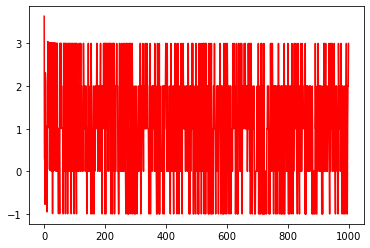

In [10]:
nn = NeuralNetwork_tanh([9,2,1])
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
for e in xs:
    print(e,nn.predict(e))
nn.fit(xs, ys, epochs=1000)
print("NOW IT'S FIT")
for e in xs:
    print(e,nn.predict(e))

In [9]:
eee = nn.predict(xs[0])

print(eee)

[0.99957248]


In [46]:
classes, lr, batch_size, hidden_layers = 5, 1e-4, 300, 200
in_size = 9

In [47]:
def batch_gen_rand(X, y, batch_size=batch_size):
    idx = np.random.randint(X.shape[0], size=batch_size)
    X_batch = X[idx]
    y_batch = y[idx]
    return Variable(torch.FloatTensor(X_batch)), Variable(torch.LongTensor(y_batch))

In [48]:
x_batch, y_batch = batch_gen_rand(xs, ys)

In [49]:
class MyNN(nn.Module):
    def __init__(self, in_size, h_layers, num_classes):
        super(MyNN, self).__init__()
        self.input = nn.Linear(in_features = in_size, out_features = h_layers)
        self.relu_1 = nn.Sigmoid()
        self.hidden_1 = nn.Linear(in_features = h_layers, out_features = h_layers)
        self.relu_2 = nn.Sigmoid()
        self.output = nn.Linear(in_features = h_layers, out_features = num_classes)
    
    def forward(self, x):
        x1 = self.input(x)
        x2 = self.relu_1(x1)
        x3 = self.hidden_1(x2)
        x4 = self.relu_2(x3)
        return self.output(x4)

In [50]:
model = MyNN(in_size, hidden_layers, classes)

In [51]:
criterion = nn.CrossEntropyLoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [52]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

cpu


In [53]:
# create dummy data with 3 samples and 784 features
x_batch = torch.tensor(xs[:3], dtype=torch.float32)
y_batch = torch.tensor(ys[:3], dtype=torch.long)

# compute outputs given inputs, both are variables
y_predicted = model(x_batch)

loss = criterion(y_predicted, y_batch)
loss

tensor(4.4778, grad_fn=<NllLossBackward>)

In [59]:
# TRAINING
x = torch.FloatTensor(xs)
y = torch.FloatTensor(ys)
print(x)
print(y)
for e in range(100):
    for i in range(0, len(xs)):
        x_batch, y_batch = batch_gen_rand(xs, ys)
        output = model(x_batch)
        loss = criterion(output, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('epoch: {} step: {} loss: {}'.format(e, i, loss.data))

tensor([[ 3.0000, 58.5000, 29.9000,  ...,  6.0000,  1.0000,  1.0000],
        [ 1.0000, 33.0000, 16.2000,  ...,  5.0000,  1.0000,  3.0000],
        [ 2.0000, 50.0000, 21.5000,  ...,  3.0000,  1.0000,  3.0000],
        ...,
        [ 3.0000, 83.9000, 30.0000,  ...,  5.0000,  1.0000,  2.0000],
        [ 2.0000, 60.0000, 26.0000,  ...,  5.0000,  3.0000,  3.0000],
        [ 2.0000, 44.0000, 20.0000,  ...,  3.0000,  1.0000,  3.0000]])
tensor([3., 0., 0., 2., 3., 4., 2., 0., 3., 2., 4., 0., 2., 4., 0., 0., 1., 4.,
        3., 1., 1., 3., 0., 0., 3., 3., 4., 4., 3., 3., 2., 2., 4., 0., 1., 3.,
        4., 3., 2., 0., 0., 2., 1., 2., 4., 2., 0., 2., 2., 3., 1., 4., 3., 3.,
        0., 3., 1., 2., 4., 2., 0., 2., 2., 1., 1., 3., 2., 3., 3., 2., 3., 4.,
        3., 4., 4., 3., 3., 1., 0., 4., 3., 2., 3., 2., 3., 1., 4., 3., 3., 0.,
        1., 3., 1., 3., 0., 0., 0., 1., 0., 2., 2., 1., 3., 1., 0., 3., 4., 1.,
        1., 4., 2., 2., 1., 1., 1., 2., 3., 1., 3., 4., 3., 2., 1., 2., 2., 2.,
      

epoch: 0 step: 171 loss: 178.97607421875
epoch: 0 step: 172 loss: 204.42237854003906
epoch: 0 step: 173 loss: 200.59605407714844
epoch: 0 step: 174 loss: 193.50523376464844
epoch: 0 step: 175 loss: 176.397216796875
epoch: 0 step: 176 loss: 173.41346740722656
epoch: 0 step: 177 loss: 179.4879608154297
epoch: 0 step: 178 loss: 199.62359619140625
epoch: 0 step: 179 loss: 229.52548217773438
epoch: 0 step: 180 loss: 235.18325805664062
epoch: 0 step: 181 loss: 265.5684814453125
epoch: 0 step: 182 loss: 251.88136291503906
epoch: 0 step: 183 loss: 300.6583251953125
epoch: 0 step: 184 loss: 250.2850799560547
epoch: 0 step: 185 loss: 233.80410766601562
epoch: 0 step: 186 loss: 206.64019775390625
epoch: 0 step: 187 loss: 192.378662109375
epoch: 0 step: 188 loss: 241.08132934570312
epoch: 0 step: 189 loss: 282.01348876953125
epoch: 0 step: 190 loss: 170.22813415527344
epoch: 0 step: 191 loss: 170.88555908203125
epoch: 0 step: 192 loss: 147.0442352294922
epoch: 0 step: 193 loss: 158.16387939453125


epoch: 1 step: 72 loss: 212.1806182861328
epoch: 1 step: 73 loss: 210.9281005859375
epoch: 1 step: 74 loss: 182.12889099121094
epoch: 1 step: 75 loss: 179.92755126953125
epoch: 1 step: 76 loss: 157.79830932617188
epoch: 1 step: 77 loss: 160.41993713378906
epoch: 1 step: 78 loss: 164.56430053710938
epoch: 1 step: 79 loss: 158.05271911621094
epoch: 1 step: 80 loss: 164.1378173828125
epoch: 1 step: 81 loss: 152.21925354003906
epoch: 1 step: 82 loss: 152.3817596435547
epoch: 1 step: 83 loss: 135.25262451171875
epoch: 1 step: 84 loss: 165.74209594726562
epoch: 1 step: 85 loss: 166.38211059570312
epoch: 1 step: 86 loss: 160.61749267578125
epoch: 1 step: 87 loss: 141.9779052734375
epoch: 1 step: 88 loss: 186.3031005859375
epoch: 1 step: 89 loss: 151.57554626464844
epoch: 1 step: 90 loss: 146.54298400878906
epoch: 1 step: 91 loss: 156.9801025390625
epoch: 1 step: 92 loss: 192.0651397705078
epoch: 1 step: 93 loss: 199.30303955078125
epoch: 1 step: 94 loss: 185.45941162109375
epoch: 1 step: 95 l

epoch: 1 step: 281 loss: 162.51312255859375
epoch: 1 step: 282 loss: 151.50070190429688
epoch: 1 step: 283 loss: 163.30154418945312
epoch: 1 step: 284 loss: 171.5381317138672
epoch: 1 step: 285 loss: 153.73416137695312
epoch: 1 step: 286 loss: 158.6978759765625
epoch: 1 step: 287 loss: 147.44154357910156
epoch: 1 step: 288 loss: 149.41534423828125
epoch: 1 step: 289 loss: 200.18789672851562
epoch: 1 step: 290 loss: 153.4618682861328
epoch: 1 step: 291 loss: 140.87730407714844
epoch: 1 step: 292 loss: 153.54083251953125
epoch: 1 step: 293 loss: 178.3409423828125
epoch: 1 step: 294 loss: 165.8663787841797
epoch: 1 step: 295 loss: 150.7591094970703
epoch: 1 step: 296 loss: 184.5980987548828
epoch: 1 step: 297 loss: 177.89984130859375
epoch: 1 step: 298 loss: 175.2671661376953
epoch: 1 step: 299 loss: 180.2581787109375
epoch: 2 step: 0 loss: 186.11302185058594
epoch: 2 step: 1 loss: 220.6907501220703
epoch: 2 step: 2 loss: 228.76364135742188
epoch: 2 step: 3 loss: 202.92626953125
epoch: 2 

epoch: 2 step: 173 loss: 165.05047607421875
epoch: 2 step: 174 loss: 167.59739685058594
epoch: 2 step: 175 loss: 155.4498748779297
epoch: 2 step: 176 loss: 152.08001708984375
epoch: 2 step: 177 loss: 154.03097534179688
epoch: 2 step: 178 loss: 162.92686462402344
epoch: 2 step: 179 loss: 150.3121795654297
epoch: 2 step: 180 loss: 178.4742431640625
epoch: 2 step: 181 loss: 169.68902587890625
epoch: 2 step: 182 loss: 175.3647003173828
epoch: 2 step: 183 loss: 144.04234313964844
epoch: 2 step: 184 loss: 158.16647338867188
epoch: 2 step: 185 loss: 172.5238037109375
epoch: 2 step: 186 loss: 172.97323608398438
epoch: 2 step: 187 loss: 186.05723571777344
epoch: 2 step: 188 loss: 195.29202270507812
epoch: 2 step: 189 loss: 187.07899475097656
epoch: 2 step: 190 loss: 196.49334716796875
epoch: 2 step: 191 loss: 178.8340606689453
epoch: 2 step: 192 loss: 183.41275024414062
epoch: 2 step: 193 loss: 186.0652313232422
epoch: 2 step: 194 loss: 247.12994384765625
epoch: 2 step: 195 loss: 216.3296051025

epoch: 3 step: 81 loss: 154.63870239257812
epoch: 3 step: 82 loss: 141.9353485107422
epoch: 3 step: 83 loss: 151.29978942871094
epoch: 3 step: 84 loss: 149.4634552001953
epoch: 3 step: 85 loss: 165.62217712402344
epoch: 3 step: 86 loss: 134.3011474609375
epoch: 3 step: 87 loss: 148.2300567626953
epoch: 3 step: 88 loss: 152.3697509765625
epoch: 3 step: 89 loss: 155.306396484375
epoch: 3 step: 90 loss: 142.05552673339844
epoch: 3 step: 91 loss: 143.04855346679688
epoch: 3 step: 92 loss: 129.22865295410156
epoch: 3 step: 93 loss: 144.29356384277344
epoch: 3 step: 94 loss: 167.04928588867188
epoch: 3 step: 95 loss: 152.60867309570312
epoch: 3 step: 96 loss: 138.19482421875
epoch: 3 step: 97 loss: 144.02859497070312
epoch: 3 step: 98 loss: 160.32672119140625
epoch: 3 step: 99 loss: 166.9645233154297
epoch: 3 step: 100 loss: 151.69927978515625
epoch: 3 step: 101 loss: 141.3653564453125
epoch: 3 step: 102 loss: 140.75083923339844
epoch: 3 step: 103 loss: 141.82354736328125
epoch: 3 step: 104 

epoch: 3 step: 275 loss: 157.4636993408203
epoch: 3 step: 276 loss: 140.54161071777344
epoch: 3 step: 277 loss: 148.95468139648438
epoch: 3 step: 278 loss: 184.38136291503906
epoch: 3 step: 279 loss: 193.84414672851562
epoch: 3 step: 280 loss: 227.8497772216797
epoch: 3 step: 281 loss: 189.27752685546875
epoch: 3 step: 282 loss: 143.03477478027344
epoch: 3 step: 283 loss: 176.12049865722656
epoch: 3 step: 284 loss: 187.93881225585938
epoch: 3 step: 285 loss: 173.30953979492188
epoch: 3 step: 286 loss: 166.30282592773438
epoch: 3 step: 287 loss: 163.5224151611328
epoch: 3 step: 288 loss: 147.56178283691406
epoch: 3 step: 289 loss: 162.2360382080078
epoch: 3 step: 290 loss: 165.064208984375
epoch: 3 step: 291 loss: 142.61302185058594
epoch: 3 step: 292 loss: 157.10777282714844
epoch: 3 step: 293 loss: 150.4503936767578
epoch: 3 step: 294 loss: 144.22134399414062
epoch: 3 step: 295 loss: 148.929931640625
epoch: 3 step: 296 loss: 147.31143188476562
epoch: 3 step: 297 loss: 185.429000854492

epoch: 4 step: 167 loss: 149.53591918945312
epoch: 4 step: 168 loss: 159.87716674804688
epoch: 4 step: 169 loss: 147.79798889160156
epoch: 4 step: 170 loss: 146.65109252929688
epoch: 4 step: 171 loss: 158.7179718017578
epoch: 4 step: 172 loss: 151.1917724609375
epoch: 4 step: 173 loss: 159.25448608398438
epoch: 4 step: 174 loss: 144.60769653320312
epoch: 4 step: 175 loss: 156.76541137695312
epoch: 4 step: 176 loss: 158.47463989257812
epoch: 4 step: 177 loss: 154.69802856445312
epoch: 4 step: 178 loss: 163.82681274414062
epoch: 4 step: 179 loss: 159.1764678955078
epoch: 4 step: 180 loss: 135.69708251953125
epoch: 4 step: 181 loss: 152.2857666015625
epoch: 4 step: 182 loss: 161.8797607421875
epoch: 4 step: 183 loss: 154.1065216064453
epoch: 4 step: 184 loss: 149.00674438476562
epoch: 4 step: 185 loss: 155.05113220214844
epoch: 4 step: 186 loss: 149.1290740966797
epoch: 4 step: 187 loss: 167.37928771972656
epoch: 4 step: 188 loss: 152.08531188964844
epoch: 4 step: 189 loss: 177.6231231689

epoch: 5 step: 71 loss: 163.78866577148438
epoch: 5 step: 72 loss: 140.60401916503906
epoch: 5 step: 73 loss: 144.9674530029297
epoch: 5 step: 74 loss: 138.260498046875
epoch: 5 step: 75 loss: 158.68319702148438
epoch: 5 step: 76 loss: 168.4075164794922
epoch: 5 step: 77 loss: 173.22402954101562
epoch: 5 step: 78 loss: 145.04835510253906
epoch: 5 step: 79 loss: 140.37496948242188
epoch: 5 step: 80 loss: 147.4735107421875
epoch: 5 step: 81 loss: 145.78207397460938
epoch: 5 step: 82 loss: 162.54824829101562
epoch: 5 step: 83 loss: 165.8136749267578
epoch: 5 step: 84 loss: 179.5387420654297
epoch: 5 step: 85 loss: 210.72215270996094
epoch: 5 step: 86 loss: 160.25250244140625
epoch: 5 step: 87 loss: 157.18460083007812
epoch: 5 step: 88 loss: 150.74900817871094
epoch: 5 step: 89 loss: 133.29290771484375
epoch: 5 step: 90 loss: 157.67848205566406
epoch: 5 step: 91 loss: 173.25596618652344
epoch: 5 step: 92 loss: 141.9976348876953
epoch: 5 step: 93 loss: 159.7120361328125
epoch: 5 step: 94 lo

epoch: 5 step: 274 loss: 164.419189453125
epoch: 5 step: 275 loss: 164.32882690429688
epoch: 5 step: 276 loss: 169.32742309570312
epoch: 5 step: 277 loss: 143.1104736328125
epoch: 5 step: 278 loss: 135.06100463867188
epoch: 5 step: 279 loss: 144.20510864257812
epoch: 5 step: 280 loss: 159.4575653076172
epoch: 5 step: 281 loss: 157.16578674316406
epoch: 5 step: 282 loss: 190.4080352783203
epoch: 5 step: 283 loss: 163.2611541748047
epoch: 5 step: 284 loss: 142.064453125
epoch: 5 step: 285 loss: 151.88356018066406
epoch: 5 step: 286 loss: 148.6348876953125
epoch: 5 step: 287 loss: 148.3909454345703
epoch: 5 step: 288 loss: 166.1679229736328
epoch: 5 step: 289 loss: 167.03147888183594
epoch: 5 step: 290 loss: 165.560302734375
epoch: 5 step: 291 loss: 153.04229736328125
epoch: 5 step: 292 loss: 152.1436004638672
epoch: 5 step: 293 loss: 146.22265625
epoch: 5 step: 294 loss: 140.44517517089844
epoch: 5 step: 295 loss: 145.1441192626953
epoch: 5 step: 296 loss: 170.00067138671875
epoch: 5 ste

epoch: 6 step: 168 loss: 161.2393035888672
epoch: 6 step: 169 loss: 163.1198272705078
epoch: 6 step: 170 loss: 162.3341522216797
epoch: 6 step: 171 loss: 165.86383056640625
epoch: 6 step: 172 loss: 165.57179260253906
epoch: 6 step: 173 loss: 166.6133575439453
epoch: 6 step: 174 loss: 166.2587890625
epoch: 6 step: 175 loss: 175.6795196533203
epoch: 6 step: 176 loss: 188.92434692382812
epoch: 6 step: 177 loss: 156.1705780029297
epoch: 6 step: 178 loss: 148.55001831054688
epoch: 6 step: 179 loss: 163.0391845703125
epoch: 6 step: 180 loss: 150.81173706054688
epoch: 6 step: 181 loss: 185.0155029296875
epoch: 6 step: 182 loss: 178.0423126220703
epoch: 6 step: 183 loss: 163.84518432617188
epoch: 6 step: 184 loss: 176.4539794921875
epoch: 6 step: 185 loss: 178.67611694335938
epoch: 6 step: 186 loss: 175.5196533203125
epoch: 6 step: 187 loss: 171.40216064453125
epoch: 6 step: 188 loss: 168.06845092773438
epoch: 6 step: 189 loss: 141.28256225585938
epoch: 6 step: 190 loss: 165.2104949951172
epoc

epoch: 7 step: 57 loss: 143.3775634765625
epoch: 7 step: 58 loss: 160.5557403564453
epoch: 7 step: 59 loss: 155.5363311767578
epoch: 7 step: 60 loss: 165.88780212402344
epoch: 7 step: 61 loss: 178.2731475830078
epoch: 7 step: 62 loss: 170.63951110839844
epoch: 7 step: 63 loss: 190.79611206054688
epoch: 7 step: 64 loss: 192.51397705078125
epoch: 7 step: 65 loss: 238.746826171875
epoch: 7 step: 66 loss: 200.16888427734375
epoch: 7 step: 67 loss: 181.6407012939453
epoch: 7 step: 68 loss: 177.03170776367188
epoch: 7 step: 69 loss: 227.22720336914062
epoch: 7 step: 70 loss: 263.77777099609375
epoch: 7 step: 71 loss: 186.637451171875
epoch: 7 step: 72 loss: 184.39031982421875
epoch: 7 step: 73 loss: 210.0525665283203
epoch: 7 step: 74 loss: 184.81053161621094
epoch: 7 step: 75 loss: 177.43104553222656
epoch: 7 step: 76 loss: 170.26119995117188
epoch: 7 step: 77 loss: 144.01312255859375
epoch: 7 step: 78 loss: 146.35177612304688
epoch: 7 step: 79 loss: 141.12606811523438
epoch: 7 step: 80 los

epoch: 7 step: 254 loss: 176.89964294433594
epoch: 7 step: 255 loss: 193.50379943847656
epoch: 7 step: 256 loss: 192.3757781982422
epoch: 7 step: 257 loss: 171.68563842773438
epoch: 7 step: 258 loss: 159.28062438964844
epoch: 7 step: 259 loss: 157.45997619628906
epoch: 7 step: 260 loss: 186.5133514404297
epoch: 7 step: 261 loss: 171.62283325195312
epoch: 7 step: 262 loss: 157.24497985839844
epoch: 7 step: 263 loss: 164.55477905273438
epoch: 7 step: 264 loss: 161.07040405273438
epoch: 7 step: 265 loss: 170.85931396484375
epoch: 7 step: 266 loss: 210.39877319335938
epoch: 7 step: 267 loss: 167.45123291015625
epoch: 7 step: 268 loss: 178.98956298828125
epoch: 7 step: 269 loss: 149.8383331298828
epoch: 7 step: 270 loss: 127.03218078613281
epoch: 7 step: 271 loss: 127.53665924072266
epoch: 7 step: 272 loss: 141.3177947998047
epoch: 7 step: 273 loss: 132.0148162841797
epoch: 7 step: 274 loss: 130.95440673828125
epoch: 7 step: 275 loss: 130.35183715820312
epoch: 7 step: 276 loss: 139.65657043

epoch: 8 step: 160 loss: 168.3203125
epoch: 8 step: 161 loss: 228.91470336914062
epoch: 8 step: 162 loss: 231.05767822265625
epoch: 8 step: 163 loss: 234.91567993164062
epoch: 8 step: 164 loss: 228.4806365966797
epoch: 8 step: 165 loss: 239.00819396972656
epoch: 8 step: 166 loss: 209.1526336669922
epoch: 8 step: 167 loss: 163.97640991210938
epoch: 8 step: 168 loss: 148.35720825195312
epoch: 8 step: 169 loss: 154.04156494140625
epoch: 8 step: 170 loss: 157.92984008789062
epoch: 8 step: 171 loss: 139.6087188720703
epoch: 8 step: 172 loss: 153.84695434570312
epoch: 8 step: 173 loss: 146.6609649658203
epoch: 8 step: 174 loss: 146.179931640625
epoch: 8 step: 175 loss: 177.51019287109375
epoch: 8 step: 176 loss: 147.64761352539062
epoch: 8 step: 177 loss: 168.99691772460938
epoch: 8 step: 178 loss: 150.0570831298828
epoch: 8 step: 179 loss: 161.62298583984375
epoch: 8 step: 180 loss: 166.7660369873047
epoch: 8 step: 181 loss: 190.75001525878906
epoch: 8 step: 182 loss: 168.5380096435547
epoc

epoch: 9 step: 69 loss: 150.04446411132812
epoch: 9 step: 70 loss: 136.3877716064453
epoch: 9 step: 71 loss: 153.64102172851562
epoch: 9 step: 72 loss: 186.9119415283203
epoch: 9 step: 73 loss: 203.17007446289062
epoch: 9 step: 74 loss: 195.8924560546875
epoch: 9 step: 75 loss: 162.09649658203125
epoch: 9 step: 76 loss: 160.26168823242188
epoch: 9 step: 77 loss: 147.1206817626953
epoch: 9 step: 78 loss: 150.34725952148438
epoch: 9 step: 79 loss: 146.56141662597656
epoch: 9 step: 80 loss: 147.75645446777344
epoch: 9 step: 81 loss: 134.37759399414062
epoch: 9 step: 82 loss: 127.08534240722656
epoch: 9 step: 83 loss: 137.43394470214844
epoch: 9 step: 84 loss: 136.50132751464844
epoch: 9 step: 85 loss: 135.29403686523438
epoch: 9 step: 86 loss: 153.60499572753906
epoch: 9 step: 87 loss: 167.71426391601562
epoch: 9 step: 88 loss: 173.56394958496094
epoch: 9 step: 89 loss: 149.61495971679688
epoch: 9 step: 90 loss: 161.21563720703125
epoch: 9 step: 91 loss: 159.70358276367188
epoch: 9 step: 

epoch: 9 step: 260 loss: 153.1361541748047
epoch: 9 step: 261 loss: 139.33282470703125
epoch: 9 step: 262 loss: 149.44589233398438
epoch: 9 step: 263 loss: 151.77064514160156
epoch: 9 step: 264 loss: 133.8784942626953
epoch: 9 step: 265 loss: 148.28384399414062
epoch: 9 step: 266 loss: 130.3568878173828
epoch: 9 step: 267 loss: 152.55123901367188
epoch: 9 step: 268 loss: 153.25413513183594
epoch: 9 step: 269 loss: 188.73629760742188
epoch: 9 step: 270 loss: 199.5838623046875
epoch: 9 step: 271 loss: 201.9033966064453
epoch: 9 step: 272 loss: 226.2426300048828
epoch: 9 step: 273 loss: 188.98077392578125
epoch: 9 step: 274 loss: 198.7517547607422
epoch: 9 step: 275 loss: 182.2471466064453
epoch: 9 step: 276 loss: 135.73849487304688
epoch: 9 step: 277 loss: 124.41653442382812
epoch: 9 step: 278 loss: 139.85302734375
epoch: 9 step: 279 loss: 156.66964721679688
epoch: 9 step: 280 loss: 140.91409301757812
epoch: 9 step: 281 loss: 142.26051330566406
epoch: 9 step: 282 loss: 154.99630737304688

epoch: 10 step: 163 loss: 213.11566162109375
epoch: 10 step: 164 loss: 168.691162109375
epoch: 10 step: 165 loss: 152.8046417236328
epoch: 10 step: 166 loss: 144.5087432861328
epoch: 10 step: 167 loss: 160.235595703125
epoch: 10 step: 168 loss: 140.24806213378906
epoch: 10 step: 169 loss: 137.71755981445312
epoch: 10 step: 170 loss: 147.4052734375
epoch: 10 step: 171 loss: 171.85733032226562
epoch: 10 step: 172 loss: 146.1725311279297
epoch: 10 step: 173 loss: 142.2206268310547
epoch: 10 step: 174 loss: 122.83341217041016
epoch: 10 step: 175 loss: 116.67947387695312
epoch: 10 step: 176 loss: 151.411865234375
epoch: 10 step: 177 loss: 169.99156188964844
epoch: 10 step: 178 loss: 170.70579528808594
epoch: 10 step: 179 loss: 151.77711486816406
epoch: 10 step: 180 loss: 159.659423828125
epoch: 10 step: 181 loss: 139.91542053222656
epoch: 10 step: 182 loss: 158.321533203125
epoch: 10 step: 183 loss: 164.70761108398438
epoch: 10 step: 184 loss: 155.27462768554688
epoch: 10 step: 185 loss: 18

epoch: 11 step: 65 loss: 146.48638916015625
epoch: 11 step: 66 loss: 146.41555786132812
epoch: 11 step: 67 loss: 142.8874969482422
epoch: 11 step: 68 loss: 170.21583557128906
epoch: 11 step: 69 loss: 146.227294921875
epoch: 11 step: 70 loss: 156.78749084472656
epoch: 11 step: 71 loss: 143.53135681152344
epoch: 11 step: 72 loss: 125.06597900390625
epoch: 11 step: 73 loss: 120.80754089355469
epoch: 11 step: 74 loss: 149.3447265625
epoch: 11 step: 75 loss: 121.6157455444336
epoch: 11 step: 76 loss: 154.0674591064453
epoch: 11 step: 77 loss: 167.13812255859375
epoch: 11 step: 78 loss: 164.46746826171875
epoch: 11 step: 79 loss: 152.83334350585938
epoch: 11 step: 80 loss: 152.49606323242188
epoch: 11 step: 81 loss: 158.60427856445312
epoch: 11 step: 82 loss: 157.0048828125
epoch: 11 step: 83 loss: 177.5404052734375
epoch: 11 step: 84 loss: 204.79266357421875
epoch: 11 step: 85 loss: 231.97964477539062
epoch: 11 step: 86 loss: 209.93606567382812
epoch: 11 step: 87 loss: 166.26544189453125
ep

epoch: 11 step: 260 loss: 185.64012145996094
epoch: 11 step: 261 loss: 203.90977478027344
epoch: 11 step: 262 loss: 189.96034240722656
epoch: 11 step: 263 loss: 179.29916381835938
epoch: 11 step: 264 loss: 176.54190063476562
epoch: 11 step: 265 loss: 143.5505828857422
epoch: 11 step: 266 loss: 141.58425903320312
epoch: 11 step: 267 loss: 129.31353759765625
epoch: 11 step: 268 loss: 149.2989501953125
epoch: 11 step: 269 loss: 139.36276245117188
epoch: 11 step: 270 loss: 147.0087890625
epoch: 11 step: 271 loss: 151.0195770263672
epoch: 11 step: 272 loss: 141.07315063476562
epoch: 11 step: 273 loss: 169.36074829101562
epoch: 11 step: 274 loss: 194.50634765625
epoch: 11 step: 275 loss: 221.12057495117188
epoch: 11 step: 276 loss: 261.27642822265625
epoch: 11 step: 277 loss: 161.32528686523438
epoch: 11 step: 278 loss: 140.49557495117188
epoch: 11 step: 279 loss: 144.00881958007812
epoch: 11 step: 280 loss: 147.12474060058594
epoch: 11 step: 281 loss: 132.53396606445312
epoch: 11 step: 282 

epoch: 12 step: 164 loss: 135.22547912597656
epoch: 12 step: 165 loss: 143.718994140625
epoch: 12 step: 166 loss: 140.4332275390625
epoch: 12 step: 167 loss: 171.49710083007812
epoch: 12 step: 168 loss: 161.33702087402344
epoch: 12 step: 169 loss: 148.06439208984375
epoch: 12 step: 170 loss: 143.5500030517578
epoch: 12 step: 171 loss: 130.7928466796875
epoch: 12 step: 172 loss: 131.85601806640625
epoch: 12 step: 173 loss: 164.50331115722656
epoch: 12 step: 174 loss: 153.0628662109375
epoch: 12 step: 175 loss: 140.84971618652344
epoch: 12 step: 176 loss: 165.8107452392578
epoch: 12 step: 177 loss: 172.40428161621094
epoch: 12 step: 178 loss: 174.82595825195312
epoch: 12 step: 179 loss: 162.94944763183594
epoch: 12 step: 180 loss: 136.5000762939453
epoch: 12 step: 181 loss: 140.67681884765625
epoch: 12 step: 182 loss: 144.16351318359375
epoch: 12 step: 183 loss: 157.2281494140625
epoch: 12 step: 184 loss: 151.05316162109375
epoch: 12 step: 185 loss: 144.62625122070312
epoch: 12 step: 186

epoch: 13 step: 61 loss: 144.03150939941406
epoch: 13 step: 62 loss: 120.59030151367188
epoch: 13 step: 63 loss: 123.50748443603516
epoch: 13 step: 64 loss: 138.06007385253906
epoch: 13 step: 65 loss: 142.3719482421875
epoch: 13 step: 66 loss: 172.8394012451172
epoch: 13 step: 67 loss: 162.43838500976562
epoch: 13 step: 68 loss: 143.60435485839844
epoch: 13 step: 69 loss: 153.07823181152344
epoch: 13 step: 70 loss: 203.3947296142578
epoch: 13 step: 71 loss: 173.3024139404297
epoch: 13 step: 72 loss: 152.1380157470703
epoch: 13 step: 73 loss: 147.76739501953125
epoch: 13 step: 74 loss: 163.10032653808594
epoch: 13 step: 75 loss: 190.54580688476562
epoch: 13 step: 76 loss: 156.0745849609375
epoch: 13 step: 77 loss: 156.7394561767578
epoch: 13 step: 78 loss: 156.07412719726562
epoch: 13 step: 79 loss: 146.3810272216797
epoch: 13 step: 80 loss: 142.7452850341797
epoch: 13 step: 81 loss: 146.21485900878906
epoch: 13 step: 82 loss: 125.0267562866211
epoch: 13 step: 83 loss: 126.1727752685546

epoch: 13 step: 258 loss: 136.5363006591797
epoch: 13 step: 259 loss: 155.73312377929688
epoch: 13 step: 260 loss: 166.8715057373047
epoch: 13 step: 261 loss: 188.44435119628906
epoch: 13 step: 262 loss: 179.65716552734375
epoch: 13 step: 263 loss: 152.88970947265625
epoch: 13 step: 264 loss: 128.12326049804688
epoch: 13 step: 265 loss: 120.68492889404297
epoch: 13 step: 266 loss: 145.5550537109375
epoch: 13 step: 267 loss: 156.38584899902344
epoch: 13 step: 268 loss: 192.51202392578125
epoch: 13 step: 269 loss: 179.60726928710938
epoch: 13 step: 270 loss: 186.46304321289062
epoch: 13 step: 271 loss: 208.44866943359375
epoch: 13 step: 272 loss: 157.79324340820312
epoch: 13 step: 273 loss: 151.74684143066406
epoch: 13 step: 274 loss: 146.3720245361328
epoch: 13 step: 275 loss: 165.17733764648438
epoch: 13 step: 276 loss: 141.7227020263672
epoch: 13 step: 277 loss: 138.8880157470703
epoch: 13 step: 278 loss: 195.5201416015625
epoch: 13 step: 279 loss: 244.51121520996094
epoch: 13 step: 2

epoch: 14 step: 163 loss: 139.7875213623047
epoch: 14 step: 164 loss: 137.21900939941406
epoch: 14 step: 165 loss: 118.12985229492188
epoch: 14 step: 166 loss: 124.55447387695312
epoch: 14 step: 167 loss: 123.33921813964844
epoch: 14 step: 168 loss: 125.50899505615234
epoch: 14 step: 169 loss: 129.5996856689453
epoch: 14 step: 170 loss: 136.53016662597656
epoch: 14 step: 171 loss: 114.5283203125
epoch: 14 step: 172 loss: 138.1465606689453
epoch: 14 step: 173 loss: 135.20651245117188
epoch: 14 step: 174 loss: 130.4560546875
epoch: 14 step: 175 loss: 126.33709716796875
epoch: 14 step: 176 loss: 134.49388122558594
epoch: 14 step: 177 loss: 143.73048400878906
epoch: 14 step: 178 loss: 153.8544464111328
epoch: 14 step: 179 loss: 157.7312469482422
epoch: 14 step: 180 loss: 173.27723693847656
epoch: 14 step: 181 loss: 168.43894958496094
epoch: 14 step: 182 loss: 141.302734375
epoch: 14 step: 183 loss: 123.27680969238281
epoch: 14 step: 184 loss: 127.83772277832031
epoch: 14 step: 185 loss: 14

epoch: 15 step: 61 loss: 131.47015380859375
epoch: 15 step: 62 loss: 150.02381896972656
epoch: 15 step: 63 loss: 147.1634979248047
epoch: 15 step: 64 loss: 160.0499725341797
epoch: 15 step: 65 loss: 145.5636444091797
epoch: 15 step: 66 loss: 130.10838317871094
epoch: 15 step: 67 loss: 129.52821350097656
epoch: 15 step: 68 loss: 151.91270446777344
epoch: 15 step: 69 loss: 157.05577087402344
epoch: 15 step: 70 loss: 176.29942321777344
epoch: 15 step: 71 loss: 161.1398468017578
epoch: 15 step: 72 loss: 153.87889099121094
epoch: 15 step: 73 loss: 149.5692138671875
epoch: 15 step: 74 loss: 140.73013305664062
epoch: 15 step: 75 loss: 136.18533325195312
epoch: 15 step: 76 loss: 149.40802001953125
epoch: 15 step: 77 loss: 145.69146728515625
epoch: 15 step: 78 loss: 143.5559539794922
epoch: 15 step: 79 loss: 163.80072021484375
epoch: 15 step: 80 loss: 142.0115966796875
epoch: 15 step: 81 loss: 128.93067932128906
epoch: 15 step: 82 loss: 127.92787170410156
epoch: 15 step: 83 loss: 121.1964416503

epoch: 15 step: 254 loss: 139.5662078857422
epoch: 15 step: 255 loss: 149.98333740234375
epoch: 15 step: 256 loss: 172.3894500732422
epoch: 15 step: 257 loss: 141.90110778808594
epoch: 15 step: 258 loss: 150.43972778320312
epoch: 15 step: 259 loss: 163.78794860839844
epoch: 15 step: 260 loss: 141.39671325683594
epoch: 15 step: 261 loss: 114.6333999633789
epoch: 15 step: 262 loss: 120.64922332763672
epoch: 15 step: 263 loss: 122.69232177734375
epoch: 15 step: 264 loss: 139.51902770996094
epoch: 15 step: 265 loss: 135.20016479492188
epoch: 15 step: 266 loss: 147.8424072265625
epoch: 15 step: 267 loss: 146.81910705566406
epoch: 15 step: 268 loss: 147.40382385253906
epoch: 15 step: 269 loss: 112.5118408203125
epoch: 15 step: 270 loss: 126.42001342773438
epoch: 15 step: 271 loss: 135.9986572265625
epoch: 15 step: 272 loss: 120.92440795898438
epoch: 15 step: 273 loss: 131.20941162109375
epoch: 15 step: 274 loss: 136.21551513671875
epoch: 15 step: 275 loss: 144.42755126953125
epoch: 15 step: 

epoch: 16 step: 161 loss: 173.59869384765625
epoch: 16 step: 162 loss: 201.74588012695312
epoch: 16 step: 163 loss: 204.15284729003906
epoch: 16 step: 164 loss: 171.41448974609375
epoch: 16 step: 165 loss: 143.41964721679688
epoch: 16 step: 166 loss: 139.54171752929688
epoch: 16 step: 167 loss: 153.5390167236328
epoch: 16 step: 168 loss: 130.19888305664062
epoch: 16 step: 169 loss: 144.83428955078125
epoch: 16 step: 170 loss: 163.76780700683594
epoch: 16 step: 171 loss: 184.00965881347656
epoch: 16 step: 172 loss: 174.0399932861328
epoch: 16 step: 173 loss: 143.05355834960938
epoch: 16 step: 174 loss: 129.28909301757812
epoch: 16 step: 175 loss: 108.70735168457031
epoch: 16 step: 176 loss: 122.88610076904297
epoch: 16 step: 177 loss: 126.4728775024414
epoch: 16 step: 178 loss: 127.08547973632812
epoch: 16 step: 179 loss: 125.7081298828125
epoch: 16 step: 180 loss: 137.21446228027344
epoch: 16 step: 181 loss: 123.89088439941406
epoch: 16 step: 182 loss: 146.32998657226562
epoch: 16 step

epoch: 17 step: 67 loss: 139.11148071289062
epoch: 17 step: 68 loss: 146.8784942626953
epoch: 17 step: 69 loss: 148.33935546875
epoch: 17 step: 70 loss: 129.58767700195312
epoch: 17 step: 71 loss: 131.6839599609375
epoch: 17 step: 72 loss: 169.3221435546875
epoch: 17 step: 73 loss: 188.4471893310547
epoch: 17 step: 74 loss: 157.7528839111328
epoch: 17 step: 75 loss: 157.95883178710938
epoch: 17 step: 76 loss: 150.54132080078125
epoch: 17 step: 77 loss: 132.48309326171875
epoch: 17 step: 78 loss: 145.07269287109375
epoch: 17 step: 79 loss: 148.25103759765625
epoch: 17 step: 80 loss: 121.56661987304688
epoch: 17 step: 81 loss: 143.28248596191406
epoch: 17 step: 82 loss: 126.17501068115234
epoch: 17 step: 83 loss: 126.18172454833984
epoch: 17 step: 84 loss: 138.4938201904297
epoch: 17 step: 85 loss: 140.61798095703125
epoch: 17 step: 86 loss: 150.26315307617188
epoch: 17 step: 87 loss: 137.476318359375
epoch: 17 step: 88 loss: 148.5625457763672
epoch: 17 step: 89 loss: 121.25685119628906


epoch: 17 step: 254 loss: 118.58570098876953
epoch: 17 step: 255 loss: 128.10345458984375
epoch: 17 step: 256 loss: 139.6206512451172
epoch: 17 step: 257 loss: 129.80613708496094
epoch: 17 step: 258 loss: 142.1829071044922
epoch: 17 step: 259 loss: 135.74156188964844
epoch: 17 step: 260 loss: 155.5845947265625
epoch: 17 step: 261 loss: 147.5508270263672
epoch: 17 step: 262 loss: 125.78707885742188
epoch: 17 step: 263 loss: 130.16677856445312
epoch: 17 step: 264 loss: 113.42809295654297
epoch: 17 step: 265 loss: 104.82466125488281
epoch: 17 step: 266 loss: 132.669189453125
epoch: 17 step: 267 loss: 141.8512420654297
epoch: 17 step: 268 loss: 127.55726623535156
epoch: 17 step: 269 loss: 120.28893280029297
epoch: 17 step: 270 loss: 151.88229370117188
epoch: 17 step: 271 loss: 153.77310180664062
epoch: 17 step: 272 loss: 142.68194580078125
epoch: 17 step: 273 loss: 149.60292053222656
epoch: 17 step: 274 loss: 138.7913360595703
epoch: 17 step: 275 loss: 175.3124237060547
epoch: 17 step: 276

epoch: 18 step: 150 loss: 149.46238708496094
epoch: 18 step: 151 loss: 191.539794921875
epoch: 18 step: 152 loss: 213.0221710205078
epoch: 18 step: 153 loss: 209.36636352539062
epoch: 18 step: 154 loss: 150.443359375
epoch: 18 step: 155 loss: 155.98001098632812
epoch: 18 step: 156 loss: 146.919921875
epoch: 18 step: 157 loss: 148.24313354492188
epoch: 18 step: 158 loss: 155.31105041503906
epoch: 18 step: 159 loss: 122.1358642578125
epoch: 18 step: 160 loss: 135.27767944335938
epoch: 18 step: 161 loss: 139.38482666015625
epoch: 18 step: 162 loss: 154.10787963867188
epoch: 18 step: 163 loss: 160.48492431640625
epoch: 18 step: 164 loss: 135.83724975585938
epoch: 18 step: 165 loss: 132.2395782470703
epoch: 18 step: 166 loss: 133.3031005859375
epoch: 18 step: 167 loss: 133.48001098632812
epoch: 18 step: 168 loss: 129.510009765625
epoch: 18 step: 169 loss: 147.68112182617188
epoch: 18 step: 170 loss: 145.6826629638672
epoch: 18 step: 171 loss: 123.06168365478516
epoch: 18 step: 172 loss: 134

epoch: 19 step: 44 loss: 111.18622589111328
epoch: 19 step: 45 loss: 143.282470703125
epoch: 19 step: 46 loss: 121.52178955078125
epoch: 19 step: 47 loss: 118.99996185302734
epoch: 19 step: 48 loss: 135.5602264404297
epoch: 19 step: 49 loss: 114.1260986328125
epoch: 19 step: 50 loss: 139.6852264404297
epoch: 19 step: 51 loss: 144.29310607910156
epoch: 19 step: 52 loss: 132.9539794921875
epoch: 19 step: 53 loss: 164.2389678955078
epoch: 19 step: 54 loss: 193.91610717773438
epoch: 19 step: 55 loss: 183.62820434570312
epoch: 19 step: 56 loss: 166.4207305908203
epoch: 19 step: 57 loss: 143.8199920654297
epoch: 19 step: 58 loss: 147.7608642578125
epoch: 19 step: 59 loss: 154.44650268554688
epoch: 19 step: 60 loss: 126.883056640625
epoch: 19 step: 61 loss: 148.16087341308594
epoch: 19 step: 62 loss: 141.20132446289062
epoch: 19 step: 63 loss: 123.13702392578125
epoch: 19 step: 64 loss: 138.11685180664062
epoch: 19 step: 65 loss: 135.42686462402344
epoch: 19 step: 66 loss: 125.02245330810547


epoch: 19 step: 236 loss: 164.53829956054688
epoch: 19 step: 237 loss: 140.17193603515625
epoch: 19 step: 238 loss: 130.28610229492188
epoch: 19 step: 239 loss: 123.35588836669922
epoch: 19 step: 240 loss: 129.16111755371094
epoch: 19 step: 241 loss: 139.2610321044922
epoch: 19 step: 242 loss: 145.06246948242188
epoch: 19 step: 243 loss: 127.0548324584961
epoch: 19 step: 244 loss: 119.6759033203125
epoch: 19 step: 245 loss: 130.93246459960938
epoch: 19 step: 246 loss: 118.8890609741211
epoch: 19 step: 247 loss: 118.55032348632812
epoch: 19 step: 248 loss: 151.17364501953125
epoch: 19 step: 249 loss: 129.11019897460938
epoch: 19 step: 250 loss: 127.59302520751953
epoch: 19 step: 251 loss: 125.19257354736328
epoch: 19 step: 252 loss: 131.4735870361328
epoch: 19 step: 253 loss: 125.20062255859375
epoch: 19 step: 254 loss: 131.63653564453125
epoch: 19 step: 255 loss: 137.3195037841797
epoch: 19 step: 256 loss: 201.02919006347656
epoch: 19 step: 257 loss: 170.76776123046875
epoch: 19 step: 

epoch: 20 step: 142 loss: 134.3448486328125
epoch: 20 step: 143 loss: 128.83641052246094
epoch: 20 step: 144 loss: 148.63502502441406
epoch: 20 step: 145 loss: 171.61587524414062
epoch: 20 step: 146 loss: 142.21240234375
epoch: 20 step: 147 loss: 155.02732849121094
epoch: 20 step: 148 loss: 128.36964416503906
epoch: 20 step: 149 loss: 122.57145690917969
epoch: 20 step: 150 loss: 138.06419372558594
epoch: 20 step: 151 loss: 144.77972412109375
epoch: 20 step: 152 loss: 124.88451385498047
epoch: 20 step: 153 loss: 137.7011260986328
epoch: 20 step: 154 loss: 113.73857879638672
epoch: 20 step: 155 loss: 130.02731323242188
epoch: 20 step: 156 loss: 170.097412109375
epoch: 20 step: 157 loss: 132.76052856445312
epoch: 20 step: 158 loss: 125.55625915527344
epoch: 20 step: 159 loss: 153.93533325195312
epoch: 20 step: 160 loss: 134.0078887939453
epoch: 20 step: 161 loss: 134.04348754882812
epoch: 20 step: 162 loss: 172.7831573486328
epoch: 20 step: 163 loss: 163.0726318359375
epoch: 20 step: 164 

epoch: 21 step: 43 loss: 136.07736206054688
epoch: 21 step: 44 loss: 118.00981140136719
epoch: 21 step: 45 loss: 136.59512329101562
epoch: 21 step: 46 loss: 150.177734375
epoch: 21 step: 47 loss: 131.49526977539062
epoch: 21 step: 48 loss: 133.64845275878906
epoch: 21 step: 49 loss: 131.73805236816406
epoch: 21 step: 50 loss: 124.92462921142578
epoch: 21 step: 51 loss: 119.63521575927734
epoch: 21 step: 52 loss: 140.4020538330078
epoch: 21 step: 53 loss: 124.44131469726562
epoch: 21 step: 54 loss: 125.09346008300781
epoch: 21 step: 55 loss: 111.5169448852539
epoch: 21 step: 56 loss: 105.86325073242188
epoch: 21 step: 57 loss: 117.51171875
epoch: 21 step: 58 loss: 108.130126953125
epoch: 21 step: 59 loss: 129.32424926757812
epoch: 21 step: 60 loss: 121.07282257080078
epoch: 21 step: 61 loss: 118.31297302246094
epoch: 21 step: 62 loss: 123.89897918701172
epoch: 21 step: 63 loss: 131.96038818359375
epoch: 21 step: 64 loss: 129.7677459716797
epoch: 21 step: 65 loss: 131.99172973632812
epoc

epoch: 21 step: 248 loss: 166.64071655273438
epoch: 21 step: 249 loss: 147.20367431640625
epoch: 21 step: 250 loss: 110.00819396972656
epoch: 21 step: 251 loss: 121.06844329833984
epoch: 21 step: 252 loss: 111.24874114990234
epoch: 21 step: 253 loss: 123.03861236572266
epoch: 21 step: 254 loss: 98.0345687866211
epoch: 21 step: 255 loss: 103.35481262207031
epoch: 21 step: 256 loss: 106.11451721191406
epoch: 21 step: 257 loss: 133.337646484375
epoch: 21 step: 258 loss: 117.26790618896484
epoch: 21 step: 259 loss: 142.743896484375
epoch: 21 step: 260 loss: 122.70838928222656
epoch: 21 step: 261 loss: 120.50824737548828
epoch: 21 step: 262 loss: 141.49716186523438
epoch: 21 step: 263 loss: 137.98513793945312
epoch: 21 step: 264 loss: 146.03720092773438
epoch: 21 step: 265 loss: 141.41989135742188
epoch: 21 step: 266 loss: 119.15287780761719
epoch: 21 step: 267 loss: 117.58689880371094
epoch: 21 step: 268 loss: 118.7837142944336
epoch: 21 step: 269 loss: 128.38453674316406
epoch: 21 step: 2

epoch: 22 step: 140 loss: 120.74272155761719
epoch: 22 step: 141 loss: 104.13765716552734
epoch: 22 step: 142 loss: 115.7479019165039
epoch: 22 step: 143 loss: 118.9551773071289
epoch: 22 step: 144 loss: 140.738525390625
epoch: 22 step: 145 loss: 155.4367218017578
epoch: 22 step: 146 loss: 157.74720764160156
epoch: 22 step: 147 loss: 180.80307006835938
epoch: 22 step: 148 loss: 163.98179626464844
epoch: 22 step: 149 loss: 123.50186157226562
epoch: 22 step: 150 loss: 156.00375366210938
epoch: 22 step: 151 loss: 127.48424530029297
epoch: 22 step: 152 loss: 139.408935546875
epoch: 22 step: 153 loss: 136.77410888671875
epoch: 22 step: 154 loss: 155.25228881835938
epoch: 22 step: 155 loss: 174.07110595703125
epoch: 22 step: 156 loss: 179.58261108398438
epoch: 22 step: 157 loss: 201.78057861328125
epoch: 22 step: 158 loss: 289.5897216796875
epoch: 22 step: 159 loss: 245.64051818847656
epoch: 22 step: 160 loss: 211.09536743164062
epoch: 22 step: 161 loss: 172.0767364501953
epoch: 22 step: 162

epoch: 23 step: 39 loss: 152.11831665039062
epoch: 23 step: 40 loss: 119.73683166503906
epoch: 23 step: 41 loss: 137.62322998046875
epoch: 23 step: 42 loss: 120.4454574584961
epoch: 23 step: 43 loss: 109.46946716308594
epoch: 23 step: 44 loss: 109.87106323242188
epoch: 23 step: 45 loss: 121.0357894897461
epoch: 23 step: 46 loss: 132.9456024169922
epoch: 23 step: 47 loss: 112.08879089355469
epoch: 23 step: 48 loss: 136.3684539794922
epoch: 23 step: 49 loss: 136.98452758789062
epoch: 23 step: 50 loss: 127.09481048583984
epoch: 23 step: 51 loss: 122.65105438232422
epoch: 23 step: 52 loss: 127.55857849121094
epoch: 23 step: 53 loss: 126.29057312011719
epoch: 23 step: 54 loss: 120.64867401123047
epoch: 23 step: 55 loss: 115.28414154052734
epoch: 23 step: 56 loss: 150.16392517089844
epoch: 23 step: 57 loss: 181.10292053222656
epoch: 23 step: 58 loss: 189.6119384765625
epoch: 23 step: 59 loss: 186.6113739013672
epoch: 23 step: 60 loss: 174.22830200195312
epoch: 23 step: 61 loss: 169.984909057

epoch: 23 step: 237 loss: 182.92904663085938
epoch: 23 step: 238 loss: 167.84291076660156
epoch: 23 step: 239 loss: 153.44696044921875
epoch: 23 step: 240 loss: 135.95274353027344
epoch: 23 step: 241 loss: 105.14921569824219
epoch: 23 step: 242 loss: 118.29034423828125
epoch: 23 step: 243 loss: 130.12762451171875
epoch: 23 step: 244 loss: 148.55419921875
epoch: 23 step: 245 loss: 148.6373748779297
epoch: 23 step: 246 loss: 133.68678283691406
epoch: 23 step: 247 loss: 130.6690216064453
epoch: 23 step: 248 loss: 116.94065856933594
epoch: 23 step: 249 loss: 120.83329772949219
epoch: 23 step: 250 loss: 106.35932159423828
epoch: 23 step: 251 loss: 118.12857055664062
epoch: 23 step: 252 loss: 122.75227355957031
epoch: 23 step: 253 loss: 110.26891326904297
epoch: 23 step: 254 loss: 132.139404296875
epoch: 23 step: 255 loss: 125.72109985351562
epoch: 23 step: 256 loss: 133.50021362304688
epoch: 23 step: 257 loss: 116.09770202636719
epoch: 23 step: 258 loss: 126.20025634765625
epoch: 23 step: 2

epoch: 24 step: 144 loss: 188.6503448486328
epoch: 24 step: 145 loss: 146.23838806152344
epoch: 24 step: 146 loss: 175.10386657714844
epoch: 24 step: 147 loss: 159.37733459472656
epoch: 24 step: 148 loss: 140.7632598876953
epoch: 24 step: 149 loss: 138.9005126953125
epoch: 24 step: 150 loss: 116.03133392333984
epoch: 24 step: 151 loss: 120.50543975830078
epoch: 24 step: 152 loss: 120.97144317626953
epoch: 24 step: 153 loss: 113.0839614868164
epoch: 24 step: 154 loss: 145.5269775390625
epoch: 24 step: 155 loss: 144.32704162597656
epoch: 24 step: 156 loss: 150.03250122070312
epoch: 24 step: 157 loss: 142.30091857910156
epoch: 24 step: 158 loss: 124.740234375
epoch: 24 step: 159 loss: 128.5999755859375
epoch: 24 step: 160 loss: 115.41119384765625
epoch: 24 step: 161 loss: 114.76603698730469
epoch: 24 step: 162 loss: 127.51519775390625
epoch: 24 step: 163 loss: 136.6788787841797
epoch: 24 step: 164 loss: 142.2977752685547
epoch: 24 step: 165 loss: 143.65869140625
epoch: 24 step: 166 loss: 

epoch: 25 step: 39 loss: 130.2367706298828
epoch: 25 step: 40 loss: 139.89501953125
epoch: 25 step: 41 loss: 113.75421142578125
epoch: 25 step: 42 loss: 130.7158966064453
epoch: 25 step: 43 loss: 111.33999633789062
epoch: 25 step: 44 loss: 110.61653137207031
epoch: 25 step: 45 loss: 120.25109100341797
epoch: 25 step: 46 loss: 113.75790405273438
epoch: 25 step: 47 loss: 108.53849792480469
epoch: 25 step: 48 loss: 124.8324203491211
epoch: 25 step: 49 loss: 136.6712188720703
epoch: 25 step: 50 loss: 122.45967864990234
epoch: 25 step: 51 loss: 131.44940185546875
epoch: 25 step: 52 loss: 112.74987030029297
epoch: 25 step: 53 loss: 131.55039978027344
epoch: 25 step: 54 loss: 118.8420181274414
epoch: 25 step: 55 loss: 117.84629821777344
epoch: 25 step: 56 loss: 127.70793151855469
epoch: 25 step: 57 loss: 108.78926849365234
epoch: 25 step: 58 loss: 110.96090698242188
epoch: 25 step: 59 loss: 125.7451171875
epoch: 25 step: 60 loss: 114.71949005126953
epoch: 25 step: 61 loss: 123.02332305908203


epoch: 25 step: 237 loss: 132.8278045654297
epoch: 25 step: 238 loss: 117.5079574584961
epoch: 25 step: 239 loss: 117.75499725341797
epoch: 25 step: 240 loss: 121.68058013916016
epoch: 25 step: 241 loss: 131.7742462158203
epoch: 25 step: 242 loss: 111.400146484375
epoch: 25 step: 243 loss: 133.77040100097656
epoch: 25 step: 244 loss: 132.85057067871094
epoch: 25 step: 245 loss: 146.29440307617188
epoch: 25 step: 246 loss: 144.81410217285156
epoch: 25 step: 247 loss: 139.14862060546875
epoch: 25 step: 248 loss: 142.65646362304688
epoch: 25 step: 249 loss: 138.42637634277344
epoch: 25 step: 250 loss: 131.7496795654297
epoch: 25 step: 251 loss: 121.94756317138672
epoch: 25 step: 252 loss: 125.51644134521484
epoch: 25 step: 253 loss: 155.9239959716797
epoch: 25 step: 254 loss: 132.12673950195312
epoch: 25 step: 255 loss: 124.13758087158203
epoch: 25 step: 256 loss: 125.61028289794922
epoch: 25 step: 257 loss: 114.21977233886719
epoch: 25 step: 258 loss: 108.6532211303711
epoch: 25 step: 25

epoch: 26 step: 128 loss: 140.56980895996094
epoch: 26 step: 129 loss: 143.50241088867188
epoch: 26 step: 130 loss: 107.78773498535156
epoch: 26 step: 131 loss: 98.95545959472656
epoch: 26 step: 132 loss: 109.60627746582031
epoch: 26 step: 133 loss: 116.38402557373047
epoch: 26 step: 134 loss: 135.9609832763672
epoch: 26 step: 135 loss: 134.1656494140625
epoch: 26 step: 136 loss: 143.63558959960938
epoch: 26 step: 137 loss: 145.24652099609375
epoch: 26 step: 138 loss: 133.4595489501953
epoch: 26 step: 139 loss: 128.02816772460938
epoch: 26 step: 140 loss: 157.7993621826172
epoch: 26 step: 141 loss: 147.1167755126953
epoch: 26 step: 142 loss: 174.24932861328125
epoch: 26 step: 143 loss: 150.5069580078125
epoch: 26 step: 144 loss: 180.72886657714844
epoch: 26 step: 145 loss: 269.40948486328125
epoch: 26 step: 146 loss: 277.7073669433594
epoch: 26 step: 147 loss: 193.51333618164062
epoch: 26 step: 148 loss: 188.6790008544922
epoch: 26 step: 149 loss: 137.82147216796875
epoch: 26 step: 150

epoch: 27 step: 13 loss: 115.06549835205078
epoch: 27 step: 14 loss: 127.06999206542969
epoch: 27 step: 15 loss: 133.2908477783203
epoch: 27 step: 16 loss: 130.6101531982422
epoch: 27 step: 17 loss: 125.66808319091797
epoch: 27 step: 18 loss: 107.20093536376953
epoch: 27 step: 19 loss: 118.62730407714844
epoch: 27 step: 20 loss: 128.43338012695312
epoch: 27 step: 21 loss: 105.94970703125
epoch: 27 step: 22 loss: 127.09764862060547
epoch: 27 step: 23 loss: 128.1520233154297
epoch: 27 step: 24 loss: 122.55995178222656
epoch: 27 step: 25 loss: 133.7035675048828
epoch: 27 step: 26 loss: 156.87635803222656
epoch: 27 step: 27 loss: 186.44923400878906
epoch: 27 step: 28 loss: 210.103759765625
epoch: 27 step: 29 loss: 248.98434448242188
epoch: 27 step: 30 loss: 248.8460693359375
epoch: 27 step: 31 loss: 229.018798828125
epoch: 27 step: 32 loss: 184.07838439941406
epoch: 27 step: 33 loss: 201.33123779296875
epoch: 27 step: 34 loss: 222.94110107421875
epoch: 27 step: 35 loss: 260.7118835449219
e

epoch: 27 step: 215 loss: 126.27947235107422
epoch: 27 step: 216 loss: 178.284423828125
epoch: 27 step: 217 loss: 190.22935485839844
epoch: 27 step: 218 loss: 165.85470581054688
epoch: 27 step: 219 loss: 134.82562255859375
epoch: 27 step: 220 loss: 151.1605682373047
epoch: 27 step: 221 loss: 168.1665496826172
epoch: 27 step: 222 loss: 154.47825622558594
epoch: 27 step: 223 loss: 150.2022705078125
epoch: 27 step: 224 loss: 150.77322387695312
epoch: 27 step: 225 loss: 156.79100036621094
epoch: 27 step: 226 loss: 174.86012268066406
epoch: 27 step: 227 loss: 183.88111877441406
epoch: 27 step: 228 loss: 159.6006622314453
epoch: 27 step: 229 loss: 137.12852478027344
epoch: 27 step: 230 loss: 122.36758422851562
epoch: 27 step: 231 loss: 114.84502410888672
epoch: 27 step: 232 loss: 145.85476684570312
epoch: 27 step: 233 loss: 112.45616149902344
epoch: 27 step: 234 loss: 110.97969818115234
epoch: 27 step: 235 loss: 122.79330444335938
epoch: 27 step: 236 loss: 114.42784881591797
epoch: 27 step: 

epoch: 28 step: 123 loss: 133.4471435546875
epoch: 28 step: 124 loss: 147.74412536621094
epoch: 28 step: 125 loss: 100.53245544433594
epoch: 28 step: 126 loss: 126.94894409179688
epoch: 28 step: 127 loss: 143.84388732910156
epoch: 28 step: 128 loss: 140.9495391845703
epoch: 28 step: 129 loss: 157.55337524414062
epoch: 28 step: 130 loss: 139.85765075683594
epoch: 28 step: 131 loss: 126.93376922607422
epoch: 28 step: 132 loss: 130.26153564453125
epoch: 28 step: 133 loss: 117.26260375976562
epoch: 28 step: 134 loss: 123.5689697265625
epoch: 28 step: 135 loss: 112.8467025756836
epoch: 28 step: 136 loss: 135.71205139160156
epoch: 28 step: 137 loss: 101.74779510498047
epoch: 28 step: 138 loss: 127.00458526611328
epoch: 28 step: 139 loss: 131.7227020263672
epoch: 28 step: 140 loss: 134.6546173095703
epoch: 28 step: 141 loss: 132.71554565429688
epoch: 28 step: 142 loss: 113.29263305664062
epoch: 28 step: 143 loss: 102.50845336914062
epoch: 28 step: 144 loss: 114.0146713256836
epoch: 28 step: 1

epoch: 29 step: 6 loss: 129.8823699951172
epoch: 29 step: 7 loss: 116.69811248779297
epoch: 29 step: 8 loss: 114.65605926513672
epoch: 29 step: 9 loss: 124.94075012207031
epoch: 29 step: 10 loss: 119.78480529785156
epoch: 29 step: 11 loss: 132.39987182617188
epoch: 29 step: 12 loss: 127.49473571777344
epoch: 29 step: 13 loss: 110.68900299072266
epoch: 29 step: 14 loss: 127.2657470703125
epoch: 29 step: 15 loss: 134.31491088867188
epoch: 29 step: 16 loss: 150.9121551513672
epoch: 29 step: 17 loss: 131.37342834472656
epoch: 29 step: 18 loss: 115.9709701538086
epoch: 29 step: 19 loss: 104.28742980957031
epoch: 29 step: 20 loss: 117.10405731201172
epoch: 29 step: 21 loss: 126.96790313720703
epoch: 29 step: 22 loss: 119.70153045654297
epoch: 29 step: 23 loss: 108.24988555908203
epoch: 29 step: 24 loss: 148.3415069580078
epoch: 29 step: 25 loss: 139.993408203125
epoch: 29 step: 26 loss: 151.7455291748047
epoch: 29 step: 27 loss: 138.92623901367188
epoch: 29 step: 28 loss: 154.34793090820312


epoch: 29 step: 211 loss: 171.62091064453125
epoch: 29 step: 212 loss: 183.06597900390625
epoch: 29 step: 213 loss: 193.8422393798828
epoch: 29 step: 214 loss: 169.91128540039062
epoch: 29 step: 215 loss: 163.43218994140625
epoch: 29 step: 216 loss: 139.47715759277344
epoch: 29 step: 217 loss: 132.56558227539062
epoch: 29 step: 218 loss: 113.41645050048828
epoch: 29 step: 219 loss: 121.70743560791016
epoch: 29 step: 220 loss: 117.88939666748047
epoch: 29 step: 221 loss: 113.92487335205078
epoch: 29 step: 222 loss: 111.80513000488281
epoch: 29 step: 223 loss: 114.45101165771484
epoch: 29 step: 224 loss: 124.4460220336914
epoch: 29 step: 225 loss: 106.37156677246094
epoch: 29 step: 226 loss: 114.37667846679688
epoch: 29 step: 227 loss: 102.99744415283203
epoch: 29 step: 228 loss: 110.81424713134766
epoch: 29 step: 229 loss: 108.58792114257812
epoch: 29 step: 230 loss: 151.80384826660156
epoch: 29 step: 231 loss: 174.28819274902344
epoch: 29 step: 232 loss: 141.15835571289062
epoch: 29 st

epoch: 30 step: 119 loss: 103.30583190917969
epoch: 30 step: 120 loss: 100.35761260986328
epoch: 30 step: 121 loss: 98.4211196899414
epoch: 30 step: 122 loss: 119.2226333618164
epoch: 30 step: 123 loss: 135.1394805908203
epoch: 30 step: 124 loss: 110.90084838867188
epoch: 30 step: 125 loss: 124.57804870605469
epoch: 30 step: 126 loss: 96.24433135986328
epoch: 30 step: 127 loss: 109.5253677368164
epoch: 30 step: 128 loss: 112.615234375
epoch: 30 step: 129 loss: 93.39642333984375
epoch: 30 step: 130 loss: 113.84806060791016
epoch: 30 step: 131 loss: 125.53636932373047
epoch: 30 step: 132 loss: 119.72016143798828
epoch: 30 step: 133 loss: 93.76589965820312
epoch: 30 step: 134 loss: 109.50736999511719
epoch: 30 step: 135 loss: 105.65768432617188
epoch: 30 step: 136 loss: 105.32588195800781
epoch: 30 step: 137 loss: 118.9227523803711
epoch: 30 step: 138 loss: 114.8783950805664
epoch: 30 step: 139 loss: 121.80197143554688
epoch: 30 step: 140 loss: 116.78805541992188
epoch: 30 step: 141 loss:

epoch: 31 step: 4 loss: 129.68429565429688
epoch: 31 step: 5 loss: 111.10856628417969
epoch: 31 step: 6 loss: 122.17074584960938
epoch: 31 step: 7 loss: 137.787841796875
epoch: 31 step: 8 loss: 140.06419372558594
epoch: 31 step: 9 loss: 142.9643096923828
epoch: 31 step: 10 loss: 137.01446533203125
epoch: 31 step: 11 loss: 146.20712280273438
epoch: 31 step: 12 loss: 126.82825469970703
epoch: 31 step: 13 loss: 134.1705322265625
epoch: 31 step: 14 loss: 128.44236755371094
epoch: 31 step: 15 loss: 133.3531036376953
epoch: 31 step: 16 loss: 131.90513610839844
epoch: 31 step: 17 loss: 153.75852966308594
epoch: 31 step: 18 loss: 143.7269287109375
epoch: 31 step: 19 loss: 152.46823120117188
epoch: 31 step: 20 loss: 194.75770568847656
epoch: 31 step: 21 loss: 230.84527587890625
epoch: 31 step: 22 loss: 231.71446228027344
epoch: 31 step: 23 loss: 227.5358123779297
epoch: 31 step: 24 loss: 189.57943725585938
epoch: 31 step: 25 loss: 193.48599243164062
epoch: 31 step: 26 loss: 199.03163146972656
e

epoch: 31 step: 208 loss: 140.4391632080078
epoch: 31 step: 209 loss: 161.25790405273438
epoch: 31 step: 210 loss: 176.6191864013672
epoch: 31 step: 211 loss: 172.3336944580078
epoch: 31 step: 212 loss: 160.80621337890625
epoch: 31 step: 213 loss: 129.5911407470703
epoch: 31 step: 214 loss: 130.42935180664062
epoch: 31 step: 215 loss: 117.70496368408203
epoch: 31 step: 216 loss: 120.63080596923828
epoch: 31 step: 217 loss: 141.4961700439453
epoch: 31 step: 218 loss: 98.9695816040039
epoch: 31 step: 219 loss: 133.2442169189453
epoch: 31 step: 220 loss: 163.21775817871094
epoch: 31 step: 221 loss: 164.28855895996094
epoch: 31 step: 222 loss: 158.03973388671875
epoch: 31 step: 223 loss: 141.0530548095703
epoch: 31 step: 224 loss: 173.41876220703125
epoch: 31 step: 225 loss: 133.13694763183594
epoch: 31 step: 226 loss: 124.34748077392578
epoch: 31 step: 227 loss: 108.37361145019531
epoch: 31 step: 228 loss: 111.32860565185547
epoch: 31 step: 229 loss: 107.49634552001953
epoch: 31 step: 230

epoch: 32 step: 95 loss: 122.27700805664062
epoch: 32 step: 96 loss: 124.57411193847656
epoch: 32 step: 97 loss: 131.92449951171875
epoch: 32 step: 98 loss: 108.93366241455078
epoch: 32 step: 99 loss: 133.7328643798828
epoch: 32 step: 100 loss: 112.56353759765625
epoch: 32 step: 101 loss: 115.84062957763672
epoch: 32 step: 102 loss: 108.21331024169922
epoch: 32 step: 103 loss: 108.16938781738281
epoch: 32 step: 104 loss: 129.35447692871094
epoch: 32 step: 105 loss: 136.37124633789062
epoch: 32 step: 106 loss: 124.89447021484375
epoch: 32 step: 107 loss: 130.79896545410156
epoch: 32 step: 108 loss: 119.27546691894531
epoch: 32 step: 109 loss: 136.22752380371094
epoch: 32 step: 110 loss: 131.01353454589844
epoch: 32 step: 111 loss: 183.4255828857422
epoch: 32 step: 112 loss: 167.37054443359375
epoch: 32 step: 113 loss: 170.54298400878906
epoch: 32 step: 114 loss: 159.3387908935547
epoch: 32 step: 115 loss: 148.84527587890625
epoch: 32 step: 116 loss: 144.59007263183594
epoch: 32 step: 11

epoch: 32 step: 280 loss: 101.1865005493164
epoch: 32 step: 281 loss: 111.415283203125
epoch: 32 step: 282 loss: 105.09994506835938
epoch: 32 step: 283 loss: 118.78915405273438
epoch: 32 step: 284 loss: 142.39981079101562
epoch: 32 step: 285 loss: 144.7017059326172
epoch: 32 step: 286 loss: 161.61392211914062
epoch: 32 step: 287 loss: 105.08027648925781
epoch: 32 step: 288 loss: 128.56436157226562
epoch: 32 step: 289 loss: 137.9724884033203
epoch: 32 step: 290 loss: 166.26773071289062
epoch: 32 step: 291 loss: 177.79794311523438
epoch: 32 step: 292 loss: 186.75717163085938
epoch: 32 step: 293 loss: 173.18206787109375
epoch: 32 step: 294 loss: 148.65966796875
epoch: 32 step: 295 loss: 165.2719268798828
epoch: 32 step: 296 loss: 129.420654296875
epoch: 32 step: 297 loss: 128.20277404785156
epoch: 32 step: 298 loss: 128.75880432128906
epoch: 32 step: 299 loss: 135.58119201660156
epoch: 33 step: 0 loss: 130.50282287597656
epoch: 33 step: 1 loss: 151.99681091308594
epoch: 33 step: 2 loss: 1

epoch: 33 step: 186 loss: 130.7337188720703
epoch: 33 step: 187 loss: 131.9236297607422
epoch: 33 step: 188 loss: 138.70201110839844
epoch: 33 step: 189 loss: 121.2293701171875
epoch: 33 step: 190 loss: 113.27204132080078
epoch: 33 step: 191 loss: 121.06709289550781
epoch: 33 step: 192 loss: 126.93916320800781
epoch: 33 step: 193 loss: 127.05012512207031
epoch: 33 step: 194 loss: 103.96646881103516
epoch: 33 step: 195 loss: 111.76692962646484
epoch: 33 step: 196 loss: 137.56471252441406
epoch: 33 step: 197 loss: 137.63011169433594
epoch: 33 step: 198 loss: 150.19937133789062
epoch: 33 step: 199 loss: 152.73727416992188
epoch: 33 step: 200 loss: 136.2811279296875
epoch: 33 step: 201 loss: 149.15524291992188
epoch: 33 step: 202 loss: 134.29672241210938
epoch: 33 step: 203 loss: 122.68800354003906
epoch: 33 step: 204 loss: 117.39420318603516
epoch: 33 step: 205 loss: 128.63511657714844
epoch: 33 step: 206 loss: 124.50680541992188
epoch: 33 step: 207 loss: 119.46774291992188
epoch: 33 step

epoch: 34 step: 73 loss: 118.21327209472656
epoch: 34 step: 74 loss: 123.93768310546875
epoch: 34 step: 75 loss: 140.49839782714844
epoch: 34 step: 76 loss: 105.27111053466797
epoch: 34 step: 77 loss: 109.43952178955078
epoch: 34 step: 78 loss: 117.92062377929688
epoch: 34 step: 79 loss: 111.93745422363281
epoch: 34 step: 80 loss: 121.70712280273438
epoch: 34 step: 81 loss: 116.81379699707031
epoch: 34 step: 82 loss: 114.84387969970703
epoch: 34 step: 83 loss: 137.7763671875
epoch: 34 step: 84 loss: 105.59933471679688
epoch: 34 step: 85 loss: 121.29637145996094
epoch: 34 step: 86 loss: 125.53160858154297
epoch: 34 step: 87 loss: 125.7054214477539
epoch: 34 step: 88 loss: 125.89759826660156
epoch: 34 step: 89 loss: 143.90480041503906
epoch: 34 step: 90 loss: 142.34828186035156
epoch: 34 step: 91 loss: 137.70217895507812
epoch: 34 step: 92 loss: 133.3556671142578
epoch: 34 step: 93 loss: 170.9866180419922
epoch: 34 step: 94 loss: 177.7423858642578
epoch: 34 step: 95 loss: 165.38890075683

epoch: 34 step: 257 loss: 116.69068908691406
epoch: 34 step: 258 loss: 104.09111022949219
epoch: 34 step: 259 loss: 100.5575942993164
epoch: 34 step: 260 loss: 110.96090698242188
epoch: 34 step: 261 loss: 103.72481536865234
epoch: 34 step: 262 loss: 119.31982421875
epoch: 34 step: 263 loss: 109.91938781738281
epoch: 34 step: 264 loss: 106.89537811279297
epoch: 34 step: 265 loss: 129.04246520996094
epoch: 34 step: 266 loss: 165.0
epoch: 34 step: 267 loss: 158.07762145996094
epoch: 34 step: 268 loss: 152.2034912109375
epoch: 34 step: 269 loss: 226.01332092285156
epoch: 34 step: 270 loss: 316.7130432128906
epoch: 34 step: 271 loss: 269.59564208984375
epoch: 34 step: 272 loss: 268.5720520019531
epoch: 34 step: 273 loss: 389.138427734375
epoch: 34 step: 274 loss: 322.42431640625
epoch: 34 step: 275 loss: 330.2183532714844
epoch: 34 step: 276 loss: 285.82940673828125
epoch: 34 step: 277 loss: 229.9493408203125
epoch: 34 step: 278 loss: 144.71617126464844
epoch: 34 step: 279 loss: 141.8059844

epoch: 35 step: 165 loss: 136.8038330078125
epoch: 35 step: 166 loss: 154.96888732910156
epoch: 35 step: 167 loss: 128.33065795898438
epoch: 35 step: 168 loss: 121.5965805053711
epoch: 35 step: 169 loss: 112.55488586425781
epoch: 35 step: 170 loss: 114.82229614257812
epoch: 35 step: 171 loss: 126.36666870117188
epoch: 35 step: 172 loss: 108.98998260498047
epoch: 35 step: 173 loss: 120.33950805664062
epoch: 35 step: 174 loss: 107.13621520996094
epoch: 35 step: 175 loss: 122.23322296142578
epoch: 35 step: 176 loss: 102.50499725341797
epoch: 35 step: 177 loss: 129.91879272460938
epoch: 35 step: 178 loss: 139.32135009765625
epoch: 35 step: 179 loss: 124.98983001708984
epoch: 35 step: 180 loss: 137.3997039794922
epoch: 35 step: 181 loss: 131.75680541992188
epoch: 35 step: 182 loss: 139.9232635498047
epoch: 35 step: 183 loss: 156.74234008789062
epoch: 35 step: 184 loss: 139.00921630859375
epoch: 35 step: 185 loss: 139.61289978027344
epoch: 35 step: 186 loss: 131.5533905029297
epoch: 35 step:

epoch: 36 step: 49 loss: 261.27972412109375
epoch: 36 step: 50 loss: 215.98008728027344
epoch: 36 step: 51 loss: 261.7701721191406
epoch: 36 step: 52 loss: 254.3050994873047
epoch: 36 step: 53 loss: 211.33810424804688
epoch: 36 step: 54 loss: 219.2684326171875
epoch: 36 step: 55 loss: 166.31942749023438
epoch: 36 step: 56 loss: 149.31712341308594
epoch: 36 step: 57 loss: 157.9838409423828
epoch: 36 step: 58 loss: 127.13543701171875
epoch: 36 step: 59 loss: 127.72732543945312
epoch: 36 step: 60 loss: 119.63165283203125
epoch: 36 step: 61 loss: 117.21455383300781
epoch: 36 step: 62 loss: 143.92279052734375
epoch: 36 step: 63 loss: 110.77883911132812
epoch: 36 step: 64 loss: 125.29683685302734
epoch: 36 step: 65 loss: 114.30924224853516
epoch: 36 step: 66 loss: 110.76372528076172
epoch: 36 step: 67 loss: 113.4391860961914
epoch: 36 step: 68 loss: 125.35702514648438
epoch: 36 step: 69 loss: 108.82405090332031
epoch: 36 step: 70 loss: 117.30462646484375
epoch: 36 step: 71 loss: 102.73027038

epoch: 36 step: 234 loss: 181.323486328125
epoch: 36 step: 235 loss: 202.62197875976562
epoch: 36 step: 236 loss: 218.38735961914062
epoch: 36 step: 237 loss: 249.56163024902344
epoch: 36 step: 238 loss: 258.8824768066406
epoch: 36 step: 239 loss: 206.6802215576172
epoch: 36 step: 240 loss: 176.5192413330078
epoch: 36 step: 241 loss: 161.46835327148438
epoch: 36 step: 242 loss: 157.43112182617188
epoch: 36 step: 243 loss: 149.53765869140625
epoch: 36 step: 244 loss: 119.83079528808594
epoch: 36 step: 245 loss: 109.818359375
epoch: 36 step: 246 loss: 106.83480072021484
epoch: 36 step: 247 loss: 117.43818664550781
epoch: 36 step: 248 loss: 128.8105010986328
epoch: 36 step: 249 loss: 128.71420288085938
epoch: 36 step: 250 loss: 135.69041442871094
epoch: 36 step: 251 loss: 127.9107437133789
epoch: 36 step: 252 loss: 133.49920654296875
epoch: 36 step: 253 loss: 113.30743408203125
epoch: 36 step: 254 loss: 111.13291931152344
epoch: 36 step: 255 loss: 129.89468383789062
epoch: 36 step: 256 lo

epoch: 37 step: 120 loss: 101.6639404296875
epoch: 37 step: 121 loss: 106.01701354980469
epoch: 37 step: 122 loss: 114.15631103515625
epoch: 37 step: 123 loss: 113.78058624267578
epoch: 37 step: 124 loss: 133.46560668945312
epoch: 37 step: 125 loss: 100.55310821533203
epoch: 37 step: 126 loss: 119.96717071533203
epoch: 37 step: 127 loss: 120.1494140625
epoch: 37 step: 128 loss: 108.36174774169922
epoch: 37 step: 129 loss: 126.11271667480469
epoch: 37 step: 130 loss: 111.23104095458984
epoch: 37 step: 131 loss: 111.47004699707031
epoch: 37 step: 132 loss: 118.701171875
epoch: 37 step: 133 loss: 105.9935302734375
epoch: 37 step: 134 loss: 127.90931701660156
epoch: 37 step: 135 loss: 132.73635864257812
epoch: 37 step: 136 loss: 127.952880859375
epoch: 37 step: 137 loss: 152.64810180664062
epoch: 37 step: 138 loss: 155.4210968017578
epoch: 37 step: 139 loss: 189.91445922851562
epoch: 37 step: 140 loss: 177.21083068847656
epoch: 37 step: 141 loss: 145.9966278076172
epoch: 37 step: 142 loss:

epoch: 38 step: 3 loss: 170.88710021972656
epoch: 38 step: 4 loss: 163.8250732421875
epoch: 38 step: 5 loss: 212.42147827148438
epoch: 38 step: 6 loss: 183.6420440673828
epoch: 38 step: 7 loss: 157.0219268798828
epoch: 38 step: 8 loss: 124.85725402832031
epoch: 38 step: 9 loss: 118.07146453857422
epoch: 38 step: 10 loss: 138.5714874267578
epoch: 38 step: 11 loss: 166.32359313964844
epoch: 38 step: 12 loss: 152.35546875
epoch: 38 step: 13 loss: 144.40565490722656
epoch: 38 step: 14 loss: 135.3693084716797
epoch: 38 step: 15 loss: 169.6483917236328
epoch: 38 step: 16 loss: 160.283935546875
epoch: 38 step: 17 loss: 167.28701782226562
epoch: 38 step: 18 loss: 135.09890747070312
epoch: 38 step: 19 loss: 128.37135314941406
epoch: 38 step: 20 loss: 110.32743835449219
epoch: 38 step: 21 loss: 101.51171112060547
epoch: 38 step: 22 loss: 122.93124389648438
epoch: 38 step: 23 loss: 132.37802124023438
epoch: 38 step: 24 loss: 114.96881866455078
epoch: 38 step: 25 loss: 128.34149169921875
epoch: 38

epoch: 38 step: 189 loss: 100.27643585205078
epoch: 38 step: 190 loss: 137.809814453125
epoch: 38 step: 191 loss: 123.2620849609375
epoch: 38 step: 192 loss: 137.28147888183594
epoch: 38 step: 193 loss: 108.28076934814453
epoch: 38 step: 194 loss: 107.10853576660156
epoch: 38 step: 195 loss: 131.23629760742188
epoch: 38 step: 196 loss: 157.93814086914062
epoch: 38 step: 197 loss: 193.5136260986328
epoch: 38 step: 198 loss: 184.8919219970703
epoch: 38 step: 199 loss: 133.50148010253906
epoch: 38 step: 200 loss: 100.05030822753906
epoch: 38 step: 201 loss: 118.76939392089844
epoch: 38 step: 202 loss: 109.43067932128906
epoch: 38 step: 203 loss: 108.42546844482422
epoch: 38 step: 204 loss: 102.97198486328125
epoch: 38 step: 205 loss: 121.82658386230469
epoch: 38 step: 206 loss: 127.4696273803711
epoch: 38 step: 207 loss: 146.53146362304688
epoch: 38 step: 208 loss: 159.42568969726562
epoch: 38 step: 209 loss: 132.75035095214844
epoch: 38 step: 210 loss: 120.0939712524414
epoch: 38 step: 2

epoch: 39 step: 96 loss: 113.41370391845703
epoch: 39 step: 97 loss: 109.0121841430664
epoch: 39 step: 98 loss: 111.73809051513672
epoch: 39 step: 99 loss: 122.67555236816406
epoch: 39 step: 100 loss: 116.3501205444336
epoch: 39 step: 101 loss: 116.62344360351562
epoch: 39 step: 102 loss: 115.36131286621094
epoch: 39 step: 103 loss: 137.83523559570312
epoch: 39 step: 104 loss: 126.81294250488281
epoch: 39 step: 105 loss: 166.52386474609375
epoch: 39 step: 106 loss: 155.6812286376953
epoch: 39 step: 107 loss: 171.5725555419922
epoch: 39 step: 108 loss: 162.4450225830078
epoch: 39 step: 109 loss: 158.64263916015625
epoch: 39 step: 110 loss: 122.51177215576172
epoch: 39 step: 111 loss: 127.49541473388672
epoch: 39 step: 112 loss: 122.0096206665039
epoch: 39 step: 113 loss: 119.6849365234375
epoch: 39 step: 114 loss: 105.47579193115234
epoch: 39 step: 115 loss: 103.5889892578125
epoch: 39 step: 116 loss: 112.80408477783203
epoch: 39 step: 117 loss: 119.18804168701172
epoch: 39 step: 118 lo

epoch: 39 step: 279 loss: 196.40194702148438
epoch: 39 step: 280 loss: 178.11691284179688
epoch: 39 step: 281 loss: 125.59101867675781
epoch: 39 step: 282 loss: 133.95053100585938
epoch: 39 step: 283 loss: 129.90672302246094
epoch: 39 step: 284 loss: 150.7123260498047
epoch: 39 step: 285 loss: 134.8043670654297
epoch: 39 step: 286 loss: 189.83607482910156
epoch: 39 step: 287 loss: 214.79122924804688
epoch: 39 step: 288 loss: 224.29376220703125
epoch: 39 step: 289 loss: 330.58465576171875
epoch: 39 step: 290 loss: 292.545166015625
epoch: 39 step: 291 loss: 249.3001708984375
epoch: 39 step: 292 loss: 231.14984130859375
epoch: 39 step: 293 loss: 303.63128662109375
epoch: 39 step: 294 loss: 287.6686706542969
epoch: 39 step: 295 loss: 316.37493896484375
epoch: 39 step: 296 loss: 342.2778625488281
epoch: 39 step: 297 loss: 309.0248107910156
epoch: 39 step: 298 loss: 201.14193725585938
epoch: 39 step: 299 loss: 255.65289306640625
epoch: 40 step: 0 loss: 246.31607055664062
epoch: 40 step: 1 lo

epoch: 40 step: 165 loss: 115.4197769165039
epoch: 40 step: 166 loss: 123.48177337646484
epoch: 40 step: 167 loss: 127.84529113769531
epoch: 40 step: 168 loss: 145.37286376953125
epoch: 40 step: 169 loss: 124.61618041992188
epoch: 40 step: 170 loss: 124.31394958496094
epoch: 40 step: 171 loss: 113.98233032226562
epoch: 40 step: 172 loss: 116.20892333984375
epoch: 40 step: 173 loss: 120.55962371826172
epoch: 40 step: 174 loss: 143.0128936767578
epoch: 40 step: 175 loss: 111.54935455322266
epoch: 40 step: 176 loss: 106.8848648071289
epoch: 40 step: 177 loss: 114.45494842529297
epoch: 40 step: 178 loss: 109.02948760986328
epoch: 40 step: 179 loss: 99.11438751220703
epoch: 40 step: 180 loss: 93.0574722290039
epoch: 40 step: 181 loss: 114.99795532226562
epoch: 40 step: 182 loss: 124.978271484375
epoch: 40 step: 183 loss: 152.06089782714844
epoch: 40 step: 184 loss: 167.83355712890625
epoch: 40 step: 185 loss: 209.4159698486328
epoch: 40 step: 186 loss: 166.2771453857422
epoch: 40 step: 187 

epoch: 41 step: 49 loss: 144.20791625976562
epoch: 41 step: 50 loss: 132.40988159179688
epoch: 41 step: 51 loss: 165.34669494628906
epoch: 41 step: 52 loss: 123.74543762207031
epoch: 41 step: 53 loss: 139.27053833007812
epoch: 41 step: 54 loss: 127.17578125
epoch: 41 step: 55 loss: 184.81903076171875
epoch: 41 step: 56 loss: 198.73355102539062
epoch: 41 step: 57 loss: 219.2574920654297
epoch: 41 step: 58 loss: 180.0414276123047
epoch: 41 step: 59 loss: 161.4553680419922
epoch: 41 step: 60 loss: 155.62747192382812
epoch: 41 step: 61 loss: 174.00732421875
epoch: 41 step: 62 loss: 189.8481903076172
epoch: 41 step: 63 loss: 227.01638793945312
epoch: 41 step: 64 loss: 218.3670196533203
epoch: 41 step: 65 loss: 163.82542419433594
epoch: 41 step: 66 loss: 130.41085815429688
epoch: 41 step: 67 loss: 129.72674560546875
epoch: 41 step: 68 loss: 111.1972427368164
epoch: 41 step: 69 loss: 115.89038848876953
epoch: 41 step: 70 loss: 113.40142059326172
epoch: 41 step: 71 loss: 104.32780456542969
epo

epoch: 41 step: 257 loss: 104.86270141601562
epoch: 41 step: 258 loss: 99.6631851196289
epoch: 41 step: 259 loss: 99.61099243164062
epoch: 41 step: 260 loss: 115.9865951538086
epoch: 41 step: 261 loss: 102.62312316894531
epoch: 41 step: 262 loss: 109.56560516357422
epoch: 41 step: 263 loss: 116.9842529296875
epoch: 41 step: 264 loss: 122.11434936523438
epoch: 41 step: 265 loss: 153.61241149902344
epoch: 41 step: 266 loss: 217.07186889648438
epoch: 41 step: 267 loss: 223.8085174560547
epoch: 41 step: 268 loss: 330.1226806640625
epoch: 41 step: 269 loss: 393.06866455078125
epoch: 41 step: 270 loss: 242.37709045410156
epoch: 41 step: 271 loss: 219.0969696044922
epoch: 41 step: 272 loss: 190.25624084472656
epoch: 41 step: 273 loss: 161.26109313964844
epoch: 41 step: 274 loss: 138.17535400390625
epoch: 41 step: 275 loss: 108.39151763916016
epoch: 41 step: 276 loss: 121.05654907226562
epoch: 41 step: 277 loss: 111.56690979003906
epoch: 41 step: 278 loss: 112.5415267944336
epoch: 41 step: 279

epoch: 42 step: 142 loss: 111.63683319091797
epoch: 42 step: 143 loss: 100.67821502685547
epoch: 42 step: 144 loss: 116.95262908935547
epoch: 42 step: 145 loss: 108.47549438476562
epoch: 42 step: 146 loss: 109.5936279296875
epoch: 42 step: 147 loss: 111.0114974975586
epoch: 42 step: 148 loss: 120.32652282714844
epoch: 42 step: 149 loss: 113.77497100830078
epoch: 42 step: 150 loss: 95.5314712524414
epoch: 42 step: 151 loss: 109.37801361083984
epoch: 42 step: 152 loss: 103.15392303466797
epoch: 42 step: 153 loss: 104.7680892944336
epoch: 42 step: 154 loss: 115.56820678710938
epoch: 42 step: 155 loss: 132.38421630859375
epoch: 42 step: 156 loss: 128.1993408203125
epoch: 42 step: 157 loss: 135.72581481933594
epoch: 42 step: 158 loss: 165.6793670654297
epoch: 42 step: 159 loss: 154.31593322753906
epoch: 42 step: 160 loss: 165.78977966308594
epoch: 42 step: 161 loss: 178.19691467285156
epoch: 42 step: 162 loss: 156.2989501953125
epoch: 42 step: 163 loss: 138.95213317871094
epoch: 42 step: 16

epoch: 43 step: 26 loss: 125.86238861083984
epoch: 43 step: 27 loss: 117.87992858886719
epoch: 43 step: 28 loss: 127.66051483154297
epoch: 43 step: 29 loss: 142.14891052246094
epoch: 43 step: 30 loss: 129.90687561035156
epoch: 43 step: 31 loss: 123.47005462646484
epoch: 43 step: 32 loss: 134.0030059814453
epoch: 43 step: 33 loss: 125.13739013671875
epoch: 43 step: 34 loss: 140.55075073242188
epoch: 43 step: 35 loss: 117.31974029541016
epoch: 43 step: 36 loss: 120.97494506835938
epoch: 43 step: 37 loss: 107.40186309814453
epoch: 43 step: 38 loss: 103.70098876953125
epoch: 43 step: 39 loss: 109.44847869873047
epoch: 43 step: 40 loss: 108.3843765258789
epoch: 43 step: 41 loss: 110.55767822265625
epoch: 43 step: 42 loss: 118.04816436767578
epoch: 43 step: 43 loss: 118.58763122558594
epoch: 43 step: 44 loss: 120.45271301269531
epoch: 43 step: 45 loss: 102.42799377441406
epoch: 43 step: 46 loss: 93.57184600830078
epoch: 43 step: 47 loss: 111.03003692626953
epoch: 43 step: 48 loss: 106.539031

epoch: 43 step: 234 loss: 168.44198608398438
epoch: 43 step: 235 loss: 167.53488159179688
epoch: 43 step: 236 loss: 175.6708984375
epoch: 43 step: 237 loss: 152.8448028564453
epoch: 43 step: 238 loss: 124.89298248291016
epoch: 43 step: 239 loss: 116.46212005615234
epoch: 43 step: 240 loss: 119.27729797363281
epoch: 43 step: 241 loss: 109.52136993408203
epoch: 43 step: 242 loss: 107.77182006835938
epoch: 43 step: 243 loss: 102.89545440673828
epoch: 43 step: 244 loss: 111.76119232177734
epoch: 43 step: 245 loss: 118.62762451171875
epoch: 43 step: 246 loss: 121.8501205444336
epoch: 43 step: 247 loss: 102.42572021484375
epoch: 43 step: 248 loss: 122.20540618896484
epoch: 43 step: 249 loss: 107.89337921142578
epoch: 43 step: 250 loss: 112.63799285888672
epoch: 43 step: 251 loss: 125.66600799560547
epoch: 43 step: 252 loss: 125.28730010986328
epoch: 43 step: 253 loss: 108.92321014404297
epoch: 43 step: 254 loss: 138.29904174804688
epoch: 43 step: 255 loss: 148.7560577392578
epoch: 43 step: 2

epoch: 44 step: 142 loss: 120.95063781738281
epoch: 44 step: 143 loss: 137.6162872314453
epoch: 44 step: 144 loss: 174.3562469482422
epoch: 44 step: 145 loss: 223.01390075683594
epoch: 44 step: 146 loss: 153.3778533935547
epoch: 44 step: 147 loss: 131.9714813232422
epoch: 44 step: 148 loss: 105.07304382324219
epoch: 44 step: 149 loss: 119.79326629638672
epoch: 44 step: 150 loss: 102.73806762695312
epoch: 44 step: 151 loss: 91.28407287597656
epoch: 44 step: 152 loss: 106.29932403564453
epoch: 44 step: 153 loss: 106.60370635986328
epoch: 44 step: 154 loss: 97.04624938964844
epoch: 44 step: 155 loss: 105.61138153076172
epoch: 44 step: 156 loss: 92.0458755493164
epoch: 44 step: 157 loss: 109.35004425048828
epoch: 44 step: 158 loss: 108.45111846923828
epoch: 44 step: 159 loss: 125.86647033691406
epoch: 44 step: 160 loss: 147.18820190429688
epoch: 44 step: 161 loss: 162.68203735351562
epoch: 44 step: 162 loss: 164.36788940429688
epoch: 44 step: 163 loss: 207.81387329101562
epoch: 44 step: 16

epoch: 45 step: 32 loss: 113.2867431640625
epoch: 45 step: 33 loss: 114.72193145751953
epoch: 45 step: 34 loss: 97.80146026611328
epoch: 45 step: 35 loss: 111.36431884765625
epoch: 45 step: 36 loss: 120.8678970336914
epoch: 45 step: 37 loss: 117.71136474609375
epoch: 45 step: 38 loss: 124.60295867919922
epoch: 45 step: 39 loss: 120.0877456665039
epoch: 45 step: 40 loss: 124.01161193847656
epoch: 45 step: 41 loss: 100.08979034423828
epoch: 45 step: 42 loss: 103.49105072021484
epoch: 45 step: 43 loss: 109.21310424804688
epoch: 45 step: 44 loss: 122.47219848632812
epoch: 45 step: 45 loss: 100.2034683227539
epoch: 45 step: 46 loss: 108.89776611328125
epoch: 45 step: 47 loss: 106.63111877441406
epoch: 45 step: 48 loss: 104.20708465576172
epoch: 45 step: 49 loss: 120.38953399658203
epoch: 45 step: 50 loss: 134.71421813964844
epoch: 45 step: 51 loss: 135.32130432128906
epoch: 45 step: 52 loss: 178.4391632080078
epoch: 45 step: 53 loss: 201.75564575195312
epoch: 45 step: 54 loss: 202.720993041

epoch: 45 step: 235 loss: 111.15264129638672
epoch: 45 step: 236 loss: 113.99422454833984
epoch: 45 step: 237 loss: 110.94657897949219
epoch: 45 step: 238 loss: 92.58879852294922
epoch: 45 step: 239 loss: 121.46045684814453
epoch: 45 step: 240 loss: 158.57545471191406
epoch: 45 step: 241 loss: 191.25511169433594
epoch: 45 step: 242 loss: 144.35256958007812
epoch: 45 step: 243 loss: 180.3904266357422
epoch: 45 step: 244 loss: 177.81472778320312
epoch: 45 step: 245 loss: 170.04100036621094
epoch: 45 step: 246 loss: 142.6861114501953
epoch: 45 step: 247 loss: 146.0175018310547
epoch: 45 step: 248 loss: 137.1707305908203
epoch: 45 step: 249 loss: 136.27047729492188
epoch: 45 step: 250 loss: 141.79969787597656
epoch: 45 step: 251 loss: 144.43417358398438
epoch: 45 step: 252 loss: 121.4849624633789
epoch: 45 step: 253 loss: 102.162353515625
epoch: 45 step: 254 loss: 111.3414077758789
epoch: 45 step: 255 loss: 102.34848022460938
epoch: 45 step: 256 loss: 109.9203109741211
epoch: 45 step: 257 

epoch: 46 step: 139 loss: 107.68299865722656
epoch: 46 step: 140 loss: 116.92902374267578
epoch: 46 step: 141 loss: 132.82762145996094
epoch: 46 step: 142 loss: 161.4658660888672
epoch: 46 step: 143 loss: 137.7581024169922
epoch: 46 step: 144 loss: 128.07435607910156
epoch: 46 step: 145 loss: 133.2572784423828
epoch: 46 step: 146 loss: 120.5484619140625
epoch: 46 step: 147 loss: 111.50763702392578
epoch: 46 step: 148 loss: 124.46207427978516
epoch: 46 step: 149 loss: 95.63504791259766
epoch: 46 step: 150 loss: 94.68888854980469
epoch: 46 step: 151 loss: 89.2835464477539
epoch: 46 step: 152 loss: 107.31678771972656
epoch: 46 step: 153 loss: 111.94344329833984
epoch: 46 step: 154 loss: 117.249267578125
epoch: 46 step: 155 loss: 112.6955795288086
epoch: 46 step: 156 loss: 120.6135482788086
epoch: 46 step: 157 loss: 141.61553955078125
epoch: 46 step: 158 loss: 130.84539794921875
epoch: 46 step: 159 loss: 121.7968978881836
epoch: 46 step: 160 loss: 143.51626586914062
epoch: 46 step: 161 los

epoch: 47 step: 24 loss: 128.94740295410156
epoch: 47 step: 25 loss: 115.9978256225586
epoch: 47 step: 26 loss: 116.13688659667969
epoch: 47 step: 27 loss: 124.81311798095703
epoch: 47 step: 28 loss: 110.75821685791016
epoch: 47 step: 29 loss: 112.35735321044922
epoch: 47 step: 30 loss: 115.97419738769531
epoch: 47 step: 31 loss: 99.56838989257812
epoch: 47 step: 32 loss: 100.94384002685547
epoch: 47 step: 33 loss: 102.13864135742188
epoch: 47 step: 34 loss: 126.46668243408203
epoch: 47 step: 35 loss: 100.5586166381836
epoch: 47 step: 36 loss: 110.11061096191406
epoch: 47 step: 37 loss: 102.87391662597656
epoch: 47 step: 38 loss: 94.31614685058594
epoch: 47 step: 39 loss: 100.00260162353516
epoch: 47 step: 40 loss: 98.774169921875
epoch: 47 step: 41 loss: 105.67180633544922
epoch: 47 step: 42 loss: 103.8622817993164
epoch: 47 step: 43 loss: 126.19764709472656
epoch: 47 step: 44 loss: 120.67769622802734
epoch: 47 step: 45 loss: 124.30439758300781
epoch: 47 step: 46 loss: 107.99214935302

epoch: 47 step: 231 loss: 125.01838684082031
epoch: 47 step: 232 loss: 135.0662384033203
epoch: 47 step: 233 loss: 157.28463745117188
epoch: 47 step: 234 loss: 145.80581665039062
epoch: 47 step: 235 loss: 145.55328369140625
epoch: 47 step: 236 loss: 155.97532653808594
epoch: 47 step: 237 loss: 177.9226837158203
epoch: 47 step: 238 loss: 172.39886474609375
epoch: 47 step: 239 loss: 173.93930053710938
epoch: 47 step: 240 loss: 166.18824768066406
epoch: 47 step: 241 loss: 136.4220428466797
epoch: 47 step: 242 loss: 171.9698028564453
epoch: 47 step: 243 loss: 151.61244201660156
epoch: 47 step: 244 loss: 138.5886688232422
epoch: 47 step: 245 loss: 153.93527221679688
epoch: 47 step: 246 loss: 152.28135681152344
epoch: 47 step: 247 loss: 164.0890350341797
epoch: 47 step: 248 loss: 145.42141723632812
epoch: 47 step: 249 loss: 132.0613555908203
epoch: 47 step: 250 loss: 149.64703369140625
epoch: 47 step: 251 loss: 185.6344451904297
epoch: 47 step: 252 loss: 200.5699005126953
epoch: 47 step: 253

epoch: 48 step: 137 loss: 184.48655700683594
epoch: 48 step: 138 loss: 136.2628173828125
epoch: 48 step: 139 loss: 146.61196899414062
epoch: 48 step: 140 loss: 138.03012084960938
epoch: 48 step: 141 loss: 145.3367919921875
epoch: 48 step: 142 loss: 129.22752380371094
epoch: 48 step: 143 loss: 135.89157104492188
epoch: 48 step: 144 loss: 117.77006530761719
epoch: 48 step: 145 loss: 130.5265350341797
epoch: 48 step: 146 loss: 130.4446563720703
epoch: 48 step: 147 loss: 128.78414916992188
epoch: 48 step: 148 loss: 141.20570373535156
epoch: 48 step: 149 loss: 184.82412719726562
epoch: 48 step: 150 loss: 174.1517333984375
epoch: 48 step: 151 loss: 148.10934448242188
epoch: 48 step: 152 loss: 142.14381408691406
epoch: 48 step: 153 loss: 128.8156280517578
epoch: 48 step: 154 loss: 124.0130386352539
epoch: 48 step: 155 loss: 131.61695861816406
epoch: 48 step: 156 loss: 109.94166564941406
epoch: 48 step: 157 loss: 138.26004028320312
epoch: 48 step: 158 loss: 125.44448852539062
epoch: 48 step: 1

epoch: 49 step: 21 loss: 148.3379364013672
epoch: 49 step: 22 loss: 154.8482208251953
epoch: 49 step: 23 loss: 144.94271850585938
epoch: 49 step: 24 loss: 143.19744873046875
epoch: 49 step: 25 loss: 129.19369506835938
epoch: 49 step: 26 loss: 119.9015121459961
epoch: 49 step: 27 loss: 122.79203796386719
epoch: 49 step: 28 loss: 122.46397399902344
epoch: 49 step: 29 loss: 113.74463653564453
epoch: 49 step: 30 loss: 112.94054412841797
epoch: 49 step: 31 loss: 119.15734100341797
epoch: 49 step: 32 loss: 118.29179382324219
epoch: 49 step: 33 loss: 146.5746307373047
epoch: 49 step: 34 loss: 150.27291870117188
epoch: 49 step: 35 loss: 183.30284118652344
epoch: 49 step: 36 loss: 201.94149780273438
epoch: 49 step: 37 loss: 221.29986572265625
epoch: 49 step: 38 loss: 183.69143676757812
epoch: 49 step: 39 loss: 162.52684020996094
epoch: 49 step: 40 loss: 139.16592407226562
epoch: 49 step: 41 loss: 139.95054626464844
epoch: 49 step: 42 loss: 143.8588104248047
epoch: 49 step: 43 loss: 151.97615051

epoch: 49 step: 228 loss: 120.80393981933594
epoch: 49 step: 229 loss: 113.5630874633789
epoch: 49 step: 230 loss: 116.3371353149414
epoch: 49 step: 231 loss: 123.07598876953125
epoch: 49 step: 232 loss: 135.8490447998047
epoch: 49 step: 233 loss: 107.39571380615234
epoch: 49 step: 234 loss: 123.55816650390625
epoch: 49 step: 235 loss: 134.16709899902344
epoch: 49 step: 236 loss: 145.47291564941406
epoch: 49 step: 237 loss: 149.71031188964844
epoch: 49 step: 238 loss: 161.28887939453125
epoch: 49 step: 239 loss: 142.46356201171875
epoch: 49 step: 240 loss: 113.36161804199219
epoch: 49 step: 241 loss: 119.12882995605469
epoch: 49 step: 242 loss: 142.14137268066406
epoch: 49 step: 243 loss: 129.70433044433594
epoch: 49 step: 244 loss: 126.92838287353516
epoch: 49 step: 245 loss: 131.73460388183594
epoch: 49 step: 246 loss: 116.8037109375
epoch: 49 step: 247 loss: 126.92743682861328
epoch: 49 step: 248 loss: 130.732177734375
epoch: 49 step: 249 loss: 166.4185333251953
epoch: 49 step: 250 

epoch: 50 step: 133 loss: 148.83749389648438
epoch: 50 step: 134 loss: 161.83526611328125
epoch: 50 step: 135 loss: 191.61709594726562
epoch: 50 step: 136 loss: 145.97640991210938
epoch: 50 step: 137 loss: 156.93309020996094
epoch: 50 step: 138 loss: 140.6121826171875
epoch: 50 step: 139 loss: 141.13555908203125
epoch: 50 step: 140 loss: 140.9425048828125
epoch: 50 step: 141 loss: 129.58651733398438
epoch: 50 step: 142 loss: 132.27206420898438
epoch: 50 step: 143 loss: 158.35202026367188
epoch: 50 step: 144 loss: 149.07249450683594
epoch: 50 step: 145 loss: 165.9643096923828
epoch: 50 step: 146 loss: 153.2343292236328
epoch: 50 step: 147 loss: 155.62374877929688
epoch: 50 step: 148 loss: 156.4427032470703
epoch: 50 step: 149 loss: 128.465576171875
epoch: 50 step: 150 loss: 137.00082397460938
epoch: 50 step: 151 loss: 132.8255157470703
epoch: 50 step: 152 loss: 123.01079559326172
epoch: 50 step: 153 loss: 110.24813079833984
epoch: 50 step: 154 loss: 128.69024658203125
epoch: 50 step: 15

epoch: 51 step: 39 loss: 117.48421478271484
epoch: 51 step: 40 loss: 130.37283325195312
epoch: 51 step: 41 loss: 125.93489837646484
epoch: 51 step: 42 loss: 136.43072509765625
epoch: 51 step: 43 loss: 128.05850219726562
epoch: 51 step: 44 loss: 141.4644775390625
epoch: 51 step: 45 loss: 134.14064025878906
epoch: 51 step: 46 loss: 137.92259216308594
epoch: 51 step: 47 loss: 126.7764663696289
epoch: 51 step: 48 loss: 107.72872924804688
epoch: 51 step: 49 loss: 115.93476104736328
epoch: 51 step: 50 loss: 110.21449279785156
epoch: 51 step: 51 loss: 137.15672302246094
epoch: 51 step: 52 loss: 133.4540252685547
epoch: 51 step: 53 loss: 140.7509765625
epoch: 51 step: 54 loss: 146.1261444091797
epoch: 51 step: 55 loss: 172.9004669189453
epoch: 51 step: 56 loss: 126.59965515136719
epoch: 51 step: 57 loss: 127.45938110351562
epoch: 51 step: 58 loss: 136.7156219482422
epoch: 51 step: 59 loss: 120.46544647216797
epoch: 51 step: 60 loss: 120.43099212646484
epoch: 51 step: 61 loss: 129.4767761230468

epoch: 51 step: 237 loss: 131.5354766845703
epoch: 51 step: 238 loss: 134.252197265625
epoch: 51 step: 239 loss: 125.94003295898438
epoch: 51 step: 240 loss: 130.55226135253906
epoch: 51 step: 241 loss: 141.57525634765625
epoch: 51 step: 242 loss: 147.03070068359375
epoch: 51 step: 243 loss: 138.416015625
epoch: 51 step: 244 loss: 162.35987854003906
epoch: 51 step: 245 loss: 145.63568115234375
epoch: 51 step: 246 loss: 157.91580200195312
epoch: 51 step: 247 loss: 157.8926239013672
epoch: 51 step: 248 loss: 142.97433471679688
epoch: 51 step: 249 loss: 136.32887268066406
epoch: 51 step: 250 loss: 143.91339111328125
epoch: 51 step: 251 loss: 142.0218505859375
epoch: 51 step: 252 loss: 117.82182312011719
epoch: 51 step: 253 loss: 119.26521301269531
epoch: 51 step: 254 loss: 119.4107437133789
epoch: 51 step: 255 loss: 117.1803207397461
epoch: 51 step: 256 loss: 112.2099609375
epoch: 51 step: 257 loss: 118.65894317626953
epoch: 51 step: 258 loss: 104.26937103271484
epoch: 51 step: 259 loss: 

epoch: 52 step: 142 loss: 163.30271911621094
epoch: 52 step: 143 loss: 142.05007934570312
epoch: 52 step: 144 loss: 127.85633850097656
epoch: 52 step: 145 loss: 146.22447204589844
epoch: 52 step: 146 loss: 136.68896484375
epoch: 52 step: 147 loss: 112.0002670288086
epoch: 52 step: 148 loss: 109.31610107421875
epoch: 52 step: 149 loss: 114.32584381103516
epoch: 52 step: 150 loss: 147.83448791503906
epoch: 52 step: 151 loss: 146.99998474121094
epoch: 52 step: 152 loss: 129.21636962890625
epoch: 52 step: 153 loss: 114.00724792480469
epoch: 52 step: 154 loss: 110.39507293701172
epoch: 52 step: 155 loss: 113.63168334960938
epoch: 52 step: 156 loss: 112.0128173828125
epoch: 52 step: 157 loss: 139.81700134277344
epoch: 52 step: 158 loss: 114.16156005859375
epoch: 52 step: 159 loss: 122.73340606689453
epoch: 52 step: 160 loss: 102.8785171508789
epoch: 52 step: 161 loss: 108.01181030273438
epoch: 52 step: 162 loss: 113.6823501586914
epoch: 52 step: 163 loss: 98.68000793457031
epoch: 52 step: 16

epoch: 53 step: 26 loss: 114.73729705810547
epoch: 53 step: 27 loss: 121.18348693847656
epoch: 53 step: 28 loss: 135.5849609375
epoch: 53 step: 29 loss: 151.68270874023438
epoch: 53 step: 30 loss: 179.75059509277344
epoch: 53 step: 31 loss: 186.62203979492188
epoch: 53 step: 32 loss: 159.43069458007812
epoch: 53 step: 33 loss: 108.61614990234375
epoch: 53 step: 34 loss: 99.36341094970703
epoch: 53 step: 35 loss: 116.61681365966797
epoch: 53 step: 36 loss: 114.97500610351562
epoch: 53 step: 37 loss: 102.56956481933594
epoch: 53 step: 38 loss: 117.70543670654297
epoch: 53 step: 39 loss: 100.54163360595703
epoch: 53 step: 40 loss: 122.52685546875
epoch: 53 step: 41 loss: 127.46971130371094
epoch: 53 step: 42 loss: 125.48202514648438
epoch: 53 step: 43 loss: 110.78225708007812
epoch: 53 step: 44 loss: 119.57551574707031
epoch: 53 step: 45 loss: 111.46293640136719
epoch: 53 step: 46 loss: 123.05745697021484
epoch: 53 step: 47 loss: 116.37256622314453
epoch: 53 step: 48 loss: 112.01188659667

epoch: 53 step: 214 loss: 121.04639434814453
epoch: 53 step: 215 loss: 129.85740661621094
epoch: 53 step: 216 loss: 101.4429931640625
epoch: 53 step: 217 loss: 103.89302062988281
epoch: 53 step: 218 loss: 98.07698059082031
epoch: 53 step: 219 loss: 95.69988250732422
epoch: 53 step: 220 loss: 100.86366271972656
epoch: 53 step: 221 loss: 103.92874145507812
epoch: 53 step: 222 loss: 114.45320892333984
epoch: 53 step: 223 loss: 127.14666748046875
epoch: 53 step: 224 loss: 142.1627655029297
epoch: 53 step: 225 loss: 146.77943420410156
epoch: 53 step: 226 loss: 117.91973876953125
epoch: 53 step: 227 loss: 120.8302001953125
epoch: 53 step: 228 loss: 119.1603775024414
epoch: 53 step: 229 loss: 125.67668151855469
epoch: 53 step: 230 loss: 156.21145629882812
epoch: 53 step: 231 loss: 188.3229522705078
epoch: 53 step: 232 loss: 178.6123046875
epoch: 53 step: 233 loss: 213.75555419921875
epoch: 53 step: 234 loss: 171.42929077148438
epoch: 53 step: 235 loss: 133.37557983398438
epoch: 53 step: 236 l

epoch: 54 step: 103 loss: 136.82301330566406
epoch: 54 step: 104 loss: 139.51101684570312
epoch: 54 step: 105 loss: 140.9287109375
epoch: 54 step: 106 loss: 133.7275390625
epoch: 54 step: 107 loss: 108.10574340820312
epoch: 54 step: 108 loss: 111.69866180419922
epoch: 54 step: 109 loss: 93.29536437988281
epoch: 54 step: 110 loss: 103.55390167236328
epoch: 54 step: 111 loss: 154.45758056640625
epoch: 54 step: 112 loss: 220.1075897216797
epoch: 54 step: 113 loss: 225.09352111816406
epoch: 54 step: 114 loss: 214.38182067871094
epoch: 54 step: 115 loss: 268.7545166015625
epoch: 54 step: 116 loss: 318.2649841308594
epoch: 54 step: 117 loss: 265.917236328125
epoch: 54 step: 118 loss: 308.36138916015625
epoch: 54 step: 119 loss: 175.8423309326172
epoch: 54 step: 120 loss: 155.8551483154297
epoch: 54 step: 121 loss: 119.5882339477539
epoch: 54 step: 122 loss: 144.6309051513672
epoch: 54 step: 123 loss: 135.0227813720703
epoch: 54 step: 124 loss: 119.51110076904297
epoch: 54 step: 125 loss: 139

epoch: 55 step: 7 loss: 109.95745086669922
epoch: 55 step: 8 loss: 112.79427337646484
epoch: 55 step: 9 loss: 113.23839569091797
epoch: 55 step: 10 loss: 125.33951568603516
epoch: 55 step: 11 loss: 129.1321258544922
epoch: 55 step: 12 loss: 132.92527770996094
epoch: 55 step: 13 loss: 132.40089416503906
epoch: 55 step: 14 loss: 125.45599365234375
epoch: 55 step: 15 loss: 123.14871978759766
epoch: 55 step: 16 loss: 112.93889617919922
epoch: 55 step: 17 loss: 115.16693115234375
epoch: 55 step: 18 loss: 117.20809173583984
epoch: 55 step: 19 loss: 145.9879150390625
epoch: 55 step: 20 loss: 141.41989135742188
epoch: 55 step: 21 loss: 133.20541381835938
epoch: 55 step: 22 loss: 135.1634521484375
epoch: 55 step: 23 loss: 104.12234497070312
epoch: 55 step: 24 loss: 104.18040466308594
epoch: 55 step: 25 loss: 111.91381072998047
epoch: 55 step: 26 loss: 111.8871841430664
epoch: 55 step: 27 loss: 96.39183044433594
epoch: 55 step: 28 loss: 98.44490051269531
epoch: 55 step: 29 loss: 113.457588195800

epoch: 55 step: 209 loss: 169.8482666015625
epoch: 55 step: 210 loss: 181.73223876953125
epoch: 55 step: 211 loss: 131.94471740722656
epoch: 55 step: 212 loss: 129.59913635253906
epoch: 55 step: 213 loss: 116.28421020507812
epoch: 55 step: 214 loss: 102.34061431884766
epoch: 55 step: 215 loss: 94.68891906738281
epoch: 55 step: 216 loss: 96.198974609375
epoch: 55 step: 217 loss: 93.70450592041016
epoch: 55 step: 218 loss: 108.12396240234375
epoch: 55 step: 219 loss: 109.15170288085938
epoch: 55 step: 220 loss: 108.97982025146484
epoch: 55 step: 221 loss: 132.19003295898438
epoch: 55 step: 222 loss: 95.0749282836914
epoch: 55 step: 223 loss: 105.96101379394531
epoch: 55 step: 224 loss: 111.9373779296875
epoch: 55 step: 225 loss: 112.44029235839844
epoch: 55 step: 226 loss: 112.21208953857422
epoch: 55 step: 227 loss: 100.22714233398438
epoch: 55 step: 228 loss: 108.56564331054688
epoch: 55 step: 229 loss: 106.4543685913086
epoch: 55 step: 230 loss: 123.05530548095703
epoch: 55 step: 231 

epoch: 56 step: 116 loss: 122.4410400390625
epoch: 56 step: 117 loss: 90.91939544677734
epoch: 56 step: 118 loss: 103.63284301757812
epoch: 56 step: 119 loss: 105.4604721069336
epoch: 56 step: 120 loss: 80.1610336303711
epoch: 56 step: 121 loss: 96.44139099121094
epoch: 56 step: 122 loss: 108.90707397460938
epoch: 56 step: 123 loss: 100.50411224365234
epoch: 56 step: 124 loss: 112.68869018554688
epoch: 56 step: 125 loss: 126.84606170654297
epoch: 56 step: 126 loss: 133.3151092529297
epoch: 56 step: 127 loss: 136.23973083496094
epoch: 56 step: 128 loss: 111.08181762695312
epoch: 56 step: 129 loss: 110.71387481689453
epoch: 56 step: 130 loss: 119.45235443115234
epoch: 56 step: 131 loss: 112.40677642822266
epoch: 56 step: 132 loss: 116.083740234375
epoch: 56 step: 133 loss: 136.81710815429688
epoch: 56 step: 134 loss: 236.03761291503906
epoch: 56 step: 135 loss: 243.5963592529297
epoch: 56 step: 136 loss: 210.39173889160156
epoch: 56 step: 137 loss: 271.2757873535156
epoch: 56 step: 138 l

epoch: 57 step: 15 loss: 96.60977172851562
epoch: 57 step: 16 loss: 85.7418441772461
epoch: 57 step: 17 loss: 99.24005889892578
epoch: 57 step: 18 loss: 92.56112670898438
epoch: 57 step: 19 loss: 101.34329223632812
epoch: 57 step: 20 loss: 106.90591430664062
epoch: 57 step: 21 loss: 75.21337127685547
epoch: 57 step: 22 loss: 100.62440490722656
epoch: 57 step: 23 loss: 98.113525390625
epoch: 57 step: 24 loss: 95.65058898925781
epoch: 57 step: 25 loss: 105.47572326660156
epoch: 57 step: 26 loss: 86.8850326538086
epoch: 57 step: 27 loss: 93.33041381835938
epoch: 57 step: 28 loss: 93.73751068115234
epoch: 57 step: 29 loss: 88.50530242919922
epoch: 57 step: 30 loss: 96.94287109375
epoch: 57 step: 31 loss: 94.0075912475586
epoch: 57 step: 32 loss: 95.55101776123047
epoch: 57 step: 33 loss: 96.87273406982422
epoch: 57 step: 34 loss: 110.84430694580078
epoch: 57 step: 35 loss: 118.113037109375
epoch: 57 step: 36 loss: 116.35873413085938
epoch: 57 step: 37 loss: 125.516845703125
epoch: 57 step:

epoch: 57 step: 208 loss: 131.27618408203125
epoch: 57 step: 209 loss: 135.12646484375
epoch: 57 step: 210 loss: 114.40079498291016
epoch: 57 step: 211 loss: 115.97322082519531
epoch: 57 step: 212 loss: 133.1393585205078
epoch: 57 step: 213 loss: 144.4180145263672
epoch: 57 step: 214 loss: 146.4036102294922
epoch: 57 step: 215 loss: 168.96080017089844
epoch: 57 step: 216 loss: 220.1715087890625
epoch: 57 step: 217 loss: 230.83554077148438
epoch: 57 step: 218 loss: 195.9834747314453
epoch: 57 step: 219 loss: 221.7352752685547
epoch: 57 step: 220 loss: 186.4679718017578
epoch: 57 step: 221 loss: 141.23538208007812
epoch: 57 step: 222 loss: 129.30108642578125
epoch: 57 step: 223 loss: 135.3590545654297
epoch: 57 step: 224 loss: 169.91976928710938
epoch: 57 step: 225 loss: 218.05413818359375
epoch: 57 step: 226 loss: 144.5193328857422
epoch: 57 step: 227 loss: 125.63299560546875
epoch: 57 step: 228 loss: 133.46852111816406
epoch: 57 step: 229 loss: 146.22024536132812
epoch: 57 step: 230 lo

epoch: 58 step: 98 loss: 130.4908905029297
epoch: 58 step: 99 loss: 128.34982299804688
epoch: 58 step: 100 loss: 122.19384002685547
epoch: 58 step: 101 loss: 129.52976989746094
epoch: 58 step: 102 loss: 167.0983123779297
epoch: 58 step: 103 loss: 174.11436462402344
epoch: 58 step: 104 loss: 168.92332458496094
epoch: 58 step: 105 loss: 153.3619842529297
epoch: 58 step: 106 loss: 186.6033477783203
epoch: 58 step: 107 loss: 228.658447265625
epoch: 58 step: 108 loss: 181.20303344726562
epoch: 58 step: 109 loss: 160.18316650390625
epoch: 58 step: 110 loss: 131.8733673095703
epoch: 58 step: 111 loss: 131.46632385253906
epoch: 58 step: 112 loss: 126.76644897460938
epoch: 58 step: 113 loss: 119.58431243896484
epoch: 58 step: 114 loss: 126.83193969726562
epoch: 58 step: 115 loss: 138.24327087402344
epoch: 58 step: 116 loss: 158.97113037109375
epoch: 58 step: 117 loss: 160.53553771972656
epoch: 58 step: 118 loss: 191.74453735351562
epoch: 58 step: 119 loss: 142.51861572265625
epoch: 58 step: 120

epoch: 58 step: 284 loss: 130.55809020996094
epoch: 58 step: 285 loss: 117.56233978271484
epoch: 58 step: 286 loss: 114.79434204101562
epoch: 58 step: 287 loss: 111.18669891357422
epoch: 58 step: 288 loss: 111.82964324951172
epoch: 58 step: 289 loss: 104.5484619140625
epoch: 58 step: 290 loss: 108.70012664794922
epoch: 58 step: 291 loss: 110.1112060546875
epoch: 58 step: 292 loss: 113.62146759033203
epoch: 58 step: 293 loss: 132.89707946777344
epoch: 58 step: 294 loss: 92.19163513183594
epoch: 58 step: 295 loss: 112.36793518066406
epoch: 58 step: 296 loss: 125.50252532958984
epoch: 58 step: 297 loss: 115.39767456054688
epoch: 58 step: 298 loss: 104.88603973388672
epoch: 58 step: 299 loss: 126.78691101074219
epoch: 59 step: 0 loss: 119.36840057373047
epoch: 59 step: 1 loss: 127.66465759277344
epoch: 59 step: 2 loss: 118.87599182128906
epoch: 59 step: 3 loss: 120.92098236083984
epoch: 59 step: 4 loss: 124.00700378417969
epoch: 59 step: 5 loss: 133.3292236328125
epoch: 59 step: 6 loss: 13

epoch: 59 step: 181 loss: 108.62638092041016
epoch: 59 step: 182 loss: 111.41587829589844
epoch: 59 step: 183 loss: 119.52606201171875
epoch: 59 step: 184 loss: 123.66573333740234
epoch: 59 step: 185 loss: 126.47444915771484
epoch: 59 step: 186 loss: 121.4366683959961
epoch: 59 step: 187 loss: 118.205810546875
epoch: 59 step: 188 loss: 117.6603012084961
epoch: 59 step: 189 loss: 110.740966796875
epoch: 59 step: 190 loss: 118.15290069580078
epoch: 59 step: 191 loss: 125.17176818847656
epoch: 59 step: 192 loss: 141.6242218017578
epoch: 59 step: 193 loss: 224.5301513671875
epoch: 59 step: 194 loss: 310.35211181640625
epoch: 59 step: 195 loss: 192.68215942382812
epoch: 59 step: 196 loss: 181.69244384765625
epoch: 59 step: 197 loss: 155.00399780273438
epoch: 59 step: 198 loss: 156.05838012695312
epoch: 59 step: 199 loss: 145.77757263183594
epoch: 59 step: 200 loss: 128.54461669921875
epoch: 59 step: 201 loss: 131.4185791015625
epoch: 59 step: 202 loss: 130.64991760253906
epoch: 59 step: 203

epoch: 60 step: 68 loss: 134.32275390625
epoch: 60 step: 69 loss: 111.40667724609375
epoch: 60 step: 70 loss: 116.31452941894531
epoch: 60 step: 71 loss: 116.3027114868164
epoch: 60 step: 72 loss: 125.93629455566406
epoch: 60 step: 73 loss: 114.49866485595703
epoch: 60 step: 74 loss: 134.68484497070312
epoch: 60 step: 75 loss: 149.76165771484375
epoch: 60 step: 76 loss: 139.02337646484375
epoch: 60 step: 77 loss: 117.11046600341797
epoch: 60 step: 78 loss: 118.94181823730469
epoch: 60 step: 79 loss: 92.30947875976562
epoch: 60 step: 80 loss: 112.03535461425781
epoch: 60 step: 81 loss: 115.41020202636719
epoch: 60 step: 82 loss: 109.53407287597656
epoch: 60 step: 83 loss: 117.59992980957031
epoch: 60 step: 84 loss: 111.72660064697266
epoch: 60 step: 85 loss: 121.94210052490234
epoch: 60 step: 86 loss: 108.17610931396484
epoch: 60 step: 87 loss: 117.49954986572266
epoch: 60 step: 88 loss: 116.74919128417969
epoch: 60 step: 89 loss: 103.59870910644531
epoch: 60 step: 90 loss: 108.28917694

epoch: 60 step: 265 loss: 110.39183807373047
epoch: 60 step: 266 loss: 120.51895904541016
epoch: 60 step: 267 loss: 114.83390808105469
epoch: 60 step: 268 loss: 103.21375274658203
epoch: 60 step: 269 loss: 113.27523803710938
epoch: 60 step: 270 loss: 115.22335815429688
epoch: 60 step: 271 loss: 112.88021850585938
epoch: 60 step: 272 loss: 109.27593231201172
epoch: 60 step: 273 loss: 100.99764251708984
epoch: 60 step: 274 loss: 104.89952087402344
epoch: 60 step: 275 loss: 110.41131591796875
epoch: 60 step: 276 loss: 116.30552673339844
epoch: 60 step: 277 loss: 102.39220428466797
epoch: 60 step: 278 loss: 111.01111602783203
epoch: 60 step: 279 loss: 103.16205596923828
epoch: 60 step: 280 loss: 107.27898406982422
epoch: 60 step: 281 loss: 113.80174255371094
epoch: 60 step: 282 loss: 109.07295989990234
epoch: 60 step: 283 loss: 115.57865142822266
epoch: 60 step: 284 loss: 87.32292175292969
epoch: 60 step: 285 loss: 132.01866149902344
epoch: 60 step: 286 loss: 170.11456298828125
epoch: 60 s

epoch: 61 step: 153 loss: 99.10965728759766
epoch: 61 step: 154 loss: 107.0579833984375
epoch: 61 step: 155 loss: 103.9376449584961
epoch: 61 step: 156 loss: 102.53295135498047
epoch: 61 step: 157 loss: 141.66201782226562
epoch: 61 step: 158 loss: 162.82168579101562
epoch: 61 step: 159 loss: 162.0773162841797
epoch: 61 step: 160 loss: 193.5001678466797
epoch: 61 step: 161 loss: 165.12277221679688
epoch: 61 step: 162 loss: 153.81979370117188
epoch: 61 step: 163 loss: 156.96151733398438
epoch: 61 step: 164 loss: 147.669677734375
epoch: 61 step: 165 loss: 125.6956787109375
epoch: 61 step: 166 loss: 97.32210540771484
epoch: 61 step: 167 loss: 101.96525573730469
epoch: 61 step: 168 loss: 100.83309173583984
epoch: 61 step: 169 loss: 103.30059051513672
epoch: 61 step: 170 loss: 107.03377532958984
epoch: 61 step: 171 loss: 157.4376678466797
epoch: 61 step: 172 loss: 147.253173828125
epoch: 61 step: 173 loss: 128.0875244140625
epoch: 61 step: 174 loss: 126.96044921875
epoch: 61 step: 175 loss: 

epoch: 62 step: 46 loss: 98.6323471069336
epoch: 62 step: 47 loss: 112.70133209228516
epoch: 62 step: 48 loss: 110.56167602539062
epoch: 62 step: 49 loss: 122.697265625
epoch: 62 step: 50 loss: 139.84715270996094
epoch: 62 step: 51 loss: 135.91116333007812
epoch: 62 step: 52 loss: 155.60740661621094
epoch: 62 step: 53 loss: 148.66226196289062
epoch: 62 step: 54 loss: 155.0397186279297
epoch: 62 step: 55 loss: 141.17437744140625
epoch: 62 step: 56 loss: 133.34739685058594
epoch: 62 step: 57 loss: 147.53610229492188
epoch: 62 step: 58 loss: 202.5209197998047
epoch: 62 step: 59 loss: 182.52711486816406
epoch: 62 step: 60 loss: 142.15475463867188
epoch: 62 step: 61 loss: 154.12603759765625
epoch: 62 step: 62 loss: 130.50181579589844
epoch: 62 step: 63 loss: 113.75048065185547
epoch: 62 step: 64 loss: 117.3701400756836
epoch: 62 step: 65 loss: 111.16459655761719
epoch: 62 step: 66 loss: 101.03863525390625
epoch: 62 step: 67 loss: 115.01543426513672
epoch: 62 step: 68 loss: 109.8196640014648

epoch: 62 step: 235 loss: 144.2152862548828
epoch: 62 step: 236 loss: 162.1082305908203
epoch: 62 step: 237 loss: 238.19529724121094
epoch: 62 step: 238 loss: 207.6510009765625
epoch: 62 step: 239 loss: 147.29354858398438
epoch: 62 step: 240 loss: 133.4044952392578
epoch: 62 step: 241 loss: 136.46751403808594
epoch: 62 step: 242 loss: 117.26738739013672
epoch: 62 step: 243 loss: 108.35492706298828
epoch: 62 step: 244 loss: 116.98473358154297
epoch: 62 step: 245 loss: 100.73128509521484
epoch: 62 step: 246 loss: 99.7477035522461
epoch: 62 step: 247 loss: 105.19393920898438
epoch: 62 step: 248 loss: 110.20785522460938
epoch: 62 step: 249 loss: 90.6031723022461
epoch: 62 step: 250 loss: 106.0683822631836
epoch: 62 step: 251 loss: 105.82693481445312
epoch: 62 step: 252 loss: 104.26698303222656
epoch: 62 step: 253 loss: 114.98692321777344
epoch: 62 step: 254 loss: 111.37527465820312
epoch: 62 step: 255 loss: 155.60438537597656
epoch: 62 step: 256 loss: 149.26528930664062
epoch: 62 step: 257

epoch: 63 step: 132 loss: 98.51018524169922
epoch: 63 step: 133 loss: 94.72174072265625
epoch: 63 step: 134 loss: 92.3900146484375
epoch: 63 step: 135 loss: 113.58416748046875
epoch: 63 step: 136 loss: 114.32901763916016
epoch: 63 step: 137 loss: 99.6100845336914
epoch: 63 step: 138 loss: 93.922119140625
epoch: 63 step: 139 loss: 87.62322998046875
epoch: 63 step: 140 loss: 96.4003677368164
epoch: 63 step: 141 loss: 94.30360412597656
epoch: 63 step: 142 loss: 116.38125610351562
epoch: 63 step: 143 loss: 166.17919921875
epoch: 63 step: 144 loss: 186.0670166015625
epoch: 63 step: 145 loss: 188.21023559570312
epoch: 63 step: 146 loss: 173.36990356445312
epoch: 63 step: 147 loss: 212.92428588867188
epoch: 63 step: 148 loss: 196.53482055664062
epoch: 63 step: 149 loss: 150.27288818359375
epoch: 63 step: 150 loss: 133.83456420898438
epoch: 63 step: 151 loss: 118.16600036621094
epoch: 63 step: 152 loss: 105.65679931640625
epoch: 63 step: 153 loss: 118.66435241699219
epoch: 63 step: 154 loss: 1

epoch: 64 step: 25 loss: 191.4293975830078
epoch: 64 step: 26 loss: 170.58145141601562
epoch: 64 step: 27 loss: 159.54833984375
epoch: 64 step: 28 loss: 173.55880737304688
epoch: 64 step: 29 loss: 156.29554748535156
epoch: 64 step: 30 loss: 152.22091674804688
epoch: 64 step: 31 loss: 158.70664978027344
epoch: 64 step: 32 loss: 156.90008544921875
epoch: 64 step: 33 loss: 142.70167541503906
epoch: 64 step: 34 loss: 130.8159942626953
epoch: 64 step: 35 loss: 122.72236633300781
epoch: 64 step: 36 loss: 148.1958465576172
epoch: 64 step: 37 loss: 139.65805053710938
epoch: 64 step: 38 loss: 130.4368896484375
epoch: 64 step: 39 loss: 146.1818389892578
epoch: 64 step: 40 loss: 113.7032241821289
epoch: 64 step: 41 loss: 118.42174530029297
epoch: 64 step: 42 loss: 108.41240692138672
epoch: 64 step: 43 loss: 108.3603286743164
epoch: 64 step: 44 loss: 150.79025268554688
epoch: 64 step: 45 loss: 183.95896911621094
epoch: 64 step: 46 loss: 226.37359619140625
epoch: 64 step: 47 loss: 346.0149841308594

epoch: 64 step: 214 loss: 114.73229217529297
epoch: 64 step: 215 loss: 148.64390563964844
epoch: 64 step: 216 loss: 122.67037963867188
epoch: 64 step: 217 loss: 101.7251968383789
epoch: 64 step: 218 loss: 111.92009735107422
epoch: 64 step: 219 loss: 113.409912109375
epoch: 64 step: 220 loss: 136.4173583984375
epoch: 64 step: 221 loss: 122.54380798339844
epoch: 64 step: 222 loss: 133.3395233154297
epoch: 64 step: 223 loss: 134.05516052246094
epoch: 64 step: 224 loss: 109.80973052978516
epoch: 64 step: 225 loss: 97.64431762695312
epoch: 64 step: 226 loss: 106.03987121582031
epoch: 64 step: 227 loss: 101.12789916992188
epoch: 64 step: 228 loss: 98.75335693359375
epoch: 64 step: 229 loss: 108.32740020751953
epoch: 64 step: 230 loss: 91.04051971435547
epoch: 64 step: 231 loss: 85.96406555175781
epoch: 64 step: 232 loss: 89.84185791015625
epoch: 64 step: 233 loss: 95.62129211425781
epoch: 64 step: 234 loss: 95.55924224853516
epoch: 64 step: 235 loss: 102.54253387451172
epoch: 64 step: 236 lo

epoch: 65 step: 103 loss: 140.0399627685547
epoch: 65 step: 104 loss: 125.18385314941406
epoch: 65 step: 105 loss: 123.32168579101562
epoch: 65 step: 106 loss: 125.43222045898438
epoch: 65 step: 107 loss: 106.7178955078125
epoch: 65 step: 108 loss: 95.7862777709961
epoch: 65 step: 109 loss: 118.96226501464844
epoch: 65 step: 110 loss: 124.585205078125
epoch: 65 step: 111 loss: 144.82371520996094
epoch: 65 step: 112 loss: 178.12847900390625
epoch: 65 step: 113 loss: 226.28880310058594
epoch: 65 step: 114 loss: 310.231201171875
epoch: 65 step: 115 loss: 311.4896545410156
epoch: 65 step: 116 loss: 363.6100158691406
epoch: 65 step: 117 loss: 494.2610168457031
epoch: 65 step: 118 loss: 264.2664794921875
epoch: 65 step: 119 loss: 155.88967895507812
epoch: 65 step: 120 loss: 122.5390396118164
epoch: 65 step: 121 loss: 128.82371520996094
epoch: 65 step: 122 loss: 135.91786193847656
epoch: 65 step: 123 loss: 142.29318237304688
epoch: 65 step: 124 loss: 161.92584228515625
epoch: 65 step: 125 los

epoch: 65 step: 294 loss: 184.847412109375
epoch: 65 step: 295 loss: 185.86782836914062
epoch: 65 step: 296 loss: 166.36004638671875
epoch: 65 step: 297 loss: 162.8291015625
epoch: 65 step: 298 loss: 138.69923400878906
epoch: 65 step: 299 loss: 114.72809600830078
epoch: 66 step: 0 loss: 130.98683166503906
epoch: 66 step: 1 loss: 144.19882202148438
epoch: 66 step: 2 loss: 175.04232788085938
epoch: 66 step: 3 loss: 184.80682373046875
epoch: 66 step: 4 loss: 172.9962921142578
epoch: 66 step: 5 loss: 117.37250518798828
epoch: 66 step: 6 loss: 127.1583023071289
epoch: 66 step: 7 loss: 128.9759063720703
epoch: 66 step: 8 loss: 122.09523010253906
epoch: 66 step: 9 loss: 121.7072982788086
epoch: 66 step: 10 loss: 122.08712768554688
epoch: 66 step: 11 loss: 127.60040283203125
epoch: 66 step: 12 loss: 126.36286926269531
epoch: 66 step: 13 loss: 124.35035705566406
epoch: 66 step: 14 loss: 110.24166107177734
epoch: 66 step: 15 loss: 125.91674041748047
epoch: 66 step: 16 loss: 119.20917510986328
ep

epoch: 66 step: 184 loss: 147.81077575683594
epoch: 66 step: 185 loss: 126.7263412475586
epoch: 66 step: 186 loss: 107.45677185058594
epoch: 66 step: 187 loss: 103.77549743652344
epoch: 66 step: 188 loss: 105.2365951538086
epoch: 66 step: 189 loss: 101.53649139404297
epoch: 66 step: 190 loss: 118.5761489868164
epoch: 66 step: 191 loss: 114.21739959716797
epoch: 66 step: 192 loss: 167.1746063232422
epoch: 66 step: 193 loss: 143.54946899414062
epoch: 66 step: 194 loss: 119.48943328857422
epoch: 66 step: 195 loss: 122.3443374633789
epoch: 66 step: 196 loss: 112.33428955078125
epoch: 66 step: 197 loss: 121.09813690185547
epoch: 66 step: 198 loss: 125.72207641601562
epoch: 66 step: 199 loss: 138.63807678222656
epoch: 66 step: 200 loss: 175.16250610351562
epoch: 66 step: 201 loss: 199.0410919189453
epoch: 66 step: 202 loss: 226.53857421875
epoch: 66 step: 203 loss: 202.88609313964844
epoch: 66 step: 204 loss: 188.39039611816406
epoch: 66 step: 205 loss: 181.60610961914062
epoch: 66 step: 206

epoch: 67 step: 75 loss: 204.1940155029297
epoch: 67 step: 76 loss: 220.7353057861328
epoch: 67 step: 77 loss: 234.985107421875
epoch: 67 step: 78 loss: 233.184326171875
epoch: 67 step: 79 loss: 139.56793212890625
epoch: 67 step: 80 loss: 120.05583190917969
epoch: 67 step: 81 loss: 120.99107360839844
epoch: 67 step: 82 loss: 134.4639892578125
epoch: 67 step: 83 loss: 180.24325561523438
epoch: 67 step: 84 loss: 144.62872314453125
epoch: 67 step: 85 loss: 117.57840728759766
epoch: 67 step: 86 loss: 116.03229522705078
epoch: 67 step: 87 loss: 94.45587921142578
epoch: 67 step: 88 loss: 112.94723510742188
epoch: 67 step: 89 loss: 127.60128784179688
epoch: 67 step: 90 loss: 115.45230865478516
epoch: 67 step: 91 loss: 114.8787612915039
epoch: 67 step: 92 loss: 162.85350036621094
epoch: 67 step: 93 loss: 169.79249572753906
epoch: 67 step: 94 loss: 168.5868682861328
epoch: 67 step: 95 loss: 135.4328155517578
epoch: 67 step: 96 loss: 190.52914428710938
epoch: 67 step: 97 loss: 194.74191284179688

epoch: 67 step: 266 loss: 100.548095703125
epoch: 67 step: 267 loss: 123.55332946777344
epoch: 67 step: 268 loss: 151.73812866210938
epoch: 67 step: 269 loss: 148.95387268066406
epoch: 67 step: 270 loss: 119.44043731689453
epoch: 67 step: 271 loss: 108.46905517578125
epoch: 67 step: 272 loss: 100.79899597167969
epoch: 67 step: 273 loss: 99.36863708496094
epoch: 67 step: 274 loss: 86.65784454345703
epoch: 67 step: 275 loss: 100.9261245727539
epoch: 67 step: 276 loss: 97.35125732421875
epoch: 67 step: 277 loss: 98.72410583496094
epoch: 67 step: 278 loss: 90.60575866699219
epoch: 67 step: 279 loss: 111.76260375976562
epoch: 67 step: 280 loss: 118.21345520019531
epoch: 67 step: 281 loss: 117.64070129394531
epoch: 67 step: 282 loss: 115.42693328857422
epoch: 67 step: 283 loss: 137.28953552246094
epoch: 67 step: 284 loss: 164.8367156982422
epoch: 67 step: 285 loss: 142.4915008544922
epoch: 67 step: 286 loss: 136.1562957763672
epoch: 67 step: 287 loss: 186.62432861328125
epoch: 67 step: 288 l

epoch: 68 step: 157 loss: 114.3477554321289
epoch: 68 step: 158 loss: 114.2982406616211
epoch: 68 step: 159 loss: 123.99659729003906
epoch: 68 step: 160 loss: 109.49927520751953
epoch: 68 step: 161 loss: 118.93268585205078
epoch: 68 step: 162 loss: 105.93024444580078
epoch: 68 step: 163 loss: 111.73219299316406
epoch: 68 step: 164 loss: 89.57835388183594
epoch: 68 step: 165 loss: 94.2369613647461
epoch: 68 step: 166 loss: 98.9541015625
epoch: 68 step: 167 loss: 101.38764953613281
epoch: 68 step: 168 loss: 88.87228393554688
epoch: 68 step: 169 loss: 110.07706451416016
epoch: 68 step: 170 loss: 99.13905334472656
epoch: 68 step: 171 loss: 102.98143005371094
epoch: 68 step: 172 loss: 115.42890930175781
epoch: 68 step: 173 loss: 114.56031799316406
epoch: 68 step: 174 loss: 114.28365325927734
epoch: 68 step: 175 loss: 123.18576049804688
epoch: 68 step: 176 loss: 123.53329467773438
epoch: 68 step: 177 loss: 114.44352722167969
epoch: 68 step: 178 loss: 128.70709228515625
epoch: 68 step: 179 lo

epoch: 69 step: 42 loss: 133.5574493408203
epoch: 69 step: 43 loss: 112.3471450805664
epoch: 69 step: 44 loss: 117.5451431274414
epoch: 69 step: 45 loss: 120.324462890625
epoch: 69 step: 46 loss: 121.5378646850586
epoch: 69 step: 47 loss: 117.37615203857422
epoch: 69 step: 48 loss: 97.0816650390625
epoch: 69 step: 49 loss: 108.57504272460938
epoch: 69 step: 50 loss: 105.57118225097656
epoch: 69 step: 51 loss: 91.4458236694336
epoch: 69 step: 52 loss: 106.56031036376953
epoch: 69 step: 53 loss: 87.5691909790039
epoch: 69 step: 54 loss: 97.833740234375
epoch: 69 step: 55 loss: 111.90790557861328
epoch: 69 step: 56 loss: 104.3238754272461
epoch: 69 step: 57 loss: 100.88370513916016
epoch: 69 step: 58 loss: 98.74363708496094
epoch: 69 step: 59 loss: 102.83124542236328
epoch: 69 step: 60 loss: 113.49769592285156
epoch: 69 step: 61 loss: 95.48352813720703
epoch: 69 step: 62 loss: 103.88682556152344
epoch: 69 step: 63 loss: 85.85016632080078
epoch: 69 step: 64 loss: 95.57831573486328
epoch: 6

epoch: 69 step: 228 loss: 133.3245391845703
epoch: 69 step: 229 loss: 122.40631866455078
epoch: 69 step: 230 loss: 138.245849609375
epoch: 69 step: 231 loss: 126.13607788085938
epoch: 69 step: 232 loss: 155.97296142578125
epoch: 69 step: 233 loss: 113.15400695800781
epoch: 69 step: 234 loss: 105.53952026367188
epoch: 69 step: 235 loss: 116.6654281616211
epoch: 69 step: 236 loss: 128.2774200439453
epoch: 69 step: 237 loss: 116.5051040649414
epoch: 69 step: 238 loss: 109.0234375
epoch: 69 step: 239 loss: 98.25245666503906
epoch: 69 step: 240 loss: 113.18562316894531
epoch: 69 step: 241 loss: 122.02091979980469
epoch: 69 step: 242 loss: 120.9195785522461
epoch: 69 step: 243 loss: 113.1082534790039
epoch: 69 step: 244 loss: 118.07848358154297
epoch: 69 step: 245 loss: 113.62102508544922
epoch: 69 step: 246 loss: 97.72059631347656
epoch: 69 step: 247 loss: 97.71451568603516
epoch: 69 step: 248 loss: 96.87081909179688
epoch: 69 step: 249 loss: 96.11563873291016
epoch: 69 step: 250 loss: 86.9

epoch: 70 step: 126 loss: 100.09513854980469
epoch: 70 step: 127 loss: 98.2965087890625
epoch: 70 step: 128 loss: 95.77069091796875
epoch: 70 step: 129 loss: 109.58702850341797
epoch: 70 step: 130 loss: 125.76297760009766
epoch: 70 step: 131 loss: 143.0651397705078
epoch: 70 step: 132 loss: 178.3070831298828
epoch: 70 step: 133 loss: 205.4585418701172
epoch: 70 step: 134 loss: 148.77003479003906
epoch: 70 step: 135 loss: 133.22918701171875
epoch: 70 step: 136 loss: 126.03839111328125
epoch: 70 step: 137 loss: 144.99533081054688
epoch: 70 step: 138 loss: 124.38429260253906
epoch: 70 step: 139 loss: 131.2456512451172
epoch: 70 step: 140 loss: 115.4625473022461
epoch: 70 step: 141 loss: 97.05919647216797
epoch: 70 step: 142 loss: 94.1875
epoch: 70 step: 143 loss: 93.29967498779297
epoch: 70 step: 144 loss: 113.72723388671875
epoch: 70 step: 145 loss: 112.1921157836914
epoch: 70 step: 146 loss: 95.71793365478516
epoch: 70 step: 147 loss: 100.34581756591797
epoch: 70 step: 148 loss: 104.128

epoch: 71 step: 14 loss: 199.8986358642578
epoch: 71 step: 15 loss: 232.1117401123047
epoch: 71 step: 16 loss: 208.49456787109375
epoch: 71 step: 17 loss: 179.345947265625
epoch: 71 step: 18 loss: 196.3009033203125
epoch: 71 step: 19 loss: 151.16824340820312
epoch: 71 step: 20 loss: 155.59068298339844
epoch: 71 step: 21 loss: 199.4349365234375
epoch: 71 step: 22 loss: 211.96441650390625
epoch: 71 step: 23 loss: 194.3516845703125
epoch: 71 step: 24 loss: 163.7955322265625
epoch: 71 step: 25 loss: 141.6129150390625
epoch: 71 step: 26 loss: 143.96719360351562
epoch: 71 step: 27 loss: 111.88636779785156
epoch: 71 step: 28 loss: 99.03056335449219
epoch: 71 step: 29 loss: 153.16111755371094
epoch: 71 step: 30 loss: 154.48056030273438
epoch: 71 step: 31 loss: 165.71304321289062
epoch: 71 step: 32 loss: 121.29502868652344
epoch: 71 step: 33 loss: 97.90113067626953
epoch: 71 step: 34 loss: 101.55464935302734
epoch: 71 step: 35 loss: 97.87755584716797
epoch: 71 step: 36 loss: 102.46952819824219


epoch: 71 step: 208 loss: 115.99454498291016
epoch: 71 step: 209 loss: 116.52001190185547
epoch: 71 step: 210 loss: 119.09259033203125
epoch: 71 step: 211 loss: 139.12911987304688
epoch: 71 step: 212 loss: 163.35691833496094
epoch: 71 step: 213 loss: 181.43710327148438
epoch: 71 step: 214 loss: 186.77093505859375
epoch: 71 step: 215 loss: 200.71238708496094
epoch: 71 step: 216 loss: 133.960693359375
epoch: 71 step: 217 loss: 115.81804656982422
epoch: 71 step: 218 loss: 111.70860290527344
epoch: 71 step: 219 loss: 132.77845764160156
epoch: 71 step: 220 loss: 129.32791137695312
epoch: 71 step: 221 loss: 168.0509796142578
epoch: 71 step: 222 loss: 142.4884796142578
epoch: 71 step: 223 loss: 97.66505432128906
epoch: 71 step: 224 loss: 102.0201644897461
epoch: 71 step: 225 loss: 95.81523895263672
epoch: 71 step: 226 loss: 98.68309783935547
epoch: 71 step: 227 loss: 106.7127685546875
epoch: 71 step: 228 loss: 125.70355224609375
epoch: 71 step: 229 loss: 115.14967346191406
epoch: 71 step: 230

epoch: 72 step: 101 loss: 117.12641143798828
epoch: 72 step: 102 loss: 105.00193786621094
epoch: 72 step: 103 loss: 101.95458221435547
epoch: 72 step: 104 loss: 113.86740112304688
epoch: 72 step: 105 loss: 98.36553192138672
epoch: 72 step: 106 loss: 99.68232727050781
epoch: 72 step: 107 loss: 90.45002746582031
epoch: 72 step: 108 loss: 103.96086883544922
epoch: 72 step: 109 loss: 92.56478118896484
epoch: 72 step: 110 loss: 111.06721496582031
epoch: 72 step: 111 loss: 123.50086212158203
epoch: 72 step: 112 loss: 150.29539489746094
epoch: 72 step: 113 loss: 131.88743591308594
epoch: 72 step: 114 loss: 108.7742919921875
epoch: 72 step: 115 loss: 99.57537841796875
epoch: 72 step: 116 loss: 108.1690673828125
epoch: 72 step: 117 loss: 102.1346206665039
epoch: 72 step: 118 loss: 110.79955291748047
epoch: 72 step: 119 loss: 104.74637603759766
epoch: 72 step: 120 loss: 106.5140609741211
epoch: 72 step: 121 loss: 102.9754638671875
epoch: 72 step: 122 loss: 105.89723205566406
epoch: 72 step: 123 

epoch: 72 step: 292 loss: 118.96804809570312
epoch: 72 step: 293 loss: 114.59732055664062
epoch: 72 step: 294 loss: 206.0294647216797
epoch: 72 step: 295 loss: 183.3550567626953
epoch: 72 step: 296 loss: 189.99977111816406
epoch: 72 step: 297 loss: 151.21176147460938
epoch: 72 step: 298 loss: 155.10769653320312
epoch: 72 step: 299 loss: 136.8393096923828
epoch: 73 step: 0 loss: 101.5558853149414
epoch: 73 step: 1 loss: 93.6281509399414
epoch: 73 step: 2 loss: 84.16291809082031
epoch: 73 step: 3 loss: 85.80897521972656
epoch: 73 step: 4 loss: 81.94758605957031
epoch: 73 step: 5 loss: 90.74433898925781
epoch: 73 step: 6 loss: 97.21279907226562
epoch: 73 step: 7 loss: 98.34960174560547
epoch: 73 step: 8 loss: 109.51998138427734
epoch: 73 step: 9 loss: 122.58367156982422
epoch: 73 step: 10 loss: 122.54725646972656
epoch: 73 step: 11 loss: 113.87334442138672
epoch: 73 step: 12 loss: 124.86036682128906
epoch: 73 step: 13 loss: 99.80345916748047
epoch: 73 step: 14 loss: 89.54057312011719
epoc

epoch: 73 step: 183 loss: 86.55313873291016
epoch: 73 step: 184 loss: 91.2481918334961
epoch: 73 step: 185 loss: 92.86438751220703
epoch: 73 step: 186 loss: 100.328125
epoch: 73 step: 187 loss: 104.5124282836914
epoch: 73 step: 188 loss: 106.99725341796875
epoch: 73 step: 189 loss: 111.1183853149414
epoch: 73 step: 190 loss: 136.47787475585938
epoch: 73 step: 191 loss: 124.75653076171875
epoch: 73 step: 192 loss: 100.01629638671875
epoch: 73 step: 193 loss: 100.75590515136719
epoch: 73 step: 194 loss: 95.63800811767578
epoch: 73 step: 195 loss: 89.42506408691406
epoch: 73 step: 196 loss: 93.80833435058594
epoch: 73 step: 197 loss: 87.74481201171875
epoch: 73 step: 198 loss: 72.28146362304688
epoch: 73 step: 199 loss: 89.06710815429688
epoch: 73 step: 200 loss: 99.33729553222656
epoch: 73 step: 201 loss: 84.98127746582031
epoch: 73 step: 202 loss: 85.24319458007812
epoch: 73 step: 203 loss: 81.77186584472656
epoch: 73 step: 204 loss: 93.8301773071289
epoch: 73 step: 205 loss: 86.125
epo

epoch: 74 step: 73 loss: 104.59449005126953
epoch: 74 step: 74 loss: 85.71307373046875
epoch: 74 step: 75 loss: 91.68413543701172
epoch: 74 step: 76 loss: 94.60143280029297
epoch: 74 step: 77 loss: 91.67855072021484
epoch: 74 step: 78 loss: 79.56031036376953
epoch: 74 step: 79 loss: 98.07162475585938
epoch: 74 step: 80 loss: 83.67452239990234
epoch: 74 step: 81 loss: 78.96533203125
epoch: 74 step: 82 loss: 96.4880142211914
epoch: 74 step: 83 loss: 97.76239776611328
epoch: 74 step: 84 loss: 97.70182800292969
epoch: 74 step: 85 loss: 93.3910903930664
epoch: 74 step: 86 loss: 98.64020538330078
epoch: 74 step: 87 loss: 107.59834289550781
epoch: 74 step: 88 loss: 100.5293960571289
epoch: 74 step: 89 loss: 129.4188690185547
epoch: 74 step: 90 loss: 208.70297241210938
epoch: 74 step: 91 loss: 232.2897491455078
epoch: 74 step: 92 loss: 192.69415283203125
epoch: 74 step: 93 loss: 167.26092529296875
epoch: 74 step: 94 loss: 184.3757781982422
epoch: 74 step: 95 loss: 204.6974639892578
epoch: 74 s

epoch: 74 step: 264 loss: 139.0648651123047
epoch: 74 step: 265 loss: 109.2684326171875
epoch: 74 step: 266 loss: 120.0064468383789
epoch: 74 step: 267 loss: 132.05279541015625
epoch: 74 step: 268 loss: 129.4971160888672
epoch: 74 step: 269 loss: 112.99959564208984
epoch: 74 step: 270 loss: 129.15872192382812
epoch: 74 step: 271 loss: 157.95457458496094
epoch: 74 step: 272 loss: 158.5641632080078
epoch: 74 step: 273 loss: 134.1526336669922
epoch: 74 step: 274 loss: 105.34921264648438
epoch: 74 step: 275 loss: 100.35523986816406
epoch: 74 step: 276 loss: 107.58013916015625
epoch: 74 step: 277 loss: 97.93071746826172
epoch: 74 step: 278 loss: 85.1600112915039
epoch: 74 step: 279 loss: 94.01318359375
epoch: 74 step: 280 loss: 81.64871978759766
epoch: 74 step: 281 loss: 100.44046020507812
epoch: 74 step: 282 loss: 110.69156646728516
epoch: 74 step: 283 loss: 100.2140884399414
epoch: 74 step: 284 loss: 111.38673400878906
epoch: 74 step: 285 loss: 110.90186309814453
epoch: 74 step: 286 loss:

epoch: 75 step: 154 loss: 102.09235382080078
epoch: 75 step: 155 loss: 116.7507553100586
epoch: 75 step: 156 loss: 119.88127136230469
epoch: 75 step: 157 loss: 112.62870025634766
epoch: 75 step: 158 loss: 114.16715240478516
epoch: 75 step: 159 loss: 127.13324737548828
epoch: 75 step: 160 loss: 115.0492172241211
epoch: 75 step: 161 loss: 115.22164154052734
epoch: 75 step: 162 loss: 95.03063201904297
epoch: 75 step: 163 loss: 97.94320678710938
epoch: 75 step: 164 loss: 122.88336944580078
epoch: 75 step: 165 loss: 143.48748779296875
epoch: 75 step: 166 loss: 126.50650787353516
epoch: 75 step: 167 loss: 130.128662109375
epoch: 75 step: 168 loss: 123.65535736083984
epoch: 75 step: 169 loss: 119.17013549804688
epoch: 75 step: 170 loss: 122.66507720947266
epoch: 75 step: 171 loss: 115.6844253540039
epoch: 75 step: 172 loss: 111.54168701171875
epoch: 75 step: 173 loss: 86.64006042480469
epoch: 75 step: 174 loss: 105.18354034423828
epoch: 75 step: 175 loss: 107.65873718261719
epoch: 75 step: 17

epoch: 76 step: 47 loss: 88.93225860595703
epoch: 76 step: 48 loss: 95.42766571044922
epoch: 76 step: 49 loss: 126.3572769165039
epoch: 76 step: 50 loss: 148.1444091796875
epoch: 76 step: 51 loss: 159.7642364501953
epoch: 76 step: 52 loss: 126.70573425292969
epoch: 76 step: 53 loss: 141.33265686035156
epoch: 76 step: 54 loss: 136.41873168945312
epoch: 76 step: 55 loss: 119.17201232910156
epoch: 76 step: 56 loss: 100.53841400146484
epoch: 76 step: 57 loss: 89.75952911376953
epoch: 76 step: 58 loss: 87.6960220336914
epoch: 76 step: 59 loss: 92.74323272705078
epoch: 76 step: 60 loss: 68.4427719116211
epoch: 76 step: 61 loss: 95.62943267822266
epoch: 76 step: 62 loss: 92.56825256347656
epoch: 76 step: 63 loss: 96.30751037597656
epoch: 76 step: 64 loss: 119.04729461669922
epoch: 76 step: 65 loss: 104.4079818725586
epoch: 76 step: 66 loss: 88.56755065917969
epoch: 76 step: 67 loss: 83.41680145263672
epoch: 76 step: 68 loss: 94.80339050292969
epoch: 76 step: 69 loss: 85.30658721923828
epoch: 

epoch: 76 step: 242 loss: 145.94261169433594
epoch: 76 step: 243 loss: 149.2274169921875
epoch: 76 step: 244 loss: 209.71978759765625
epoch: 76 step: 245 loss: 234.93325805664062
epoch: 76 step: 246 loss: 142.45022583007812
epoch: 76 step: 247 loss: 111.9433364868164
epoch: 76 step: 248 loss: 94.55097961425781
epoch: 76 step: 249 loss: 98.43094635009766
epoch: 76 step: 250 loss: 100.78372192382812
epoch: 76 step: 251 loss: 103.42668914794922
epoch: 76 step: 252 loss: 93.96755981445312
epoch: 76 step: 253 loss: 98.6715316772461
epoch: 76 step: 254 loss: 96.62026977539062
epoch: 76 step: 255 loss: 128.07760620117188
epoch: 76 step: 256 loss: 133.59498596191406
epoch: 76 step: 257 loss: 141.31661987304688
epoch: 76 step: 258 loss: 113.30013275146484
epoch: 76 step: 259 loss: 123.8979263305664
epoch: 76 step: 260 loss: 94.60071563720703
epoch: 76 step: 261 loss: 106.38717651367188
epoch: 76 step: 262 loss: 111.00304412841797
epoch: 76 step: 263 loss: 95.4670639038086
epoch: 76 step: 264 lo

epoch: 77 step: 131 loss: 88.1786117553711
epoch: 77 step: 132 loss: 92.7490005493164
epoch: 77 step: 133 loss: 89.60903930664062
epoch: 77 step: 134 loss: 96.40777587890625
epoch: 77 step: 135 loss: 97.48820495605469
epoch: 77 step: 136 loss: 121.43609619140625
epoch: 77 step: 137 loss: 128.8566436767578
epoch: 77 step: 138 loss: 135.1758575439453
epoch: 77 step: 139 loss: 137.8716583251953
epoch: 77 step: 140 loss: 145.17288208007812
epoch: 77 step: 141 loss: 148.60731506347656
epoch: 77 step: 142 loss: 134.72015380859375
epoch: 77 step: 143 loss: 156.0581817626953
epoch: 77 step: 144 loss: 129.08425903320312
epoch: 77 step: 145 loss: 158.19049072265625
epoch: 77 step: 146 loss: 139.47164916992188
epoch: 77 step: 147 loss: 99.30168914794922
epoch: 77 step: 148 loss: 92.82140350341797
epoch: 77 step: 149 loss: 117.810546875
epoch: 77 step: 150 loss: 132.21566772460938
epoch: 77 step: 151 loss: 120.36328125
epoch: 77 step: 152 loss: 109.01546478271484
epoch: 77 step: 153 loss: 137.1084

epoch: 78 step: 27 loss: 133.56846618652344
epoch: 78 step: 28 loss: 103.16490936279297
epoch: 78 step: 29 loss: 101.9104995727539
epoch: 78 step: 30 loss: 104.99366760253906
epoch: 78 step: 31 loss: 148.60816955566406
epoch: 78 step: 32 loss: 137.37030029296875
epoch: 78 step: 33 loss: 121.32022857666016
epoch: 78 step: 34 loss: 93.6856918334961
epoch: 78 step: 35 loss: 86.1443099975586
epoch: 78 step: 36 loss: 93.18701934814453
epoch: 78 step: 37 loss: 84.58743286132812
epoch: 78 step: 38 loss: 110.55010986328125
epoch: 78 step: 39 loss: 95.22627258300781
epoch: 78 step: 40 loss: 94.18622589111328
epoch: 78 step: 41 loss: 99.59471130371094
epoch: 78 step: 42 loss: 96.02503967285156
epoch: 78 step: 43 loss: 105.64622497558594
epoch: 78 step: 44 loss: 95.4001235961914
epoch: 78 step: 45 loss: 98.27136993408203
epoch: 78 step: 46 loss: 84.23560333251953
epoch: 78 step: 47 loss: 110.89600372314453
epoch: 78 step: 48 loss: 95.19669342041016
epoch: 78 step: 49 loss: 111.53300476074219
epoc

epoch: 78 step: 225 loss: 135.37290954589844
epoch: 78 step: 226 loss: 154.86154174804688
epoch: 78 step: 227 loss: 127.53036499023438
epoch: 78 step: 228 loss: 108.62356567382812
epoch: 78 step: 229 loss: 108.45726776123047
epoch: 78 step: 230 loss: 94.17134094238281
epoch: 78 step: 231 loss: 89.57353210449219
epoch: 78 step: 232 loss: 87.48700714111328
epoch: 78 step: 233 loss: 89.15177154541016
epoch: 78 step: 234 loss: 98.30146026611328
epoch: 78 step: 235 loss: 90.04640197753906
epoch: 78 step: 236 loss: 97.76667022705078
epoch: 78 step: 237 loss: 85.75615692138672
epoch: 78 step: 238 loss: 75.93834686279297
epoch: 78 step: 239 loss: 97.3987045288086
epoch: 78 step: 240 loss: 82.12033081054688
epoch: 78 step: 241 loss: 77.03272247314453
epoch: 78 step: 242 loss: 80.5575180053711
epoch: 78 step: 243 loss: 90.73819732666016
epoch: 78 step: 244 loss: 84.85083770751953
epoch: 78 step: 245 loss: 79.2389907836914
epoch: 78 step: 246 loss: 94.49359893798828
epoch: 78 step: 247 loss: 96.2

epoch: 79 step: 122 loss: 107.91828918457031
epoch: 79 step: 123 loss: 98.64537048339844
epoch: 79 step: 124 loss: 89.7345962524414
epoch: 79 step: 125 loss: 100.14685821533203
epoch: 79 step: 126 loss: 96.40833282470703
epoch: 79 step: 127 loss: 103.72750854492188
epoch: 79 step: 128 loss: 83.99156188964844
epoch: 79 step: 129 loss: 93.9723129272461
epoch: 79 step: 130 loss: 90.57345581054688
epoch: 79 step: 131 loss: 100.85188293457031
epoch: 79 step: 132 loss: 88.40824127197266
epoch: 79 step: 133 loss: 85.67117309570312
epoch: 79 step: 134 loss: 74.65666198730469
epoch: 79 step: 135 loss: 85.19473266601562
epoch: 79 step: 136 loss: 91.62175750732422
epoch: 79 step: 137 loss: 86.81608581542969
epoch: 79 step: 138 loss: 81.23855590820312
epoch: 79 step: 139 loss: 93.83126831054688
epoch: 79 step: 140 loss: 115.59888458251953
epoch: 79 step: 141 loss: 119.9288330078125
epoch: 79 step: 142 loss: 122.49577331542969
epoch: 79 step: 143 loss: 103.93384552001953
epoch: 79 step: 144 loss: 9

epoch: 80 step: 8 loss: 77.18289947509766
epoch: 80 step: 9 loss: 92.45732879638672
epoch: 80 step: 10 loss: 99.8660888671875
epoch: 80 step: 11 loss: 95.4826889038086
epoch: 80 step: 12 loss: 86.9072494506836
epoch: 80 step: 13 loss: 84.46538543701172
epoch: 80 step: 14 loss: 96.96836853027344
epoch: 80 step: 15 loss: 71.00875854492188
epoch: 80 step: 16 loss: 81.81216430664062
epoch: 80 step: 17 loss: 91.25855255126953
epoch: 80 step: 18 loss: 78.84236145019531
epoch: 80 step: 19 loss: 82.24954986572266
epoch: 80 step: 20 loss: 72.01715087890625
epoch: 80 step: 21 loss: 79.2483901977539
epoch: 80 step: 22 loss: 87.12641906738281
epoch: 80 step: 23 loss: 108.6744155883789
epoch: 80 step: 24 loss: 97.8807144165039
epoch: 80 step: 25 loss: 91.03851318359375
epoch: 80 step: 26 loss: 102.54521179199219
epoch: 80 step: 27 loss: 101.90829467773438
epoch: 80 step: 28 loss: 113.75749969482422
epoch: 80 step: 29 loss: 111.04190063476562
epoch: 80 step: 30 loss: 88.14032745361328
epoch: 80 step

epoch: 80 step: 205 loss: 81.38671875
epoch: 80 step: 206 loss: 79.84159851074219
epoch: 80 step: 207 loss: 69.83067321777344
epoch: 80 step: 208 loss: 76.77481079101562
epoch: 80 step: 209 loss: 84.54796600341797
epoch: 80 step: 210 loss: 75.57117462158203
epoch: 80 step: 211 loss: 76.48297119140625
epoch: 80 step: 212 loss: 77.53092956542969
epoch: 80 step: 213 loss: 97.40910339355469
epoch: 80 step: 214 loss: 83.50135040283203
epoch: 80 step: 215 loss: 95.3883285522461
epoch: 80 step: 216 loss: 92.3111343383789
epoch: 80 step: 217 loss: 93.67830657958984
epoch: 80 step: 218 loss: 87.90642547607422
epoch: 80 step: 219 loss: 92.43669891357422
epoch: 80 step: 220 loss: 92.86348724365234
epoch: 80 step: 221 loss: 65.35423278808594
epoch: 80 step: 222 loss: 94.90410614013672
epoch: 80 step: 223 loss: 87.79035186767578
epoch: 80 step: 224 loss: 103.99826049804688
epoch: 80 step: 225 loss: 105.92855834960938
epoch: 80 step: 226 loss: 124.8138656616211
epoch: 80 step: 227 loss: 116.17604827

epoch: 81 step: 102 loss: 100.74393463134766
epoch: 81 step: 103 loss: 95.24560546875
epoch: 81 step: 104 loss: 85.36509704589844
epoch: 81 step: 105 loss: 88.88883972167969
epoch: 81 step: 106 loss: 110.63813018798828
epoch: 81 step: 107 loss: 94.02217102050781
epoch: 81 step: 108 loss: 95.73100280761719
epoch: 81 step: 109 loss: 106.20555877685547
epoch: 81 step: 110 loss: 134.12472534179688
epoch: 81 step: 111 loss: 120.60736083984375
epoch: 81 step: 112 loss: 105.6221694946289
epoch: 81 step: 113 loss: 103.03368377685547
epoch: 81 step: 114 loss: 157.9877166748047
epoch: 81 step: 115 loss: 143.52352905273438
epoch: 81 step: 116 loss: 126.95738220214844
epoch: 81 step: 117 loss: 97.1037368774414
epoch: 81 step: 118 loss: 105.40894317626953
epoch: 81 step: 119 loss: 95.87332916259766
epoch: 81 step: 120 loss: 97.6431884765625
epoch: 81 step: 121 loss: 86.05572509765625
epoch: 81 step: 122 loss: 127.23603820800781
epoch: 81 step: 123 loss: 97.65027618408203
epoch: 81 step: 124 loss: 8

epoch: 81 step: 288 loss: 94.16339111328125
epoch: 81 step: 289 loss: 94.50120544433594
epoch: 81 step: 290 loss: 81.58042907714844
epoch: 81 step: 291 loss: 78.80989074707031
epoch: 81 step: 292 loss: 87.02522277832031
epoch: 81 step: 293 loss: 74.70866394042969
epoch: 81 step: 294 loss: 102.49052429199219
epoch: 81 step: 295 loss: 106.93306732177734
epoch: 81 step: 296 loss: 109.81713104248047
epoch: 81 step: 297 loss: 89.73694610595703
epoch: 81 step: 298 loss: 78.21965026855469
epoch: 81 step: 299 loss: 97.8770751953125
epoch: 82 step: 0 loss: 77.8329086303711
epoch: 82 step: 1 loss: 86.87664031982422
epoch: 82 step: 2 loss: 83.57044982910156
epoch: 82 step: 3 loss: 88.2957992553711
epoch: 82 step: 4 loss: 79.09656524658203
epoch: 82 step: 5 loss: 85.5180435180664
epoch: 82 step: 6 loss: 93.27638244628906
epoch: 82 step: 7 loss: 85.8670883178711
epoch: 82 step: 8 loss: 82.26545715332031
epoch: 82 step: 9 loss: 88.63700866699219
epoch: 82 step: 10 loss: 105.6241683959961
epoch: 82 s

epoch: 82 step: 185 loss: 77.86209869384766
epoch: 82 step: 186 loss: 78.0773696899414
epoch: 82 step: 187 loss: 85.16686248779297
epoch: 82 step: 188 loss: 88.72196197509766
epoch: 82 step: 189 loss: 87.32064056396484
epoch: 82 step: 190 loss: 94.10382080078125
epoch: 82 step: 191 loss: 89.11383056640625
epoch: 82 step: 192 loss: 87.34149932861328
epoch: 82 step: 193 loss: 89.36669158935547
epoch: 82 step: 194 loss: 94.96731567382812
epoch: 82 step: 195 loss: 84.78800964355469
epoch: 82 step: 196 loss: 85.52188110351562
epoch: 82 step: 197 loss: 94.57803344726562
epoch: 82 step: 198 loss: 85.19090270996094
epoch: 82 step: 199 loss: 92.26709747314453
epoch: 82 step: 200 loss: 93.09188842773438
epoch: 82 step: 201 loss: 108.56881713867188
epoch: 82 step: 202 loss: 94.1013412475586
epoch: 82 step: 203 loss: 98.21589660644531
epoch: 82 step: 204 loss: 81.37394714355469
epoch: 82 step: 205 loss: 96.41026306152344
epoch: 82 step: 206 loss: 82.28160095214844
epoch: 82 step: 207 loss: 100.486

epoch: 83 step: 83 loss: 87.34321594238281
epoch: 83 step: 84 loss: 89.00758361816406
epoch: 83 step: 85 loss: 70.79329681396484
epoch: 83 step: 86 loss: 82.34759521484375
epoch: 83 step: 87 loss: 84.39299011230469
epoch: 83 step: 88 loss: 74.48070526123047
epoch: 83 step: 89 loss: 82.26253509521484
epoch: 83 step: 90 loss: 84.83494567871094
epoch: 83 step: 91 loss: 102.1102523803711
epoch: 83 step: 92 loss: 96.132568359375
epoch: 83 step: 93 loss: 96.4336929321289
epoch: 83 step: 94 loss: 93.72887420654297
epoch: 83 step: 95 loss: 80.3602523803711
epoch: 83 step: 96 loss: 101.85261535644531
epoch: 83 step: 97 loss: 93.82962799072266
epoch: 83 step: 98 loss: 85.95976257324219
epoch: 83 step: 99 loss: 82.22309875488281
epoch: 83 step: 100 loss: 88.74639892578125
epoch: 83 step: 101 loss: 81.5978012084961
epoch: 83 step: 102 loss: 72.24398040771484
epoch: 83 step: 103 loss: 70.74252319335938
epoch: 83 step: 104 loss: 90.77662658691406
epoch: 83 step: 105 loss: 94.07295989990234
epoch: 83

epoch: 83 step: 268 loss: 146.22486877441406
epoch: 83 step: 269 loss: 116.48129272460938
epoch: 83 step: 270 loss: 110.9450912475586
epoch: 83 step: 271 loss: 93.30227661132812
epoch: 83 step: 272 loss: 103.56201171875
epoch: 83 step: 273 loss: 112.73794555664062
epoch: 83 step: 274 loss: 106.68712615966797
epoch: 83 step: 275 loss: 99.18622589111328
epoch: 83 step: 276 loss: 117.13355255126953
epoch: 83 step: 277 loss: 132.39735412597656
epoch: 83 step: 278 loss: 230.6211395263672
epoch: 83 step: 279 loss: 236.8101348876953
epoch: 83 step: 280 loss: 216.7972412109375
epoch: 83 step: 281 loss: 244.58590698242188
epoch: 83 step: 282 loss: 319.95001220703125
epoch: 83 step: 283 loss: 317.9749450683594
epoch: 83 step: 284 loss: 234.67129516601562
epoch: 83 step: 285 loss: 194.75485229492188
epoch: 83 step: 286 loss: 211.61505126953125
epoch: 83 step: 287 loss: 194.34524536132812
epoch: 83 step: 288 loss: 182.15493774414062
epoch: 83 step: 289 loss: 141.99490356445312
epoch: 83 step: 290 

epoch: 84 step: 163 loss: 109.8190689086914
epoch: 84 step: 164 loss: 104.20480346679688
epoch: 84 step: 165 loss: 113.095703125
epoch: 84 step: 166 loss: 124.54064178466797
epoch: 84 step: 167 loss: 138.96595764160156
epoch: 84 step: 168 loss: 169.58221435546875
epoch: 84 step: 169 loss: 183.2422332763672
epoch: 84 step: 170 loss: 182.75152587890625
epoch: 84 step: 171 loss: 173.23696899414062
epoch: 84 step: 172 loss: 152.96807861328125
epoch: 84 step: 173 loss: 130.70460510253906
epoch: 84 step: 174 loss: 133.22598266601562
epoch: 84 step: 175 loss: 112.77986907958984
epoch: 84 step: 176 loss: 114.60350036621094
epoch: 84 step: 177 loss: 101.0118179321289
epoch: 84 step: 178 loss: 99.24968719482422
epoch: 84 step: 179 loss: 126.18096160888672
epoch: 84 step: 180 loss: 224.33181762695312
epoch: 84 step: 181 loss: 180.0059356689453
epoch: 84 step: 182 loss: 163.45721435546875
epoch: 84 step: 183 loss: 190.57925415039062
epoch: 84 step: 184 loss: 179.12179565429688
epoch: 84 step: 185 

epoch: 85 step: 60 loss: 80.78380584716797
epoch: 85 step: 61 loss: 89.99390411376953
epoch: 85 step: 62 loss: 95.31968688964844
epoch: 85 step: 63 loss: 110.06336212158203
epoch: 85 step: 64 loss: 114.150146484375
epoch: 85 step: 65 loss: 109.73538970947266
epoch: 85 step: 66 loss: 101.78125
epoch: 85 step: 67 loss: 98.58242797851562
epoch: 85 step: 68 loss: 78.71941375732422
epoch: 85 step: 69 loss: 85.42378997802734
epoch: 85 step: 70 loss: 99.30184173583984
epoch: 85 step: 71 loss: 86.0417709350586
epoch: 85 step: 72 loss: 91.62030792236328
epoch: 85 step: 73 loss: 70.35761260986328
epoch: 85 step: 74 loss: 100.9416732788086
epoch: 85 step: 75 loss: 85.91914367675781
epoch: 85 step: 76 loss: 95.27165985107422
epoch: 85 step: 77 loss: 90.87450408935547
epoch: 85 step: 78 loss: 82.68728637695312
epoch: 85 step: 79 loss: 78.86622619628906
epoch: 85 step: 80 loss: 99.0207290649414
epoch: 85 step: 81 loss: 88.85891723632812
epoch: 85 step: 82 loss: 90.82157897949219
epoch: 85 step: 83 l

epoch: 85 step: 247 loss: 95.23926544189453
epoch: 85 step: 248 loss: 84.81465911865234
epoch: 85 step: 249 loss: 81.40406799316406
epoch: 85 step: 250 loss: 100.33184814453125
epoch: 85 step: 251 loss: 81.87945556640625
epoch: 85 step: 252 loss: 78.90791320800781
epoch: 85 step: 253 loss: 96.67752075195312
epoch: 85 step: 254 loss: 94.07827758789062
epoch: 85 step: 255 loss: 91.15764617919922
epoch: 85 step: 256 loss: 88.13912200927734
epoch: 85 step: 257 loss: 80.3290786743164
epoch: 85 step: 258 loss: 84.97640991210938
epoch: 85 step: 259 loss: 94.30156707763672
epoch: 85 step: 260 loss: 89.22149658203125
epoch: 85 step: 261 loss: 107.99805450439453
epoch: 85 step: 262 loss: 93.34046936035156
epoch: 85 step: 263 loss: 82.82969665527344
epoch: 85 step: 264 loss: 103.87169647216797
epoch: 85 step: 265 loss: 94.77986145019531
epoch: 85 step: 266 loss: 112.16593933105469
epoch: 85 step: 267 loss: 125.9434585571289
epoch: 85 step: 268 loss: 114.66958618164062
epoch: 85 step: 269 loss: 93

epoch: 86 step: 137 loss: 91.6950454711914
epoch: 86 step: 138 loss: 81.36761474609375
epoch: 86 step: 139 loss: 91.41194152832031
epoch: 86 step: 140 loss: 92.740478515625
epoch: 86 step: 141 loss: 108.75736236572266
epoch: 86 step: 142 loss: 100.17682647705078
epoch: 86 step: 143 loss: 128.31727600097656
epoch: 86 step: 144 loss: 104.75144958496094
epoch: 86 step: 145 loss: 98.45219421386719
epoch: 86 step: 146 loss: 102.21317291259766
epoch: 86 step: 147 loss: 132.64454650878906
epoch: 86 step: 148 loss: 141.69900512695312
epoch: 86 step: 149 loss: 188.64413452148438
epoch: 86 step: 150 loss: 221.9073944091797
epoch: 86 step: 151 loss: 226.08340454101562
epoch: 86 step: 152 loss: 225.80860900878906
epoch: 86 step: 153 loss: 167.7866973876953
epoch: 86 step: 154 loss: 146.08944702148438
epoch: 86 step: 155 loss: 165.6397705078125
epoch: 86 step: 156 loss: 149.62986755371094
epoch: 86 step: 157 loss: 135.50152587890625
epoch: 86 step: 158 loss: 98.33732604980469
epoch: 86 step: 159 lo

epoch: 87 step: 25 loss: 141.41116333007812
epoch: 87 step: 26 loss: 130.0817108154297
epoch: 87 step: 27 loss: 132.91824340820312
epoch: 87 step: 28 loss: 118.95264434814453
epoch: 87 step: 29 loss: 124.20452880859375
epoch: 87 step: 30 loss: 97.47102355957031
epoch: 87 step: 31 loss: 87.72230529785156
epoch: 87 step: 32 loss: 104.70343780517578
epoch: 87 step: 33 loss: 105.76639556884766
epoch: 87 step: 34 loss: 93.7355728149414
epoch: 87 step: 35 loss: 101.8733901977539
epoch: 87 step: 36 loss: 93.1216049194336
epoch: 87 step: 37 loss: 90.91880798339844
epoch: 87 step: 38 loss: 93.43951416015625
epoch: 87 step: 39 loss: 85.80740356445312
epoch: 87 step: 40 loss: 100.33067321777344
epoch: 87 step: 41 loss: 93.0960922241211
epoch: 87 step: 42 loss: 108.7933120727539
epoch: 87 step: 43 loss: 95.69001007080078
epoch: 87 step: 44 loss: 102.25584411621094
epoch: 87 step: 45 loss: 89.54353332519531
epoch: 87 step: 46 loss: 97.98896789550781
epoch: 87 step: 47 loss: 85.6520767211914
epoch: 

epoch: 87 step: 214 loss: 147.0940399169922
epoch: 87 step: 215 loss: 147.997314453125
epoch: 87 step: 216 loss: 136.09254455566406
epoch: 87 step: 217 loss: 107.65275573730469
epoch: 87 step: 218 loss: 110.20762634277344
epoch: 87 step: 219 loss: 70.190673828125
epoch: 87 step: 220 loss: 90.72914123535156
epoch: 87 step: 221 loss: 97.31172180175781
epoch: 87 step: 222 loss: 110.65815734863281
epoch: 87 step: 223 loss: 111.31124114990234
epoch: 87 step: 224 loss: 143.59255981445312
epoch: 87 step: 225 loss: 176.01138305664062
epoch: 87 step: 226 loss: 195.88967895507812
epoch: 87 step: 227 loss: 196.32351684570312
epoch: 87 step: 228 loss: 138.7733154296875
epoch: 87 step: 229 loss: 168.14187622070312
epoch: 87 step: 230 loss: 131.4276580810547
epoch: 87 step: 231 loss: 160.03994750976562
epoch: 87 step: 232 loss: 194.68785095214844
epoch: 87 step: 233 loss: 195.8633270263672
epoch: 87 step: 234 loss: 147.91513061523438
epoch: 87 step: 235 loss: 154.3076171875
epoch: 87 step: 236 loss:

epoch: 88 step: 104 loss: 109.09322357177734
epoch: 88 step: 105 loss: 99.05812072753906
epoch: 88 step: 106 loss: 102.67646026611328
epoch: 88 step: 107 loss: 108.08976745605469
epoch: 88 step: 108 loss: 108.57695007324219
epoch: 88 step: 109 loss: 116.7437973022461
epoch: 88 step: 110 loss: 114.31017303466797
epoch: 88 step: 111 loss: 114.41361236572266
epoch: 88 step: 112 loss: 129.9447479248047
epoch: 88 step: 113 loss: 147.234619140625
epoch: 88 step: 114 loss: 127.10066223144531
epoch: 88 step: 115 loss: 135.1083526611328
epoch: 88 step: 116 loss: 166.7075958251953
epoch: 88 step: 117 loss: 207.81930541992188
epoch: 88 step: 118 loss: 270.1252136230469
epoch: 88 step: 119 loss: 171.3193817138672
epoch: 88 step: 120 loss: 110.08763122558594
epoch: 88 step: 121 loss: 122.87444305419922
epoch: 88 step: 122 loss: 100.36541748046875
epoch: 88 step: 123 loss: 99.75735473632812
epoch: 88 step: 124 loss: 83.10266876220703
epoch: 88 step: 125 loss: 77.96528625488281
epoch: 88 step: 126 lo

epoch: 88 step: 291 loss: 78.18157196044922
epoch: 88 step: 292 loss: 82.10076904296875
epoch: 88 step: 293 loss: 79.58829498291016
epoch: 88 step: 294 loss: 88.49236297607422
epoch: 88 step: 295 loss: 87.44094848632812
epoch: 88 step: 296 loss: 73.00655364990234
epoch: 88 step: 297 loss: 85.33050537109375
epoch: 88 step: 298 loss: 93.27337646484375
epoch: 88 step: 299 loss: 100.91644287109375
epoch: 89 step: 0 loss: 84.53099060058594
epoch: 89 step: 1 loss: 88.79525756835938
epoch: 89 step: 2 loss: 90.17345428466797
epoch: 89 step: 3 loss: 94.39900207519531
epoch: 89 step: 4 loss: 98.58731079101562
epoch: 89 step: 5 loss: 103.81488800048828
epoch: 89 step: 6 loss: 119.89623260498047
epoch: 89 step: 7 loss: 115.66908264160156
epoch: 89 step: 8 loss: 93.87257385253906
epoch: 89 step: 9 loss: 104.67533874511719
epoch: 89 step: 10 loss: 88.10456848144531
epoch: 89 step: 11 loss: 92.21345520019531
epoch: 89 step: 12 loss: 74.03595733642578
epoch: 89 step: 13 loss: 65.89964294433594
epoch: 

epoch: 89 step: 180 loss: 88.6118392944336
epoch: 89 step: 181 loss: 79.93008422851562
epoch: 89 step: 182 loss: 93.62687683105469
epoch: 89 step: 183 loss: 103.24364471435547
epoch: 89 step: 184 loss: 84.64521026611328
epoch: 89 step: 185 loss: 87.09333801269531
epoch: 89 step: 186 loss: 78.9466323852539
epoch: 89 step: 187 loss: 83.61186218261719
epoch: 89 step: 188 loss: 71.45103454589844
epoch: 89 step: 189 loss: 85.32996368408203
epoch: 89 step: 190 loss: 81.25208282470703
epoch: 89 step: 191 loss: 100.13783264160156
epoch: 89 step: 192 loss: 108.3218002319336
epoch: 89 step: 193 loss: 125.01801300048828
epoch: 89 step: 194 loss: 130.3961944580078
epoch: 89 step: 195 loss: 135.76795959472656
epoch: 89 step: 196 loss: 162.9547576904297
epoch: 89 step: 197 loss: 133.6208953857422
epoch: 89 step: 198 loss: 118.82540893554688
epoch: 89 step: 199 loss: 114.68372344970703
epoch: 89 step: 200 loss: 102.74690246582031
epoch: 89 step: 201 loss: 129.89779663085938
epoch: 89 step: 202 loss: 

epoch: 90 step: 70 loss: 141.41366577148438
epoch: 90 step: 71 loss: 137.1436004638672
epoch: 90 step: 72 loss: 105.4376449584961
epoch: 90 step: 73 loss: 105.39891815185547
epoch: 90 step: 74 loss: 80.0790023803711
epoch: 90 step: 75 loss: 93.72877502441406
epoch: 90 step: 76 loss: 77.66072845458984
epoch: 90 step: 77 loss: 75.55691528320312
epoch: 90 step: 78 loss: 68.5433349609375
epoch: 90 step: 79 loss: 86.95338439941406
epoch: 90 step: 80 loss: 82.20883178710938
epoch: 90 step: 81 loss: 77.39877319335938
epoch: 90 step: 82 loss: 69.7542495727539
epoch: 90 step: 83 loss: 76.47904205322266
epoch: 90 step: 84 loss: 97.27696228027344
epoch: 90 step: 85 loss: 90.99048614501953
epoch: 90 step: 86 loss: 89.24907684326172
epoch: 90 step: 87 loss: 87.25765228271484
epoch: 90 step: 88 loss: 74.55066680908203
epoch: 90 step: 89 loss: 91.59745788574219
epoch: 90 step: 90 loss: 102.64644622802734
epoch: 90 step: 91 loss: 88.48686218261719
epoch: 90 step: 92 loss: 94.79692840576172
epoch: 90 s

epoch: 90 step: 261 loss: 168.39633178710938
epoch: 90 step: 262 loss: 206.12841796875
epoch: 90 step: 263 loss: 173.423095703125
epoch: 90 step: 264 loss: 109.57414245605469
epoch: 90 step: 265 loss: 109.65826416015625
epoch: 90 step: 266 loss: 124.61766815185547
epoch: 90 step: 267 loss: 169.56484985351562
epoch: 90 step: 268 loss: 110.74082946777344
epoch: 90 step: 269 loss: 117.09461975097656
epoch: 90 step: 270 loss: 95.05677795410156
epoch: 90 step: 271 loss: 109.72335815429688
epoch: 90 step: 272 loss: 123.6566390991211
epoch: 90 step: 273 loss: 149.05616760253906
epoch: 90 step: 274 loss: 178.2535858154297
epoch: 90 step: 275 loss: 144.6547088623047
epoch: 90 step: 276 loss: 116.03862762451172
epoch: 90 step: 277 loss: 119.13508605957031
epoch: 90 step: 278 loss: 120.73310089111328
epoch: 90 step: 279 loss: 117.6265869140625
epoch: 90 step: 280 loss: 111.12862396240234
epoch: 90 step: 281 loss: 109.32970428466797
epoch: 90 step: 282 loss: 138.9399871826172
epoch: 90 step: 283 l

epoch: 91 step: 156 loss: 134.6972198486328
epoch: 91 step: 157 loss: 195.4882354736328
epoch: 91 step: 158 loss: 191.00340270996094
epoch: 91 step: 159 loss: 138.9784393310547
epoch: 91 step: 160 loss: 102.53280639648438
epoch: 91 step: 161 loss: 131.26541137695312
epoch: 91 step: 162 loss: 111.67562103271484
epoch: 91 step: 163 loss: 101.53079223632812
epoch: 91 step: 164 loss: 88.43597412109375
epoch: 91 step: 165 loss: 85.31415557861328
epoch: 91 step: 166 loss: 96.69256591796875
epoch: 91 step: 167 loss: 104.01163482666016
epoch: 91 step: 168 loss: 153.3916015625
epoch: 91 step: 169 loss: 164.07972717285156
epoch: 91 step: 170 loss: 181.25021362304688
epoch: 91 step: 171 loss: 154.89254760742188
epoch: 91 step: 172 loss: 164.37905883789062
epoch: 91 step: 173 loss: 177.05479431152344
epoch: 91 step: 174 loss: 137.30252075195312
epoch: 91 step: 175 loss: 136.95700073242188
epoch: 91 step: 176 loss: 84.59835052490234
epoch: 91 step: 177 loss: 71.77267456054688
epoch: 91 step: 178 lo

epoch: 92 step: 55 loss: 83.79222106933594
epoch: 92 step: 56 loss: 89.16571044921875
epoch: 92 step: 57 loss: 77.93460845947266
epoch: 92 step: 58 loss: 94.38053131103516
epoch: 92 step: 59 loss: 96.46647644042969
epoch: 92 step: 60 loss: 101.11071014404297
epoch: 92 step: 61 loss: 113.07012176513672
epoch: 92 step: 62 loss: 95.92144012451172
epoch: 92 step: 63 loss: 91.89275360107422
epoch: 92 step: 64 loss: 81.33407592773438
epoch: 92 step: 65 loss: 94.75648498535156
epoch: 92 step: 66 loss: 95.81586456298828
epoch: 92 step: 67 loss: 85.83369445800781
epoch: 92 step: 68 loss: 75.82158660888672
epoch: 92 step: 69 loss: 79.44149017333984
epoch: 92 step: 70 loss: 73.7042465209961
epoch: 92 step: 71 loss: 81.17163848876953
epoch: 92 step: 72 loss: 77.51432800292969
epoch: 92 step: 73 loss: 84.129150390625
epoch: 92 step: 74 loss: 96.18665313720703
epoch: 92 step: 75 loss: 97.26045989990234
epoch: 92 step: 76 loss: 113.33329772949219
epoch: 92 step: 77 loss: 104.66822052001953
epoch: 92 

epoch: 92 step: 243 loss: 136.84104919433594
epoch: 92 step: 244 loss: 202.6103515625
epoch: 92 step: 245 loss: 128.15869140625
epoch: 92 step: 246 loss: 131.77159118652344
epoch: 92 step: 247 loss: 141.90963745117188
epoch: 92 step: 248 loss: 108.83429718017578
epoch: 92 step: 249 loss: 85.21216583251953
epoch: 92 step: 250 loss: 80.89017486572266
epoch: 92 step: 251 loss: 81.50605773925781
epoch: 92 step: 252 loss: 60.37195587158203
epoch: 92 step: 253 loss: 81.5416030883789
epoch: 92 step: 254 loss: 64.69499206542969
epoch: 92 step: 255 loss: 84.5479736328125
epoch: 92 step: 256 loss: 86.47709655761719
epoch: 92 step: 257 loss: 98.22952270507812
epoch: 92 step: 258 loss: 118.96271514892578
epoch: 92 step: 259 loss: 96.28434753417969
epoch: 92 step: 260 loss: 109.92912292480469
epoch: 92 step: 261 loss: 116.08051300048828
epoch: 92 step: 262 loss: 120.6572265625
epoch: 92 step: 263 loss: 137.6408233642578
epoch: 92 step: 264 loss: 125.12487030029297
epoch: 92 step: 265 loss: 111.6108

epoch: 93 step: 141 loss: 72.04145812988281
epoch: 93 step: 142 loss: 64.84817504882812
epoch: 93 step: 143 loss: 75.56734466552734
epoch: 93 step: 144 loss: 77.47801208496094
epoch: 93 step: 145 loss: 102.55705261230469
epoch: 93 step: 146 loss: 103.97576904296875
epoch: 93 step: 147 loss: 115.02613830566406
epoch: 93 step: 148 loss: 142.56600952148438
epoch: 93 step: 149 loss: 175.08409118652344
epoch: 93 step: 150 loss: 124.84501647949219
epoch: 93 step: 151 loss: 101.46935272216797
epoch: 93 step: 152 loss: 127.7114028930664
epoch: 93 step: 153 loss: 158.7571563720703
epoch: 93 step: 154 loss: 175.9729461669922
epoch: 93 step: 155 loss: 136.92608642578125
epoch: 93 step: 156 loss: 107.41336822509766
epoch: 93 step: 157 loss: 115.58745574951172
epoch: 93 step: 158 loss: 117.12059020996094
epoch: 93 step: 159 loss: 119.46251678466797
epoch: 93 step: 160 loss: 114.49720764160156
epoch: 93 step: 161 loss: 78.41647338867188
epoch: 93 step: 162 loss: 94.48453521728516
epoch: 93 step: 163

epoch: 94 step: 30 loss: 78.85337829589844
epoch: 94 step: 31 loss: 73.47012329101562
epoch: 94 step: 32 loss: 77.67489624023438
epoch: 94 step: 33 loss: 72.98762512207031
epoch: 94 step: 34 loss: 96.20487976074219
epoch: 94 step: 35 loss: 98.33712768554688
epoch: 94 step: 36 loss: 82.87862396240234
epoch: 94 step: 37 loss: 82.3626937866211
epoch: 94 step: 38 loss: 90.1119155883789
epoch: 94 step: 39 loss: 111.2055892944336
epoch: 94 step: 40 loss: 126.45902252197266
epoch: 94 step: 41 loss: 97.62957000732422
epoch: 94 step: 42 loss: 106.36182403564453
epoch: 94 step: 43 loss: 101.82598876953125
epoch: 94 step: 44 loss: 103.7158432006836
epoch: 94 step: 45 loss: 101.09963989257812
epoch: 94 step: 46 loss: 129.72262573242188
epoch: 94 step: 47 loss: 90.62950134277344
epoch: 94 step: 48 loss: 83.69685363769531
epoch: 94 step: 49 loss: 75.10726928710938
epoch: 94 step: 50 loss: 90.2653579711914
epoch: 94 step: 51 loss: 90.69727325439453
epoch: 94 step: 52 loss: 94.82840728759766
epoch: 94

epoch: 94 step: 219 loss: 69.86503601074219
epoch: 94 step: 220 loss: 75.36542510986328
epoch: 94 step: 221 loss: 86.57730102539062
epoch: 94 step: 222 loss: 73.61161041259766
epoch: 94 step: 223 loss: 84.07589721679688
epoch: 94 step: 224 loss: 77.19599151611328
epoch: 94 step: 225 loss: 81.12625122070312
epoch: 94 step: 226 loss: 70.3331527709961
epoch: 94 step: 227 loss: 82.6139144897461
epoch: 94 step: 228 loss: 70.8224105834961
epoch: 94 step: 229 loss: 76.63443756103516
epoch: 94 step: 230 loss: 66.17255401611328
epoch: 94 step: 231 loss: 74.6883544921875
epoch: 94 step: 232 loss: 62.31464385986328
epoch: 94 step: 233 loss: 76.02641296386719
epoch: 94 step: 234 loss: 89.091064453125
epoch: 94 step: 235 loss: 80.82816314697266
epoch: 94 step: 236 loss: 85.39598083496094
epoch: 94 step: 237 loss: 86.78170776367188
epoch: 94 step: 238 loss: 79.50589752197266
epoch: 94 step: 239 loss: 81.77635955810547
epoch: 94 step: 240 loss: 86.09798431396484
epoch: 94 step: 241 loss: 83.611511230

epoch: 95 step: 119 loss: 84.18912506103516
epoch: 95 step: 120 loss: 80.38638305664062
epoch: 95 step: 121 loss: 84.3623275756836
epoch: 95 step: 122 loss: 87.78650665283203
epoch: 95 step: 123 loss: 87.12745666503906
epoch: 95 step: 124 loss: 83.93058776855469
epoch: 95 step: 125 loss: 84.93737030029297
epoch: 95 step: 126 loss: 82.09784698486328
epoch: 95 step: 127 loss: 68.48992156982422
epoch: 95 step: 128 loss: 78.8399429321289
epoch: 95 step: 129 loss: 97.61901092529297
epoch: 95 step: 130 loss: 81.97402954101562
epoch: 95 step: 131 loss: 76.91613006591797
epoch: 95 step: 132 loss: 80.40299224853516
epoch: 95 step: 133 loss: 73.84901428222656
epoch: 95 step: 134 loss: 70.13604736328125
epoch: 95 step: 135 loss: 73.3096694946289
epoch: 95 step: 136 loss: 67.4332504272461
epoch: 95 step: 137 loss: 79.74420928955078
epoch: 95 step: 138 loss: 61.250640869140625
epoch: 95 step: 139 loss: 76.66829681396484
epoch: 95 step: 140 loss: 82.59125518798828
epoch: 95 step: 141 loss: 79.499382

epoch: 96 step: 8 loss: 93.65047454833984
epoch: 96 step: 9 loss: 85.8751220703125
epoch: 96 step: 10 loss: 66.81786346435547
epoch: 96 step: 11 loss: 80.26261138916016
epoch: 96 step: 12 loss: 86.2743148803711
epoch: 96 step: 13 loss: 102.2607650756836
epoch: 96 step: 14 loss: 159.3844451904297
epoch: 96 step: 15 loss: 120.25389862060547
epoch: 96 step: 16 loss: 133.0308074951172
epoch: 96 step: 17 loss: 128.0105743408203
epoch: 96 step: 18 loss: 137.63059997558594
epoch: 96 step: 19 loss: 130.29019165039062
epoch: 96 step: 20 loss: 151.69070434570312
epoch: 96 step: 21 loss: 138.29849243164062
epoch: 96 step: 22 loss: 123.26778411865234
epoch: 96 step: 23 loss: 150.9286651611328
epoch: 96 step: 24 loss: 106.595703125
epoch: 96 step: 25 loss: 75.61145782470703
epoch: 96 step: 26 loss: 97.07051849365234
epoch: 96 step: 27 loss: 80.7330093383789
epoch: 96 step: 28 loss: 77.2939453125
epoch: 96 step: 29 loss: 86.00010681152344
epoch: 96 step: 30 loss: 75.04878997802734
epoch: 96 step: 31

epoch: 96 step: 205 loss: 78.18385314941406
epoch: 96 step: 206 loss: 92.15937042236328
epoch: 96 step: 207 loss: 81.58685302734375
epoch: 96 step: 208 loss: 77.3869857788086
epoch: 96 step: 209 loss: 88.95933532714844
epoch: 96 step: 210 loss: 94.30078887939453
epoch: 96 step: 211 loss: 79.51541137695312
epoch: 96 step: 212 loss: 68.7994155883789
epoch: 96 step: 213 loss: 75.30596923828125
epoch: 96 step: 214 loss: 56.67535400390625
epoch: 96 step: 215 loss: 74.29215240478516
epoch: 96 step: 216 loss: 73.5810317993164
epoch: 96 step: 217 loss: 81.99940490722656
epoch: 96 step: 218 loss: 83.62065887451172
epoch: 96 step: 219 loss: 76.1207275390625
epoch: 96 step: 220 loss: 71.65562438964844
epoch: 96 step: 221 loss: 84.56339263916016
epoch: 96 step: 222 loss: 79.23753356933594
epoch: 96 step: 223 loss: 79.77545166015625
epoch: 96 step: 224 loss: 82.28323364257812
epoch: 96 step: 225 loss: 75.77542114257812
epoch: 96 step: 226 loss: 81.63516998291016
epoch: 96 step: 227 loss: 83.1269073

epoch: 97 step: 101 loss: 83.96459197998047
epoch: 97 step: 102 loss: 66.87572479248047
epoch: 97 step: 103 loss: 86.46973419189453
epoch: 97 step: 104 loss: 87.92048645019531
epoch: 97 step: 105 loss: 85.80558776855469
epoch: 97 step: 106 loss: 87.41668701171875
epoch: 97 step: 107 loss: 79.20962524414062
epoch: 97 step: 108 loss: 90.0362319946289
epoch: 97 step: 109 loss: 68.50556182861328
epoch: 97 step: 110 loss: 67.95636749267578
epoch: 97 step: 111 loss: 60.412193298339844
epoch: 97 step: 112 loss: 78.07745361328125
epoch: 97 step: 113 loss: 62.91035079956055
epoch: 97 step: 114 loss: 74.21440124511719
epoch: 97 step: 115 loss: 68.66921997070312
epoch: 97 step: 116 loss: 67.76873016357422
epoch: 97 step: 117 loss: 79.78128051757812
epoch: 97 step: 118 loss: 85.40204620361328
epoch: 97 step: 119 loss: 68.30384063720703
epoch: 97 step: 120 loss: 79.10388946533203
epoch: 97 step: 121 loss: 81.3411636352539
epoch: 97 step: 122 loss: 51.320430755615234
epoch: 97 step: 123 loss: 78.319

epoch: 97 step: 292 loss: 140.14785766601562
epoch: 97 step: 293 loss: 168.32244873046875
epoch: 97 step: 294 loss: 170.33139038085938
epoch: 97 step: 295 loss: 160.6367950439453
epoch: 97 step: 296 loss: 112.05767822265625
epoch: 97 step: 297 loss: 101.9781494140625
epoch: 97 step: 298 loss: 102.79417419433594
epoch: 97 step: 299 loss: 115.21599578857422
epoch: 98 step: 0 loss: 104.11265563964844
epoch: 98 step: 1 loss: 101.0853042602539
epoch: 98 step: 2 loss: 122.13507080078125
epoch: 98 step: 3 loss: 107.16476440429688
epoch: 98 step: 4 loss: 90.10719299316406
epoch: 98 step: 5 loss: 99.71466064453125
epoch: 98 step: 6 loss: 80.6445083618164
epoch: 98 step: 7 loss: 94.44755554199219
epoch: 98 step: 8 loss: 81.7506332397461
epoch: 98 step: 9 loss: 82.6988754272461
epoch: 98 step: 10 loss: 82.18421936035156
epoch: 98 step: 11 loss: 77.15904235839844
epoch: 98 step: 12 loss: 79.25926208496094
epoch: 98 step: 13 loss: 74.18328094482422
epoch: 98 step: 14 loss: 79.60476684570312
epoch: 

epoch: 98 step: 190 loss: 70.39905548095703
epoch: 98 step: 191 loss: 74.49610137939453
epoch: 98 step: 192 loss: 64.1069107055664
epoch: 98 step: 193 loss: 70.47101593017578
epoch: 98 step: 194 loss: 81.05297088623047
epoch: 98 step: 195 loss: 69.97643280029297
epoch: 98 step: 196 loss: 73.66255187988281
epoch: 98 step: 197 loss: 74.94738006591797
epoch: 98 step: 198 loss: 77.82245635986328
epoch: 98 step: 199 loss: 76.45760345458984
epoch: 98 step: 200 loss: 74.55245971679688
epoch: 98 step: 201 loss: 73.94874572753906
epoch: 98 step: 202 loss: 79.30647277832031
epoch: 98 step: 203 loss: 72.1581039428711
epoch: 98 step: 204 loss: 78.90059661865234
epoch: 98 step: 205 loss: 71.8274917602539
epoch: 98 step: 206 loss: 71.39631652832031
epoch: 98 step: 207 loss: 72.9344253540039
epoch: 98 step: 208 loss: 64.295166015625
epoch: 98 step: 209 loss: 87.85477447509766
epoch: 98 step: 210 loss: 83.100830078125
epoch: 98 step: 211 loss: 88.59239196777344
epoch: 98 step: 212 loss: 71.20584869384

epoch: 99 step: 79 loss: 73.6777572631836
epoch: 99 step: 80 loss: 83.78976440429688
epoch: 99 step: 81 loss: 90.24220275878906
epoch: 99 step: 82 loss: 82.339111328125
epoch: 99 step: 83 loss: 87.51573181152344
epoch: 99 step: 84 loss: 75.65404510498047
epoch: 99 step: 85 loss: 84.6924057006836
epoch: 99 step: 86 loss: 72.54387664794922
epoch: 99 step: 87 loss: 71.90169525146484
epoch: 99 step: 88 loss: 66.90359497070312
epoch: 99 step: 89 loss: 75.50022888183594
epoch: 99 step: 90 loss: 92.58208465576172
epoch: 99 step: 91 loss: 82.84857177734375
epoch: 99 step: 92 loss: 76.08468627929688
epoch: 99 step: 93 loss: 83.7137451171875
epoch: 99 step: 94 loss: 96.38500213623047
epoch: 99 step: 95 loss: 103.20014953613281
epoch: 99 step: 96 loss: 142.76548767089844
epoch: 99 step: 97 loss: 107.50480651855469
epoch: 99 step: 98 loss: 143.478515625
epoch: 99 step: 99 loss: 181.69775390625
epoch: 99 step: 100 loss: 178.67823791503906
epoch: 99 step: 101 loss: 171.07073974609375
epoch: 99 step:

epoch: 99 step: 270 loss: 67.25939178466797
epoch: 99 step: 271 loss: 77.6673583984375
epoch: 99 step: 272 loss: 66.62487030029297
epoch: 99 step: 273 loss: 85.26918029785156
epoch: 99 step: 274 loss: 82.28912353515625
epoch: 99 step: 275 loss: 103.76091003417969
epoch: 99 step: 276 loss: 113.42124938964844
epoch: 99 step: 277 loss: 136.48545837402344
epoch: 99 step: 278 loss: 100.39533996582031
epoch: 99 step: 279 loss: 69.06095123291016
epoch: 99 step: 280 loss: 84.35468292236328
epoch: 99 step: 281 loss: 73.33798217773438
epoch: 99 step: 282 loss: 69.13565063476562
epoch: 99 step: 283 loss: 71.73982238769531
epoch: 99 step: 284 loss: 59.72175598144531
epoch: 99 step: 285 loss: 73.06905364990234
epoch: 99 step: 286 loss: 90.52616119384766
epoch: 99 step: 287 loss: 74.97482299804688
epoch: 99 step: 288 loss: 83.15399169921875
epoch: 99 step: 289 loss: 103.35713195800781
epoch: 99 step: 290 loss: 93.4180908203125
epoch: 99 step: 291 loss: 101.30116271972656
epoch: 99 step: 292 loss: 77

In [60]:
cnt = 0
all_cnt = 0
def max_index(l):
    maxi = l[0]
    maxi_index = 0
    for i in range(len(l)):
        if l[i] > maxi:
            maxi = l[i]
            maxi_index = i
    return maxi_index

for t in range(int(10000/batch_size)):
    x_batch, y_batch = batch_gen_rand(train_x, train_y)
    y_pred = model(x_batch)
    for k in range(batch_size):
        print(y_pred[k].tolist())
        print('{} {}'.format(max_index(y_pred[k].tolist()), y_batch[k]))
        all_cnt += 1
        if train_y[k] == max_index(y_pred[k].tolist()):
            cnt += 1

[-3.4291279315948486, -3.036363363265991, 3.219874858856201, 3.3224775791168213, -0.12038332968950272]
3 2
[-0.5235438942909241, 2.94770884513855, 5.469558238983154, 0.6284778714179993, -8.438163757324219]
2 2
[1.154126524925232, 4.621037483215332, 3.448361396789551, -1.141752004623413, -7.962467193603516]
1 1
[-10.513967514038086, -1.539549708366394, 2.4223241806030273, 6.666240215301514, 2.987917184829712]
3 3
[-4.506530284881592, 2.0702662467956543, 0.4589031934738159, 4.1645660400390625, -2.205017328262329]
3 3
[-19.635637283325195, -7.388568878173828, 5.215412139892578, 9.121125221252441, 12.67938232421875]
4 4
[9.791994094848633, 6.270087242126465, 5.583174228668213, -4.429570198059082, -17.180278778076172]
0 0
[-10.035862922668457, 0.9468625783920288, 4.369587421417236, 5.122014999389648, -0.2902612090110779]
3 3
[-0.2499726414680481, 1.0369677543640137, 3.3120994567871094, 2.60378098487854, -6.731584548950195]
2 3
[-11.274213790893555, 0.1044156551361084, 6.3289313316345215, 3.

[-0.6164234280586243, -1.479311227798462, 3.2022669315338135, 2.0839521884918213, -3.2414653301239014]
2 2
[3.134843111038208, 2.256779432296753, -0.564295768737793, 0.2620883584022522, -5.153029918670654]
0 0
[4.884006023406982, 1.9872877597808838, 2.8289530277252197, -1.4998550415039062, -8.254935264587402]
0 0
[-16.566373825073242, -5.001066207885742, 3.298431634902954, 11.05184555053711, 7.163419723510742]
3 3
[1.0964678525924683, 7.317361831665039, 2.6810333728790283, 1.2812044620513916, -12.283744812011719]
1 1
[-13.925209045410156, -0.12604427337646484, 0.37663114070892334, 8.382206916809082, 5.336185455322266]
3 3
[-3.2164533138275146, -0.45192646980285645, -1.8693326711654663, 1.675429344177246, 3.8112168312072754]
4 3
[-13.211446762084961, -0.7251361608505249, 6.101675033569336, 9.638696670532227, -1.8034135103225708]
3 3
[-17.541677474975586, -5.2949676513671875, 4.067876815795898, 11.98294734954834, 6.716859340667725]
3 3
[-11.857577323913574, -0.5742346048355103, 4.5921311

1 1
[-0.6461966633796692, 3.1973485946655273, 5.618083477020264, 0.5093812346458435, -8.584036827087402]
2 2
[-3.658214569091797, 2.6157867908477783, 5.437658309936523, 2.4067649841308594, -6.709112167358398]
2 2
[3.9471285343170166, 6.27113151550293, 1.2723270654678345, 1.2802497148513794, -12.773221969604492]
1 1
[-16.733867645263672, -4.546733856201172, 3.0765042304992676, 10.957192420959473, 7.16571044921875]
3 3
[0.9254669547080994, 4.380771636962891, 1.9356749057769775, 1.6842093467712402, -8.945035934448242]
1 1
[-20.782180786132812, -10.825915336608887, 1.945652961730957, 8.73640251159668, 20.925386428833008]
4 4
[-7.51807165145874, -0.4847831726074219, 1.2407832145690918, 5.516729354858398, 1.2521494626998901]
3 3
[-11.076658248901367, 0.300891637802124, 5.846429824829102, 6.771603584289551, -1.7705870866775513]
3 3
[2.3501150608062744, 7.397733688354492, 4.631444931030273, -3.221501350402832, -10.966854095458984]
1 1
[12.563599586486816, 8.1004638671875, 4.186097145080566, -4

3 3
[-10.016101837158203, 3.0577566623687744, 8.47462272644043, 4.093660354614258, -5.407677173614502]
2 2
[-3.9137649536132812, -0.30202484130859375, 2.6476595401763916, 2.9104950428009033, -1.3301045894622803]
3 3
[10.13902759552002, 7.104729652404785, 4.618147373199463, -3.425452947616577, -18.43187713623047]
0 0
[-17.009868621826172, -8.544536590576172, 2.935865879058838, 6.250007152557373, 16.373003005981445]
4 4
[-12.285350799560547, 1.148292899131775, 6.225122451782227, 6.760290145874023, -1.7299364805221558]
3 3
[1.154126524925232, 4.621037483215332, 3.448361396789551, -1.141752004623413, -7.962467193603516]
1 1
[-0.9429605603218079, 0.9003933668136597, 3.7981653213500977, 2.528489351272583, -6.29640007019043]
2 2
[6.681346416473389, 4.639947891235352, 3.7407736778259277, -2.4800350666046143, -12.587499618530273]
0 0
[-15.448863983154297, -1.2320170402526855, 1.109510064125061, 8.67842960357666, 6.930266380310059]
3 3
[-9.587124824523926, 6.113701820373535, 6.017278671264648, 3

[4.0428924560546875, 2.570878744125366, 0.009964235126972198, -0.6716133952140808, -6.008752346038818]
0 0
[-8.475385665893555, -0.5742976665496826, 5.210491180419922, 2.2141754627227783, 1.768285870552063]
2 2
[-9.03826904296875, 4.001914978027344, 8.505633354187012, 4.162829875946045, -7.425657272338867]
2 2
[-14.812467575073242, -1.4269963502883911, 1.3865708112716675, 8.547791481018066, 6.348905563354492]
3 3
[-4.231771945953369, 0.6571587324142456, 0.6431760787963867, 4.483130931854248, -1.5829546451568604]
3 3
[14.174321174621582, 8.038111686706543, 4.385654926300049, -5.444190502166748, -21.191322326660156]
0 0
[1.8978084325790405, 7.579037666320801, 4.847377300262451, -0.9608011841773987, -13.218271255493164]
1 1
[1.8978084325790405, 7.579037666320801, 4.847377300262451, -0.9608011841773987, -13.218271255493164]
1 1
[-1.2036231756210327, 4.335074424743652, 1.2765145301818848, -1.0626071691513062, -3.240868330001831]
1 1
[-4.0546746253967285, 2.622889995574951, 3.478662252426147

[5.0095624923706055, 7.713068008422852, 2.8235602378845215, -1.8430448770523071, -13.635263442993164]
1 1
[-13.646750450134277, -1.5957691669464111, 1.6139048337936401, 8.572616577148438, 5.09174919128418]
3 3
[-11.911571502685547, -8.207483291625977, 4.990067481994629, 3.488687515258789, 11.626163482666016]
4 4
[-4.6435723304748535, 2.096217393875122, 5.35628604888916, 2.7860093116760254, -5.505731582641602]
2 2
[-6.618762016296387, -3.921132802963257, 0.2716238498687744, 3.155940055847168, 7.07350492477417]
4 4
[11.689908981323242, 8.468799591064453, 2.478109359741211, -2.6943254470825195, -19.973899841308594]
0 0
[-3.753709077835083, 3.5728888511657715, 3.305237054824829, 3.07407546043396, -6.089604377746582]
1 1
[13.578213691711426, 9.281656265258789, 4.308810710906982, -5.579212665557861, -21.57562255859375]
0 0
[0.9254669547080994, 4.380771636962891, 1.9356749057769775, 1.6842093467712402, -8.945035934448242]
1 1
[-19.635637283325195, -7.388568878173828, 5.215412139892578, 9.1211

[-11.392778396606445, 1.9996626377105713, 8.115039825439453, 4.264889717102051, -2.795964241027832]
2 2
[-4.914616107940674, 3.347534418106079, 2.727670907974243, 3.6522715091705322, -4.716189384460449]
3 2
[-11.172647476196289, 0.1787482500076294, 3.076038122177124, 4.822920799255371, 3.1958611011505127]
3 3
[-6.801281452178955, 1.4280036687850952, 3.1189045906066895, 3.7342588901519775, -1.3735560178756714]
3 3
[9.564207077026367, 6.988004684448242, 3.8454790115356445, -3.946436882019043, -16.432083129882812]
0 0
[-1.940217137336731, 0.9975837469100952, 3.0236852169036865, 1.8876266479492188, -3.948760986328125]
2 2
[-12.954755783081055, -1.2170838117599487, 4.926118850708008, 7.111242294311523, 2.203153133392334]
3 3
[3.5357837677001953, 5.419183731079102, 3.6077537536621094, 0.9439164996147156, -13.486002922058105]
1 1
[-10.016101837158203, 3.0577566623687744, 8.47462272644043, 4.093660354614258, -5.407677173614502]
2 2
[-11.139371871948242, 1.4191954135894775, 4.185895919799805, 7

[9.564207077026367, 6.988004684448242, 3.8454790115356445, -3.946436882019043, -16.432083129882812]
0 0
[10.720122337341309, 8.186813354492188, 3.9625182151794434, -3.9598608016967773, -18.87504005432129]
0 0
[-11.348320007324219, 1.6840537786483765, 7.926996231079102, 5.100505828857422, -3.1967201232910156]
2 2
[2.846359968185425, 7.531430244445801, 3.173354148864746, -3.0713210105895996, -10.339649200439453]
1 1
[11.693766593933105, 8.164531707763672, 2.4699833393096924, -6.084469318389893, -16.210474014282227]
0 0
[-4.6435723304748535, 2.096217393875122, 5.35628604888916, 2.7860093116760254, -5.505731582641602]
2 2
[2.846359968185425, 7.531430244445801, 3.173354148864746, -3.0713210105895996, -10.339649200439453]
1 1
[12.784008026123047, 8.995025634765625, 3.636465549468994, -4.859725475311279, -20.540813446044922]
0 0
[-1.3419197797775269, 4.427070617675781, 4.216063022613525, 0.35071510076522827, -7.498950004577637]
1 2
[8.249015808105469, 6.771450996398926, 5.464061737060547, -2.

[-4.65835428237915, 2.6541802883148193, 4.780664443969727, 4.090327262878418, -6.780910968780518]
2 2
[2.846359968185425, 7.531430244445801, 3.173354148864746, -3.0713210105895996, -10.339649200439453]
1 1
[-7.260264873504639, -2.4928181171417236, 5.711197853088379, 1.1686186790466309, 2.9363205432891846]
2 2
[10.720122337341309, 8.186813354492188, 3.9625182151794434, -3.9598608016967773, -18.87504005432129]
0 0
[-17.687406539916992, -4.569914817810059, 4.911665439605713, 11.752114295959473, 5.543816566467285]
3 3
[1.8978084325790405, 7.579037666320801, 4.847377300262451, -0.9608011841773987, -13.218271255493164]
1 1
[9.41699504852295, 5.302651405334473, 3.9021575450897217, -5.638004779815674, -12.973143577575684]
0 0
[-12.53840446472168, -0.8508290648460388, 11.336064338684082, 6.542972564697266, -4.393438816070557]
2 2
[6.6112470626831055, 9.777880668640137, 5.534637928009033, -1.8018146753311157, -20.012466430664062]
1 1
[-12.557374000549316, 0.8723987936973572, 9.430561065673828, 3

2 2
[-16.034860610961914, -6.089883804321289, 4.966479301452637, 4.437872886657715, 12.805057525634766]
4 4
[-5.512093544006348, 2.205303907394409, 2.6147851943969727, 4.905428409576416, -4.154183387756348]
3 3
[11.693766593933105, 8.164531707763672, 2.4699833393096924, -6.084469318389893, -16.210474014282227]
0 0
[5.048821926116943, 5.693565368652344, 0.6142399311065674, -2.6707592010498047, -8.663176536560059]
1 1
[-7.129495620727539, -1.8312145471572876, 7.945089340209961, 3.983344316482544, -2.935136318206787]
2 2
[-11.911571502685547, -8.207483291625977, 4.990067481994629, 3.488687515258789, 11.626163482666016]
4 4
[-3.8537051677703857, -1.176928162574768, 4.128140449523926, 1.4932090044021606, -0.544331967830658]
2 2
[-5.526535511016846, 0.7296758890151978, 0.12279916554689407, 0.9541254043579102, 3.7839362621307373]
4 4
[-4.189272880554199, 1.8083910942077637, 0.31778860092163086, 0.6361532807350159, 1.5017623901367188]
1 1
[-16.745019912719727, -7.1933135986328125, 5.7993330955

[-20.350053787231445, -10.042746543884277, 1.4787390232086182, 7.61564302444458, 21.27432632446289]
4 4
[-3.8537051677703857, -1.176928162574768, 4.128140449523926, 1.4932090044021606, -0.544331967830658]
2 2
[-11.769292831420898, 1.2914965152740479, 3.5818111896514893, 8.145944595336914, -1.174466609954834]
3 3
[-5.9577412605285645, 2.016827344894409, 5.239881992340088, 3.0357577800750732, -4.202066421508789]
2 2
[-10.642926216125488, 1.7555077075958252, 3.081696033477783, 7.24479341506958, -1.3601869344711304]
3 3
[-4.65835428237915, 2.6541802883148193, 4.780664443969727, 4.090327262878418, -6.780910968780518]
2 2
[-14.891176223754883, -1.2531379461288452, 1.4219293594360352, 8.652756690979004, 6.11284875869751]
3 4
[1.0964678525924683, 7.317361831665039, 2.6810333728790283, 1.2812044620513916, -12.283744812011719]
1 1
[-2.7261295318603516, 3.663464069366455, 3.8402810096740723, 1.2025952339172363, -5.845142364501953]
2 1
[-23.624820709228516, -10.152182579040527, 1.4786157608032227,

3 3
[-11.857577323913574, -0.5742346048355103, 4.5921311378479, 5.710627555847168, 2.2244083881378174]
3 3
[6.353939056396484, 10.005023002624512, 3.005013942718506, -4.2177934646606445, -15.00160026550293]
1 1
[14.174321174621582, 8.038111686706543, 4.385654926300049, -5.444190502166748, -21.191322326660156]
0 0
[-0.05158621445298195, 4.502655982971191, 1.5802111625671387, 0.8484933972358704, -6.8461503982543945]
1 1
[-13.825751304626465, -8.342195510864258, -1.1000982522964478, 7.588987350463867, 15.580354690551758]
4 4
[-17.009868621826172, -8.544536590576172, 2.935865879058838, 6.250007152557373, 16.373003005981445]
4 4
[9.791994094848633, 6.270087242126465, 5.583174228668213, -4.429570198059082, -17.180278778076172]
0 0
[5.469462871551514, 5.364917755126953, 2.5548126697540283, -3.7955822944641113, -9.520745277404785]
0 0
[0.47651809453964233, 5.384640693664551, 3.2865662574768066, -1.7283077239990234, -7.284256458282471]
1 1
[-16.034860610961914, -6.089883804321289, 4.96647930145

[-10.687103271484375, 0.5845077037811279, 5.785394668579102, 4.816867351531982, -0.3743085265159607]
2 2
[-19.635637283325195, -7.388568878173828, 5.215412139892578, 9.121125221252441, 12.67938232421875]
4 4
[-0.05158621445298195, 4.502655982971191, 1.5802111625671387, 0.8484933972358704, -6.8461503982543945]
1 1
[-13.62687873840332, -2.417449712753296, 3.9160332679748535, 4.8949127197265625, 7.34487247467041]
4 4
[-0.05158621445298195, 4.502655982971191, 1.5802111625671387, 0.8484933972358704, -6.8461503982543945]
1 1
[-10.035862922668457, 0.9468625783920288, 4.369587421417236, 5.122014999389648, -0.2902612090110779]
3 3
[-0.5235438942909241, 2.94770884513855, 5.469558238983154, 0.6284778714179993, -8.438163757324219]
2 2
[-5.0208234786987305, -2.8368897438049316, 1.0441962480545044, 1.7693804502487183, 5.02249813079834]
4 4
[3.870558500289917, 2.5300495624542236, 0.10088468343019485, -0.7262420058250427, -5.824131488800049]
0 1
[-15.192449569702148, -3.067469596862793, 2.498855590820

[2.5147857666015625, 8.664885520935059, 5.925840854644775, -2.4309756755828857, -14.455751419067383]
1 1
[-13.79578685760498, 1.7856497764587402, 4.146754264831543, 8.074512481689453, -0.0522938147187233]
3 3
[-11.917008399963379, 1.4811687469482422, 4.493333339691162, 8.090841293334961, -2.0594723224639893]
3 3
[3.2553787231445312, 9.036478042602539, 5.494601249694824, -2.4807705879211426, -15.103165626525879]
1 1
[-10.391210556030273, -2.8975508213043213, -0.7009551525115967, 8.527484893798828, 5.417010307312012]
3 3
[-14.191803932189941, -1.5371174812316895, 4.116230487823486, 8.70651626586914, 2.9382448196411133]
3 3
[-11.172647476196289, 0.1787482500076294, 3.076038122177124, 4.822920799255371, 3.1958611011505127]
3 3
[4.101211071014404, 2.136082410812378, 1.382197380065918, -0.05810755491256714, -7.621818542480469]
0 0
[3.2553787231445312, 9.036478042602539, 5.494601249694824, -2.4807705879211426, -15.103165626525879]
1 1
[5.186858177185059, 4.779840469360352, 2.6256399154663086,

2 2
[12.006486892700195, 8.951028823852539, 2.6019229888916016, -3.1555206775665283, -20.420644760131836]
0 0
[10.13902759552002, 7.104729652404785, 4.618147373199463, -3.425452947616577, -18.43187713623047]
0 0
[-12.954755783081055, -1.2170838117599487, 4.926118850708008, 7.111242294311523, 2.203153133392334]
3 3
[-23.624820709228516, -10.152182579040527, 1.4786157608032227, 9.362715721130371, 22.897167205810547]
4 4
[-11.704896926879883, -1.8755533695220947, 3.1203927993774414, 7.000466346740723, 3.5199832916259766]
3 3
[-0.5235438942909241, 2.94770884513855, 5.469558238983154, 0.6284778714179993, -8.438163757324219]
2 2
[-1.0498498678207397, 5.876064300537109, 7.407332420349121, -0.7002326846122742, -11.321540832519531]
2 2
[1.7604271173477173, 2.913867712020874, 1.279862880706787, -1.2905380725860596, -4.645389080047607]
1 1
[-11.392778396606445, 1.9996626377105713, 8.115039825439453, 4.264889717102051, -2.795964241027832]
2 2
[2.9777586460113525, 8.701196670532227, 5.7797436714172

[-2.3770737648010254, 2.9171504974365234, 1.5138218402862549, 0.320500910282135, -2.2929117679595947]
1 1
[-4.0546746253967285, 2.622889995574951, 3.4786622524261475, 1.845384120941162, -3.7609660625457764]
2 2
[-2.881556272506714, 2.523848295211792, 2.6552789211273193, 5.195775985717773, -7.482348442077637]
3 3
[-9.314250946044922, 2.938661813735962, 7.813801288604736, 4.251600742340088, -5.501978874206543]
2 2
[-16.566373825073242, -5.001066207885742, 3.298431634902954, 11.05184555053711, 7.163419723510742]
3 3
[-6.045671463012695, 2.4410552978515625, 4.788570880889893, 3.3075215816497803, -4.359327793121338]
2 2
[-21.97089195251465, -12.001167297363281, 3.396728754043579, 9.172119140625, 21.396312713623047]
4 4
[-0.6461966633796692, 3.1973485946655273, 5.618083477020264, 0.5093812346458435, -8.584036827087402]
2 2
[-10.63067626953125, 0.4138929843902588, 8.144145965576172, 3.6927249431610107, -1.4300012588500977]
2 2
[-14.812467575073242, -1.4269963502883911, 1.3865708112716675, 8.5

2 2
[-1.9561094045639038, 5.326910018920898, 5.015774726867676, 0.5445681214332581, -8.754823684692383]
1 1
[-1.1325305700302124, 1.800642967224121, 5.210756301879883, 0.9644094109535217, -6.7832441329956055]
2 2
[-1.3829933404922485, 6.047407150268555, 5.597210884094238, 0.434318482875824, -10.512330055236816]
1 1
[11.97556209564209, 8.23011302947998, 4.831117630004883, -5.404399871826172, -19.60793685913086]
0 0
[12.227069854736328, 8.870622634887695, 2.4860002994537354, -3.1025335788726807, -20.505420684814453]
0 0
[-0.6164234280586243, -1.479311227798462, 3.2022669315338135, 2.0839521884918213, -3.2414653301239014]
2 2
[-16.733867645263672, -4.546733856201172, 3.0765042304992676, 10.957192420959473, 7.16571044921875]
3 3
[-1.2325416803359985, 3.873947858810425, 2.939754009246826, -1.3975319862365723, -4.049543380737305]
1 1
[-20.782180786132812, -10.825915336608887, 1.945652961730957, 8.73640251159668, 20.925386428833008]
4 4
[-10.807344436645508, -0.70618736743927, 3.9673862457275

[9.791994094848633, 6.270087242126465, 5.583174228668213, -4.429570198059082, -17.180278778076172]
0 0
[-1.1325305700302124, 1.800642967224121, 5.210756301879883, 0.9644094109535217, -6.7832441329956055]
2 2
[7.015308380126953, 6.226467132568359, 5.226720809936523, -4.170339584350586, -14.236906051635742]
0 0
[-15.72533893585205, -6.276232719421387, 3.689704418182373, 5.728762626647949, 12.634618759155273]
4 4
[6.353939056396484, 10.005023002624512, 3.005013942718506, -4.2177934646606445, -15.00160026550293]
1 1
[-1.1325305700302124, 1.800642967224121, 5.210756301879883, 0.9644094109535217, -6.7832441329956055]
2 2
[0.8172339797019958, 3.797870635986328, 0.9813202619552612, -0.81260746717453, -4.731542110443115]
1 1
[-14.855098724365234, -3.1795825958251953, 5.234410762786865, 8.879179954528809, 3.9476115703582764]
3 3
[10.13902759552002, 7.104729652404785, 4.618147373199463, -3.425452947616577, -18.43187713623047]
0 0
[4.11151647567749, 8.38759994506836, 4.155342102050781, -0.61391729

3 3
[-13.757139205932617, -2.9877045154571533, 5.280248165130615, 9.059526443481445, 2.3903064727783203]
3 3
[3.9471285343170166, 6.27113151550293, 1.2723270654678345, 1.2802497148513794, -12.773221969604492]
1 1
[-10.494732856750488, -0.790210485458374, 3.376504421234131, 5.64955997467041, 2.3485403060913086]
3 3
[12.265674591064453, 5.488626480102539, 4.910558700561523, -4.696333885192871, -18.010643005371094]
0 0
[2.2768290042877197, 7.509259223937988, 4.85817289352417, -3.1646275520324707, -11.282279968261719]
1 1
[12.028042793273926, 8.70461654663086, 4.279922008514404, -5.209702014923096, -19.763092041015625]
0 0
[-6.818491458892822, 2.944563388824463, 4.554068088531494, 3.709437370300293, -4.266965866088867]
2 2
[-10.391210556030273, -2.8975508213043213, -0.7009551525115967, 8.527484893798828, 5.417010307312012]
3 3
[4.884006023406982, 1.9872877597808838, 2.8289530277252197, -1.4998550415039062, -8.254935264587402]
0 0
[-0.05158621445298195, 4.502655982971191, 1.5802111625671387

4 4
[-6.818491458892822, 2.944563388824463, 4.554068088531494, 3.709437370300293, -4.266965866088867]
2 2
[-2.7261295318603516, 3.663464069366455, 3.8402810096740723, 1.2025952339172363, -5.845142364501953]
2 1
[-16.034860610961914, -6.089883804321289, 4.966479301452637, 4.437872886657715, 12.805057525634766]
4 4
[9.41699504852295, 5.302651405334473, 3.9021575450897217, -5.638004779815674, -12.973143577575684]
0 0
[-13.925209045410156, -0.12604427337646484, 0.37663114070892334, 8.382206916809082, 5.336185455322266]
3 3
[-5.174478530883789, 2.6895360946655273, 5.777189254760742, 2.041543960571289, -5.1775102615356445]
2 2
[4.0428924560546875, 2.570878744125366, 0.009964235126972198, -0.6716133952140808, -6.008752346038818]
0 0
[3.8517630100250244, 5.38001823425293, 1.7332321405410767, -2.219674825668335, -8.705662727355957]
1 1
[5.1885881423950195, 5.816802024841309, 7.565542697906494, -2.1297264099121094, -16.33919906616211]
2 2
[-11.301056861877441, 2.6724884510040283, 7.3360748291015

3 3
[-2.1299543380737305, 4.479214668273926, 1.4578437805175781, 3.113391399383545, -6.865787029266357]
1 1
[4.11151647567749, 8.38759994506836, 4.155342102050781, -0.6139172911643982, -15.922674179077148]
1 1
[-0.5235441327095032, 2.94770884513855, 5.469558238983154, 0.6284778714179993, -8.438163757324219]
2 2
[-11.704896926879883, -1.8755533695220947, 3.1203927993774414, 7.000466346740723, 3.5199832916259766]
3 3
[-1.0498498678207397, 5.876064300537109, 7.407332420349121, -0.7002326846122742, -11.321540832519531]
2 2
[-13.62687873840332, -2.417449712753296, 3.9160332679748535, 4.8949127197265625, 7.34487247467041]
4 4
[-7.740578651428223, 0.7298331260681152, 5.889639377593994, 2.849684953689575, -1.5789105892181396]
2 2
[10.662693977355957, 8.827887535095215, 4.166915416717529, -4.414539813995361, -19.19659996032715]
0 0
[-13.925209045410156, -0.12604427337646484, 0.37663114070892334, 8.382206916809082, 5.336185455322266]
3 3
[-3.197969675064087, 6.400538444519043, 3.679677963256836,

[-15.483687400817871, -3.339096784591675, 1.248030662536621, 7.1632080078125, 10.450714111328125]
4 4
[-2.3770737648010254, 2.9171504974365234, 1.5138218402862549, 0.320500910282135, -2.2929117679595947]
1 1
[-6.750009536743164, -4.074573516845703, -0.15728330612182617, 6.462732315063477, 4.4031572341918945]
3 3
[3.2943620681762695, 5.9587554931640625, 3.4011993408203125, -0.2807690501213074, -12.318735122680664]
1 1
[-10.035862922668457, 0.9468625783920288, 4.369587421417236, 5.122014999389648, -0.2902612090110779]
3 3
[-3.9702436923980713, -1.8111984729766846, 1.4725812673568726, 3.827486276626587, 0.4427350163459778]
3 3
[0.6211320757865906, 2.61218523979187, 5.215296745300293, 0.8255807757377625, -9.228497505187988]
2 2
[-7.51807165145874, -0.4847831726074219, 1.2407832145690918, 5.516729354858398, 1.2521494626998901]
3 3
[-1.9561094045639038, 5.326910018920898, 5.015774726867676, 0.5445681214332581, -8.754823684692383]
1 1
[-7.740578651428223, 0.7298331260681152, 5.889639377593994

[-20.350053787231445, -10.042746543884277, 1.4787390232086182, 7.61564302444458, 21.27432632446289]
4 4
[-16.780805587768555, -5.333203315734863, 1.1425265073776245, 9.52546501159668, 11.454195022583008]
4 4
[6.271228313446045, 8.947952270507812, 4.340481758117676, -2.8737380504608154, -16.565622329711914]
1 1
[3.8517630100250244, 5.38001823425293, 1.7332321405410767, -2.219674825668335, -8.705662727355957]
1 1
[-14.191803932189941, -1.5371174812316895, 4.116230487823486, 8.70651626586914, 2.9382448196411133]
3 3
[-13.211446762084961, -0.7251361608505249, 6.101675033569336, 9.638696670532227, -1.8034135103225708]
3 3
[3.8738813400268555, 3.30017352104187, -0.04220818728208542, -0.31209713220596313, -6.870532512664795]
0 1
[9.389015197753906, 10.08669376373291, 3.650587797164917, -3.5017008781433105, -19.529884338378906]
1 1
[-10.016101837158203, 3.0577566623687744, 8.47462272644043, 4.093660354614258, -5.407677173614502]
2 2
[3.5357837677001953, 5.419183731079102, 3.6077537536621094, 0

[3.5357837677001953, 5.419183731079102, 3.6077537536621094, 0.9439164996147156, -13.486002922058105]
1 1
[-11.917008399963379, 1.4811687469482422, 4.493333339691162, 8.090841293334961, -2.0594723224639893]
3 3
[2.445612668991089, 8.943673133850098, 2.32275652885437, 0.9832835793495178, -14.591402053833008]
1 1
[-13.266608238220215, 0.3421761989593506, 0.09866190701723099, 8.205284118652344, 4.666745662689209]
3 3
[-7.129495620727539, -1.8312145471572876, 7.945089340209961, 3.983344316482544, -2.935136318206787]
2 2
[-12.268336296081543, -4.928544044494629, 3.6035242080688477, 3.7678627967834473, 9.884931564331055]
4 4
[-6.354224681854248, -0.8731930255889893, 8.704188346862793, 4.811125755310059, -6.253213882446289]
2 2
[-1.2036234140396118, 4.335074424743652, 1.2765142917633057, -1.0626070499420166, -3.240867853164673]
1 1
[-11.221831321716309, 1.8719894886016846, 6.222076416015625, 4.780496120452881, -1.4723676443099976]
2 2
[-20.782180786132812, -10.825915336608887, 1.94565296173095

2 2
[-1.0498498678207397, 5.876064300537109, 7.407332420349121, -0.7002326846122742, -11.321540832519531]
2 2
[7.570717811584473, 8.079023361206055, 4.186182975769043, -2.570896863937378, -17.211273193359375]
1 1
[6.353939056396484, 10.005023002624512, 3.005013942718506, -4.2177934646606445, -15.00160026550293]
1 1
[12.006486892700195, 8.951028823852539, 2.6019229888916016, -3.1555206775665283, -20.420644760131836]
0 0
[-15.649044036865234, -1.3868299722671509, 1.1141620874404907, 8.745864868164062, 7.214596271514893]
3 3
[12.561015129089355, 9.628250122070312, 4.066682815551758, -5.402082443237305, -20.810319900512695]
0 0
[-0.6461966633796692, 3.1973485946655273, 5.618083477020264, 0.5093812346458435, -8.584036827087402]
2 2
[-3.961019277572632, 3.716262102127075, 6.3274664878845215, 1.4162392616271973, -7.326104164123535]
2 2
[-10.712058067321777, -0.6499139070510864, 6.275180816650391, 4.991606712341309, 0.18283414840698242]
2 2
[-23.624820709228516, -10.152182579040527, 1.47861576

[-3.658214569091797, 2.6157867908477783, 5.437658309936523, 2.4067649841308594, -6.709112167358398]
2 2
[-4.189272880554199, 1.8083910942077637, 0.31778860092163086, 0.6361532807350159, 1.5017623901367188]
1 1
[-13.825751304626465, -8.342195510864258, -1.1000982522964478, 7.588987350463867, 15.580354690551758]
4 4
[-6.497969627380371, 1.8610115051269531, 5.574618816375732, 2.584688663482666, -3.369785785675049]
2 2
[-13.802472114562988, -3.953986644744873, 13.847989082336426, 4.131987571716309, -0.06600100547075272]
2 2
[12.227069854736328, 8.870622634887695, 2.4860002994537354, -3.1025335788726807, -20.505420684814453]
0 0
[-7.337615013122559, 1.6321303844451904, 2.70357346534729, 2.7120518684387207, 0.41316741704940796]
3 3
[-0.9429605603218079, 0.9003933668136597, 3.7981653213500977, 2.528489351272583, -6.29640007019043]
2 2
[13.685944557189941, 7.339679718017578, 4.735753536224365, -5.069090843200684, -20.730003356933594]
0 0
[-13.646750450134277, -1.5957691669464111, 1.61390483379

[3.8517630100250244, 5.38001823425293, 1.7332321405410767, -2.219674825668335, -8.705662727355957]
1 1
[-3.2164533138275146, -0.45192646980285645, -1.8693326711654663, 1.675429344177246, 3.8112168312072754]
4 3
[-3.753709077835083, 3.5728888511657715, 3.305237054824829, 3.07407546043396, -6.089604377746582]
1 1
[-1.0498498678207397, 5.876064300537109, 7.407332420349121, -0.7002326846122742, -11.321540832519531]
2 2
[12.028042793273926, 8.70461654663086, 4.279922008514404, -5.209702014923096, -19.763092041015625]
0 0
[3.8738813400268555, 3.30017352104187, -0.04220818728208542, -0.31209713220596313, -6.870532512664795]
0 1
[-7.8253021240234375, 3.840935468673706, 5.5531487464904785, 3.6317670345306396, -5.088638782501221]
2 2
[-17.009868621826172, -8.544536590576172, 2.935865879058838, 6.250007152557373, 16.373003005981445]
4 4
[6.271228313446045, 8.947952270507812, 4.340481758117676, -2.8737380504608154, -16.565622329711914]
1 1
[11.689908981323242, 8.468799591064453, 2.478109359741211,

[5.276506423950195, 5.067523956298828, 4.508897304534912, -3.0283167362213135, -11.757631301879883]
0 1
[-7.337615013122559, 1.6321303844451904, 2.70357346534729, 2.7120518684387207, 0.41316741704940796]
3 3
[-6.818491458892822, 2.944563388824463, 4.554068088531494, 3.709437370300293, -4.266965866088867]
2 2
[6.271228313446045, 8.947952270507812, 4.340481758117676, -2.8737380504608154, -16.565622329711914]
1 1
[-19.215131759643555, -10.566122055053711, 3.218766450881958, 7.292476654052734, 19.291189193725586]
4 4
[1.0964678525924683, 7.317361831665039, 2.6810333728790283, 1.2812044620513916, -12.283744812011719]
1 1
[0.6211320757865906, 2.61218523979187, 5.215296745300293, 0.8255807757377625, -9.228497505187988]
2 2
[-11.085573196411133, -0.6950551271438599, 2.654055118560791, 5.939842224121094, 3.2645678520202637]
3 3
[9.48798942565918, 6.86618709564209, 3.860874652862549, -3.810964584350586, -16.38587760925293]
0 0
[3.439441442489624, 3.025500535964966, -0.08124279230833054, -0.43385

0 1
[5.276506423950195, 5.067523956298828, 4.508897304534912, -3.0283167362213135, -11.757631301879883]
0 1
[-16.36699867248535, -3.480034351348877, 5.332858085632324, 9.265941619873047, 5.281730651855469]
3 3
[-3.8537051677703857, -1.176928162574768, 4.128140449523926, 1.4932090044021606, -0.544331967830658]
2 2
[-14.645264625549316, 1.0402027368545532, 4.8294525146484375, 9.073003768920898, -0.20856916904449463]
3 3
[-6.61154317855835, -3.0359606742858887, 3.5176539421081543, 5.227403163909912, 0.894447386264801]
3 3
[-4.218386173248291, 3.247246742248535, 3.457279920578003, 3.5903687477111816, -5.9747419357299805]
3 3
[4.520483016967773, 3.1309943199157715, 0.4997706413269043, -2.022649049758911, -6.148712158203125]
0 0
[3.439441442489624, 3.025500535964966, -0.08124279230833054, -0.4338570237159729, -5.995849609375]
0 0
[1.8978084325790405, 7.579037666320801, 4.847377300262451, -0.9608011841773987, -13.218271255493164]
1 1
[-14.218615531921387, -2.8200085163116455, 2.72553014755249

2 2
[-10.267282485961914, 1.5289440155029297, 3.8637430667877197, 7.200380325317383, -2.322063684463501]
3 3
[-12.954755783081055, -1.2170838117599487, 4.926118850708008, 7.111242294311523, 2.203153133392334]
3 3
[14.174321174621582, 8.038111686706543, 4.385654926300049, -5.444190502166748, -21.191322326660156]
0 0
[-3.2164533138275146, -0.45192646980285645, -1.8693326711654663, 1.675429344177246, 3.8112168312072754]
4 3
[0.8120295405387878, 8.54782772064209, 4.044157028198242, -0.009415922686457634, -13.238136291503906]
1 1
[-9.03826904296875, 4.001914978027344, 8.505633354187012, 4.162829875946045, -7.425657272338867]
2 2
[11.97556209564209, 8.23011302947998, 4.831117630004883, -5.404399871826172, -19.60793685913086]
0 0
[-22.341663360595703, -11.283280372619629, 0.47952699661254883, 9.50736141204834, 23.574562072753906]
4 4
[3.5357837677001953, 5.419183731079102, 3.6077537536621094, 0.9439164996147156, -13.486002922058105]
1 1
[-1.2036234140396118, 4.335074424743652, 1.2765142917633

0 0
[-13.211446762084961, -0.7251361608505249, 6.101675033569336, 9.638696670532227, -1.8034135103225708]
3 3
[-8.595111846923828, -0.6218500137329102, 1.7899835109710693, 5.703641414642334, 1.7411816120147705]
3 3
[-3.1424548625946045, -1.1380292177200317, 3.125012159347534, 0.5218212008476257, 0.6914703249931335]
2 2
[0.8172339797019958, 3.797870635986328, 0.9813202619552612, -0.81260746717453, -4.731542110443115]
1 1
[9.564207077026367, 6.988004684448242, 3.8454790115356445, -3.946436882019043, -16.432083129882812]
0 0
[-11.301056861877441, 2.6724884510040283, 7.3360748291015625, 4.73318338394165, -3.255643606185913]
2 2
[-1.791434645652771, 3.200031042098999, 1.846372365951538, 0.2490125298500061, -3.408036947250366]
1 1
[-10.9332275390625, -1.7531300783157349, 3.475893259048462, 2.9094574451446533, 6.413461685180664]
4 4
[-3.4291279315948486, -3.036363363265991, 3.219874858856201, 3.3224775791168213, -0.12038332968950272]
3 2
[-14.9227294921875, -0.8070825338363647, 4.176304340362

2 2
[0.3854672312736511, 5.759746551513672, 1.303277850151062, 2.2547402381896973, -9.682461738586426]
1 1
[4.101211071014404, 2.136082410812378, 1.382197380065918, -0.05810755491256714, -7.621818542480469]
0 0
[-7.820744514465332, -2.0600101947784424, 4.2505598068237305, 3.563465118408203, 2.1279444694519043]
2 2
[10.13902759552002, 7.104729652404785, 4.618147373199463, -3.425452947616577, -18.43187713623047]
0 0
[-10.63067626953125, 0.4138929843902588, 8.144145965576172, 3.6927249431610107, -1.4300012588500977]
2 2
[-11.615130424499512, 1.5781874656677246, 4.938314437866211, 7.780543327331543, -2.5949866771698]
3 3
[3.6148877143859863, 3.1687939167022705, 3.9617247581481934, -0.21025604009628296, -10.547977447509766]
2 1
[-10.642926216125488, 1.7555077075958252, 3.081696033477783, 7.24479341506958, -1.3601869344711304]
3 3
[-2.1299543380737305, 4.479214668273926, 1.4578437805175781, 3.113391399383545, -6.865787029266357]
1 1
[-16.860868453979492, -7.924323081970215, 4.20883321762085,

0 0
[4.194003105163574, 7.734509468078613, 7.011690139770508, -2.7661192417144775, -15.980108261108398]
1 2
[3.5357837677001953, 5.419183731079102, 3.6077537536621094, 0.9439164996147156, -13.486002922058105]
1 1
[-14.645264625549316, 1.0402027368545532, 4.8294525146484375, 9.073003768920898, -0.20856916904449463]
3 3
[-3.9137649536132812, -0.30202484130859375, 2.6476595401763916, 2.9104950428009033, -1.3301045894622803]
3 3
[-11.172647476196289, 0.1787482500076294, 3.076038122177124, 4.822920799255371, 3.1958611011505127]
3 3
[7.555568218231201, 10.295860290527344, 3.259551525115967, -4.484592437744141, -16.491907119750977]
1 1
[12.561015129089355, 9.628250122070312, 4.066682815551758, -5.402082443237305, -20.810319900512695]
0 0
[0.34557074308395386, 8.114076614379883, 2.4973678588867188, 1.4744799137115479, -12.375823974609375]
1 1
[-8.475385665893555, -0.5742976665496826, 5.210491180419922, 2.2141754627227783, 1.768285870552063]
2 2
[-10.494732856750488, -0.790210485458374, 3.37650

2 2
[-6.622520446777344, 2.970644474029541, 3.239351749420166, 4.352663040161133, -3.848536491394043]
3 3
[-21.879667282104492, -9.256065368652344, 3.661284923553467, 10.072826385498047, 17.36630630493164]
4 4
[4.101211071014404, 2.136082410812378, 1.382197380065918, -0.05810755491256714, -7.621818542480469]
0 0
[4.194003105163574, 7.734509468078613, 7.011690139770508, -2.7661192417144775, -15.980108261108398]
1 2
[2.445612668991089, 8.943673133850098, 2.32275652885437, 0.9832835793495178, -14.591402053833008]
1 1
[9.971535682678223, 7.836123466491699, 3.752209186553955, -4.520733833312988, -17.008081436157227]
0 0
[-6.274297714233398, 0.5127842426300049, 9.913732528686523, 3.6857922077178955, -7.720763206481934]
2 2
[-5.9577412605285645, 2.016827344894409, 5.239881992340088, 3.0357577800750732, -4.202066421508789]
2 2
[0.8120295405387878, 8.54782772064209, 4.044157028198242, -0.009415922686457634, -13.238136291503906]
1 1
[-12.954755783081055, -1.2170838117599487, 4.926118850708008, 7

3 3
[1.7604271173477173, 2.913867712020874, 1.279862880706787, -1.2905380725860596, -4.645389080047607]
1 1
[4.101211071014404, 2.136082410812378, 1.382197380065918, -0.05810755491256714, -7.621818542480469]
0 0
[-8.660425186157227, 4.792951583862305, 4.988597393035889, 4.946936130523682, -5.897198677062988]
2 1
[-6.497969627380371, 1.8610115051269531, 5.574618816375732, 2.584688663482666, -3.369785785675049]
2 2
[4.520483016967773, 3.1309943199157715, 0.4997706413269043, -2.022649049758911, -6.148712158203125]
0 0
[2.3501150608062744, 7.397733688354492, 4.631444931030273, -3.221501350402832, -10.966854095458984]
1 1
[-20.782180786132812, -10.825915336608887, 1.945652961730957, 8.73640251159668, 20.925386428833008]
4 4
[-2.1299543380737305, 4.479214668273926, 1.4578437805175781, 3.113391399383545, -6.865787029266357]
1 1
[-3.772433042526245, 3.374309778213501, 4.461324214935303, 1.294520378112793, -5.202823638916016]
2 2
[-18.326337814331055, -3.218357563018799, 5.033726215362549, 12.2

3 3
[-0.6461966633796692, 3.1973485946655273, 5.618083477020264, 0.5093812346458435, -8.584036827087402]
2 2
[-18.498083114624023, -9.310066223144531, 1.7097821235656738, 6.842350006103516, 19.234127044677734]
4 4
[10.720122337341309, 8.186813354492188, 3.9625182151794434, -3.9598608016967773, -18.87504005432129]
0 0
[-9.642147064208984, 0.38104069232940674, 8.282471656799316, 3.210421323776245, -2.0563979148864746]
2 2
[-3.4291279315948486, -3.036363363265991, 3.219874858856201, 3.3224775791168213, -0.12038332968950272]
3 2
[-7.260264873504639, -2.4928181171417236, 5.711197853088379, 1.1686186790466309, 2.9363205432891846]
2 2
[7.570717811584473, 8.079023361206055, 4.186182975769043, -2.570896863937378, -17.211273193359375]
1 1
[-1.1325305700302124, 1.800642967224121, 5.210756301879883, 0.9644094109535217, -6.7832441329956055]
2 2
[-6.939245223999023, -0.21020686626434326, 1.7747284173965454, 5.338339328765869, 0.03100758045911789]
3 3
[-1.1325305700302124, 1.800642967224121, 5.210756

2 2
[-11.301056861877441, 2.6724884510040283, 7.3360748291015625, 4.73318338394165, -3.255643606185913]
2 2
[-17.009868621826172, -8.544536590576172, 2.935865879058838, 6.250007152557373, 16.373003005981445]
4 4
[-13.925209045410156, -0.12604427337646484, 0.37663114070892334, 8.382206916809082, 5.336185455322266]
3 3
[-2.0258867740631104, 4.078817367553711, 4.52599573135376, 1.742760419845581, -8.217841148376465]
2 1
[8.249015808105469, 6.771450996398926, 5.464061737060547, -2.798464059829712, -17.6418514251709]
0 0
[-0.5235438942909241, 2.94770884513855, 5.469558238983154, 0.6284778714179993, -8.438163757324219]
2 2
[-14.645264625549316, 1.0402027368545532, 4.8294525146484375, 9.073003768920898, -0.20856916904449463]
3 3
[-3.8249943256378174, -1.7628931999206543, -2.239103317260742, 2.5614335536956787, 5.195666313171387]
4 4
[-16.860868453979492, -7.924323081970215, 4.20883321762085, 7.575099468231201, 13.04769229888916]
4 4
[-10.748502731323242, -1.568147897720337, 4.367330074310303,

[-9.587124824523926, 6.113701820373535, 6.017278671264648, 3.4154300689697266, -5.721487998962402]
1 1
[-16.566373825073242, -5.001066207885742, 3.298431634902954, 11.05184555053711, 7.163419723510742]
3 3
[11.689908981323242, 8.468799591064453, 2.478109359741211, -2.6943254470825195, -19.973899841308594]
0 0
[-9.314250946044922, 2.938661813735962, 7.813801288604736, 4.251600742340088, -5.501978874206543]
2 2
[9.564207077026367, 6.988004684448242, 3.8454790115356445, -3.946436882019043, -16.432083129882812]
0 0
[-16.566373825073242, -5.001066207885742, 3.298431634902954, 11.05184555053711, 7.163419723510742]
3 3
[-3.4291279315948486, -3.036363363265991, 3.219874858856201, 3.3224775791168213, -0.12038332968950272]
3 2
[-17.009868621826172, -8.544536590576172, 2.935865879058838, 6.250007152557373, 16.373003005981445]
4 4
[-3.5977346897125244, 3.888590097427368, 3.8198838233947754, 2.537752389907837, -6.524219036102295]
1 1
[-6.818491458892822, 2.944563388824463, 4.554068088531494, 3.7094

3 3
[-1.4312552213668823, 2.920954465866089, 1.5494840145111084, -0.3384323716163635, -2.61224627494812]
1 2
[4.6059441566467285, 3.9229555130004883, 1.308790683746338, -2.8464772701263428, -6.97506046295166]
0 0
[2.256324291229248, 1.1021616458892822, -0.5596833229064941, 0.23936325311660767, -3.108677625656128]
0 0
[-12.701662063598633, -6.430635452270508, -3.000357151031494, 7.493654727935791, 14.531646728515625]
4 4
[-1.4312552213668823, 2.920954465866089, 1.5494840145111084, -0.3384323716163635, -2.61224627494812]
1 2
[-3.5977346897125244, 3.888590097427368, 3.8198838233947754, 2.537752389907837, -6.524219036102295]
1 1
[5.0095624923706055, 7.713068008422852, 2.8235602378845215, -1.8430448770523071, -13.635263442993164]
1 1
[-4.580486297607422, 4.728072166442871, 5.283658981323242, 1.3228492736816406, -6.577906608581543]
2 2
[-0.05158621445298195, 4.502655982971191, 1.5802111625671387, 0.8484933972358704, -6.8461503982543945]
1 1
[-16.034860610961914, -6.089883804321289, 4.9664793

[-1.3419197797775269, 4.427070617675781, 4.216063022613525, 0.35071510076522827, -7.498950004577637]
1 2
[-7.260264873504639, -2.4928181171417236, 5.711197853088379, 1.1686186790466309, 2.9363205432891846]
2 2
[-5.245802879333496, -2.400395631790161, 9.31038761138916, -1.5293787717819214, -0.006953306496143341]
2 2
[-10.513967514038086, -1.539549708366394, 2.4223241806030273, 6.666240215301514, 2.987917184829712]
3 3
[-14.218615531921387, -2.8200085163116455, 2.7255301475524902, 8.854663848876953, 5.472658634185791]
3 3
[-1.3829933404922485, 6.047407150268555, 5.597210884094238, 0.434318482875824, -10.512330055236816]
1 1
[-9.77668285369873, 3.1355702877044678, 8.353434562683105, 4.559313774108887, -6.080037593841553]
2 2
[8.249015808105469, 6.771450996398926, 5.464061737060547, -2.798464059829712, -17.6418514251709]
0 0
[-10.63067626953125, 0.4138929843902588, 8.144145965576172, 3.6927249431610107, -1.4300012588500977]
2 2
[12.563599586486816, 8.1004638671875, 4.186097145080566, -4.91

3 3
[-10.642926216125488, 1.7555077075958252, 3.081696033477783, 7.24479341506958, -1.3601869344711304]
3 3
[6.353939056396484, 10.005023002624512, 3.005013942718506, -4.2177934646606445, -15.00160026550293]
1 1
[-2.0258867740631104, 4.078817367553711, 4.52599573135376, 1.742760419845581, -8.217841148376465]
2 1
[-4.65835428237915, 2.6541802883148193, 4.780664443969727, 4.090327262878418, -6.780910968780518]
2 2
[-6.622520446777344, 2.970644474029541, 3.239351749420166, 4.352663040161133, -3.848536491394043]
3 3
[12.006486892700195, 8.951028823852539, 2.6019229888916016, -3.1555206775665283, -20.420644760131836]
0 0
[0.8120295405387878, 8.54782772064209, 4.044157028198242, -0.009415922686457634, -13.238136291503906]
1 1
[-10.807344436645508, -0.70618736743927, 3.967386245727539, 4.230269432067871, 3.4298951625823975]
3 2
[-13.757139205932617, -2.9877045154571533, 5.280248165130615, 9.059526443481445, 2.3903064727783203]
3 3
[-19.635637283325195, -7.388568878173828, 5.215412139892578, 9

1 1
[-3.658214569091797, 2.6157867908477783, 5.437658309936523, 2.4067649841308594, -6.709112167358398]
2 2
[4.6059441566467285, 3.9229555130004883, 1.308790683746338, -2.8464772701263428, -6.97506046295166]
0 0
[-12.557374000549316, 0.8723987936973572, 9.430561065673828, 3.7710862159729004, -1.3100415468215942]
2 2
[0.47651809453964233, 5.384640693664551, 3.2865662574768066, -1.7283077239990234, -7.284256458282471]
1 1
[-12.63270092010498, 0.693091630935669, 7.440898895263672, 6.00983190536499, -1.3606499433517456]
2 2
[-12.268336296081543, -4.928544044494629, 3.6035242080688477, 3.7678627967834473, 9.884931564331055]
4 4
[-15.448863983154297, -1.2320170402526855, 1.109510064125061, 8.67842960357666, 6.930266380310059]
3 3
[14.174321174621582, 8.038111686706543, 4.385654926300049, -5.444190502166748, -21.191322326660156]
0 0
[0.8120295405387878, 8.54782772064209, 4.044157028198242, -0.009415922686457634, -13.238136291503906]
1 1
[2.445612668991089, 8.943673133850098, 2.32275652885437,

3 4
[-17.687406539916992, -4.569914817810059, 4.911665439605713, 11.752114295959473, 5.543816566467285]
3 3
[0.9254669547080994, 4.380771636962891, 1.9356749057769775, 1.6842093467712402, -8.945035934448242]
1 1
[-1.3419197797775269, 4.427070617675781, 4.216063022613525, 0.35071510076522827, -7.498950004577637]
1 2
[-2.7261295318603516, 3.663464069366455, 3.8402810096740723, 1.2025952339172363, -5.845142364501953]
2 1
[-3.4291279315948486, -3.036363363265991, 3.219874858856201, 3.3224775791168213, -0.12038332968950272]
3 2
[12.784008026123047, 8.995025634765625, 3.636465549468994, -4.859725475311279, -20.540813446044922]
0 0
[1.4589277505874634, 7.4819841384887695, 7.031774044036865, -1.8697922229766846, -13.887407302856445]
1 1
[0.9254669547080994, 4.380771636962891, 1.9356749057769775, 1.6842093467712402, -8.945035934448242]
1 1
[-11.085573196411133, -0.6950551271438599, 2.654055118560791, 5.939842224121094, 3.2645678520202637]
3 3
[11.689908981323242, 8.468799591064453, 2.4781093597

[12.563599586486816, 8.1004638671875, 4.186097145080566, -4.9162421226501465, -19.935546875]
0 0
[-9.587124824523926, 6.113701820373535, 6.017278671264648, 3.4154300689697266, -5.721487998962402]
1 1
[-5.856252670288086, -3.748899221420288, 0.2041388750076294, 2.9471564292907715, 6.414896488189697]
4 4
[-17.009868621826172, -8.544536590576172, 2.935865879058838, 6.250007152557373, 16.373003005981445]
4 4
[-1.1022611856460571, 3.3989651203155518, 1.6980268955230713, -0.007748780772089958, -3.9010000228881836]
1 1
[-15.311318397521973, -0.7171648740768433, 2.8351006507873535, 8.347663879394531, 4.905649185180664]
3 3
[6.353939056396484, 10.005023002624512, 3.005013942718506, -4.2177934646606445, -15.00160026550293]
1 1
[-18.326337814331055, -3.218357563018799, 5.033726215362549, 12.215106010437012, 4.29130220413208]
3 3
[-19.215131759643555, -10.566122055053711, 3.218766450881958, 7.292476654052734, 19.291189193725586]
4 4
[-14.891176223754883, -1.2531379461288452, 1.4219293594360352, 8.

2 2
[2.9777586460113525, 8.701196670532227, 5.779743671417236, -2.631129503250122, -14.61669921875]
1 1
[6.271228313446045, 8.947952270507812, 4.340481758117676, -2.8737380504608154, -16.565622329711914]
1 1
[-1.3419197797775269, 4.427070617675781, 4.216063022613525, 0.35071510076522827, -7.498950004577637]
1 2
[-11.076658248901367, 0.300891637802124, 5.846429824829102, 6.771603584289551, -1.7705870866775513]
3 3
[-15.649044036865234, -1.3868299722671509, 1.1141620874404907, 8.745864868164062, 7.214596271514893]
3 3
[-4.580486297607422, 4.728072166442871, 5.283658981323242, 1.3228492736816406, -6.577906608581543]
2 2
[7.015308380126953, 6.226467132568359, 5.226720809936523, -4.170339584350586, -14.236906051635742]
0 0
[12.563599586486816, 8.1004638671875, 4.186097145080566, -4.9162421226501465, -19.935546875]
0 0
[-2.881556272506714, 2.523848295211792, 2.6552789211273193, 5.195775985717773, -7.482348442077637]
3 3
[7.906496524810791, 7.573575019836426, 1.639153003692627, -4.83877086639

[-20.350053787231445, -10.042746543884277, 1.4787390232086182, 7.61564302444458, 21.27432632446289]
4 4
[9.400654792785645, 7.202869415283203, 5.153156280517578, -4.1161580085754395, -17.602832794189453]
0 0
[-11.301056861877441, 2.6724884510040283, 7.3360748291015625, 4.73318338394165, -3.255643606185913]
2 2
[-10.63067626953125, 0.4138929843902588, 8.144145965576172, 3.6927249431610107, -1.4300012588500977]
2 2
[-16.726032257080078, -6.522119522094727, 2.290483236312866, 7.769206523895264, 13.186565399169922]
4 4
[11.689908981323242, 8.468799591064453, 2.478109359741211, -2.6943254470825195, -19.973899841308594]
0 0
[9.791994094848633, 6.270087242126465, 5.583174228668213, -4.429570198059082, -17.180278778076172]
0 0
[-10.371787071228027, 0.050245046615600586, 2.8795735836029053, 5.971858978271484, 1.5463732481002808]
3 3
[-9.314250946044922, 2.938661813735962, 7.813801288604736, 4.251600742340088, -5.501978874206543]
2 2
[1.3163920640945435, 6.338616371154785, 1.901851773262024, -1.

[-3.9137649536132812, -0.30202484130859375, 2.6476595401763916, 2.9104950428009033, -1.3301045894622803]
3 3
[-0.2499726414680481, 1.0369677543640137, 3.3120994567871094, 2.60378098487854, -6.731584548950195]
2 3
[8.249015808105469, 6.771450996398926, 5.464061737060547, -2.798464059829712, -17.6418514251709]
0 0
[-6.750009536743164, -4.074573516845703, -0.15728330612182617, 6.462732315063477, 4.4031572341918945]
3 3
[4.508936405181885, 9.651589393615723, 3.3577091693878174, -1.9270892143249512, -15.455375671386719]
1 1
[9.41699504852295, 5.302651405334473, 3.9021575450897217, -5.638004779815674, -12.973143577575684]
0 0
[-9.587124824523926, 6.113701820373535, 6.017278671264648, 3.4154300689697266, -5.721487998962402]
1 1
[-3.490023374557495, 2.429861068725586, 5.655429840087891, 1.7105696201324463, -6.188722610473633]
2 2
[2.2768290042877197, 7.509259223937988, 4.85817289352417, -3.1646275520324707, -11.282279968261719]
1 1
[-1.9561094045639038, 5.326910018920898, 5.015774726867676, 0.

2 2
[11.730613708496094, 9.142399787902832, 3.9567408561706543, -4.511411666870117, -20.28902816772461]
0 0
[5.0095624923706055, 7.713068008422852, 2.8235602378845215, -1.8430448770523071, -13.635263442993164]
1 1
[-8.475385665893555, -0.5742976665496826, 5.210491180419922, 2.2141754627227783, 1.768285870552063]
2 2
[-14.9227294921875, -0.8070825338363647, 4.176304340362549, 11.048784255981445, 0.4975382089614868]
3 3
[0.34557074308395386, 8.114076614379883, 2.4973678588867188, 1.4744799137115479, -12.375823974609375]
1 1
[6.353939056396484, 10.005023002624512, 3.005013942718506, -4.2177934646606445, -15.00160026550293]
1 1
[-1.791434645652771, 3.200031042098999, 1.846372365951538, 0.2490125298500061, -3.408036947250366]
1 1
[-16.566373825073242, -5.001066207885742, 3.298431634902954, 11.05184555053711, 7.163419723510742]
3 3
[11.730613708496094, 9.142399787902832, 3.9567408561706543, -4.511411666870117, -20.28902816772461]
0 0
[-1.4312552213668823, 2.920954465866089, 1.549484014511108

[-4.044797897338867, 0.036365628242492676, 1.6147606372833252, 5.118021488189697, -2.7453198432922363]
3 3
[-4.189272880554199, 1.8083910942077637, 0.31778860092163086, 0.6361532807350159, 1.5017623901367188]
1 1
[2.9777586460113525, 8.701196670532227, 5.779743671417236, -2.631129503250122, -14.61669921875]
1 1
[-7.129495620727539, -1.8312145471572876, 7.945089340209961, 3.983344316482544, -2.935136318206787]
2 2
[4.432662010192871, 4.655209541320801, 2.119492292404175, -3.9375805854797363, -7.197455406188965]
1 1
[-7.820744514465332, -2.0600101947784424, 4.2505598068237305, 3.563465118408203, 2.1279444694519043]
2 2
[5.048821926116943, 5.693565368652344, 0.6142399311065674, -2.6707592010498047, -8.663176536560059]
1 1
[-14.645264625549316, 1.0402027368545532, 4.8294525146484375, 9.073003768920898, -0.20856916904449463]
3 3
[-3.753709077835083, 3.5728888511657715, 3.305237054824829, 3.07407546043396, -6.089604377746582]
1 1
[-12.801856994628906, -4.564013481140137, 4.259970664978027, 3

4 4
[-11.990171432495117, -2.2012007236480713, 3.470255136489868, 7.023507595062256, 3.7611844539642334]
3 3
[-0.6164234280586243, -1.479311227798462, 3.2022669315338135, 2.0839521884918213, -3.2414653301239014]
2 2
[4.101211071014404, 2.136082410812378, 1.382197380065918, -0.05810755491256714, -7.621818542480469]
0 0
[-2.1299543380737305, 4.479214668273926, 1.4578437805175781, 3.113391399383545, -6.865787029266357]
1 1
[-5.856252670288086, -3.748899221420288, 0.2041388750076294, 2.9471564292907715, 6.414896488189697]
4 4
[0.6211320757865906, 2.61218523979187, 5.215296745300293, 0.8255807757377625, -9.228497505187988]
2 2
[-5.174478530883789, 2.6895360946655273, 5.777189254760742, 2.041543960571289, -5.1775102615356445]
2 2
[5.276506423950195, 5.067523956298828, 4.508897304534912, -3.0283167362213135, -11.757631301879883]
0 1
[5.0095624923706055, 7.713068008422852, 2.8235602378845215, -1.8430448770523071, -13.635263442993164]
1 1
[3.6132171154022217, 9.227131843566895, 5.91768503189086

1 1
[3.439441442489624, 3.025500535964966, -0.08124279230833054, -0.4338570237159729, -5.995849609375]
0 0
[-9.77668285369873, 3.1355702877044678, 8.353434562683105, 4.559313774108887, -6.080037593841553]
2 2
[4.432662010192871, 4.655209541320801, 2.119492292404175, -3.9375805854797363, -7.197455406188965]
1 1
[9.86121940612793, 8.480037689208984, 3.0001027584075928, -3.3155159950256348, -18.00889015197754]
0 0
[-12.285350799560547, 1.148292899131775, 6.225122451782227, 6.760290145874023, -1.7299364805221558]
3 3
[-10.807344436645508, -0.70618736743927, 3.967386245727539, 4.230269432067871, 3.4298951625823975]
3 2
[-6.769399642944336, 1.9531986713409424, 5.154049396514893, 2.0777904987335205, -2.257075309753418]
2 2
[-11.172647476196289, 0.1787482500076294, 3.076038122177124, 4.822920799255371, 3.1958611011505127]
3 3
[4.520483016967773, 3.1309943199157715, 0.4997706413269043, -2.022649049758911, -6.148712158203125]
0 0
[-6.622520446777344, 2.970644474029541, 3.239351749420166, 4.35266

[10.625761985778809, 7.659703254699707, 5.441343784332275, -4.496793746948242, -19.192588806152344]
0 0
[-16.35405158996582, -3.5532593727111816, 5.734199523925781, 9.685843467712402, 4.513903617858887]
3 3
[12.784008026123047, 8.995025634765625, 3.6364657878875732, -4.859724998474121, -20.540813446044922]
0 0
[-13.646750450134277, -1.5957691669464111, 1.6139048337936401, 8.572616577148438, 5.09174919128418]
3 3
[3.8517630100250244, 5.38001823425293, 1.7332321405410767, -2.219674825668335, -8.705662727355957]
1 1
[5.0095624923706055, 7.713068008422852, 2.8235602378845215, -1.8430448770523071, -13.635263442993164]
1 1
[-16.726032257080078, -6.522119522094727, 2.290483236312866, 7.769206523895264, 13.186565399169922]
4 4
[-10.371787071228027, 0.050245046615600586, 2.8795735836029053, 5.971858978271484, 1.5463732481002808]
3 3
[-3.1424548625946045, -1.1380292177200317, 3.125012159347534, 0.5218212008476257, 0.6914703249931335]
2 2
[3.3940157890319824, 3.7334392070770264, 2.40120267868042,

3 3
[3.439441442489624, 3.025500535964966, -0.08124279230833054, -0.4338570237159729, -5.995849609375]
0 0
[-4.580486297607422, 4.728072166442871, 5.283658981323242, 1.3228492736816406, -6.577906608581543]
2 2
[9.41699504852295, 5.302651405334473, 3.9021575450897217, -5.638004779815674, -12.973143577575684]
0 0
[-10.687103271484375, 0.5845077037811279, 5.785394668579102, 4.816867351531982, -0.3743085265159607]
2 2
[12.227069854736328, 8.870622634887695, 2.4860002994537354, -3.1025335788726807, -20.505420684814453]
0 0
[-16.745019912719727, -7.1933135986328125, 5.799333095550537, 6.067605018615723, 12.122314453125]
4 4
[-6.769399642944336, 1.9531986713409424, 5.154049396514893, 2.0777904987335205, -2.257075309753418]
2 2
[-10.748502731323242, -1.568147897720337, 4.367330074310303, 6.001293182373047, 2.0247485637664795]
3 3
[-9.86674690246582, 0.11034989356994629, 2.1911544799804688, 6.016757488250732, 1.6081516742706299]
3 3
[-1.0800994634628296, 3.619719982147217, 4.934385299682617, 0.

In [61]:
print(cnt, all_cnt)

2062 9900
